# Capítulo 5: Álgebra de Matrices y Modelos Lineales

Fundamentos Matemáticos para el Análisis Económico Cuantitativo

Emanuel Quintana Silva  
23 de enero de 2026

In [ ]:
# Configuración global de chunks
knitr::opts_chunk$set(
  echo = TRUE,
  warning = FALSE,
  message = FALSE,
  fig.width = 10,
  fig.height = 6,
  fig.align = 'center',
  out.width = '100%',
  dpi = 300,
  cache = FALSE
)

# Configuración de opciones de R
options(
  scipen = 999,
  digits = 4,
  knitr.kable.NA = '',
  width = 120
)

In [ ]:
# Cargar librerías necesarias
library(tidyverse)      # Manipulación de datos

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select


Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu

The following object is masked from 'package:purrr':

    cross


Attaching package: 'matlib'

The following objects are masked from 'package:pracma':

    angle, inv, size


Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows


Attaching package: 'plotly'

The following object is masked from 'package:MASS':

    select

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout


Attaching package: 'patchwork'

The following object is masked from 'package:MASS':

    area


Attaching package: 'latex2exp'

The following object is masked from 'package:plotly':

    TeX

Loading required package: viridisLite


Attaching package: 'rgl'

The following object is masked from 'package:matlib':

    GramSchmidt

# Introducción

## Contexto y Motivación

El álgebra de matrices constituye uno de los pilares fundamentales del análisis económico cuantitativo moderno. Este capítulo representa una extensión natural del estudio de sistemas de ecuaciones lineales, proporcionando herramientas analíticas robustas para:

> **Objetivos de Aprendizaje**
>
> 1.  **Determinar la existencia y unicidad** de soluciones en sistemas económicos
> 2.  **Dominar métodos analíticos** para la resolución mediante álgebra matricial
> 3.  **Aplicar técnicas matriciales** a modelos económicos fundamentales
> 4.  **Desarrollar intuición geométrica** sobre transformaciones lineales

## Estructura del Capítulo

In [ ]:
graph TB
    A[Álgebra de Matrices] --> B[No Singularidad]
    A --> C[Determinantes]
    A --> D[Inversión]
    A --> E[Aplicaciones]
    
    B --> B1[Condiciones Necesarias]
    B --> B2[Condiciones Suficientes]
    B --> B3[Rango]
    
    C --> C1[Evaluación]
    C --> C2[Propiedades]
    C --> C3[Expansión Laplace]
    
    D --> D1[Matriz Adjunta]
    D --> D2[Métodos Computacionales]
    D --> D3[Propiedades]
    
    E --> E1[Modelos de Mercado]
    E --> E2[Ingreso Nacional]
    E --> E3[Leontief]
    
    style A fill:#e1f5ff,stroke:#01579b,stroke-width:3px
    style E fill:#fff3e0,stroke:#e65100,stroke-width:2px

graph TB
 A[Álgebra de Matrices] --> B[No Singularidad]
 A --> C[Determinantes]
 A --> D[Inversión]
 A --> E[Aplicaciones]
 
 B --> B1[Condiciones Necesarias]
 B --> B2[Condiciones Suficientes]
 B --> B3[Rango]
 
 C --> C1[Evaluación]
 C --> C2[Propiedades]
 C --> C3[Expansión Laplace]
 
 D --> D1[Matriz Adjunta]
 D --> D2[Métodos Computacionales]
 D --> D3[Propiedades]
 
 E --> E1[Modelos de Mercado]
 E --> E2[Ingreso Nacional]
 E --> E3[Leontief]
 
 style A fill:#e1f5ff,stroke:#01579b,stroke-width:3px
 style E fill:#fff3e0,stroke:#e65100,stroke-width:2px

## Importancia Histórica

> **Nota Histórica: Desarrollo del Álgebra Lineal**
>
> El desarrollo del álgebra de matrices tiene raíces profundas en la historia de las matemáticas:
>
> -   **Gottfried Leibniz (1646-1716)**: Propuso la notación de subíndices $a_{ij}$ que utilizamos hoy
> -   **Carl Friedrich Gauss (1777-1855)**: Desarrolló el método de eliminación que lleva su nombre
> -   **Arthur Cayley (1821-1895)**: Formalizó la teoría de matrices como objetos matemáticos
> -   **Lewis Carroll (Charles Dodgson)**: Autor de *Alicia en el País de las Maravillas*, también escribió sobre determinantes
> -   **Wassily Leontief (1905-1999)**: Premio Nobel 1973 por el modelo input-output

# Condiciones de No Singularidad

## Definición Fundamental

> **Definición: Matriz No Singular**
>
> Una matriz cuadrada $A$ de orden $n \times n$ se denomina **no singular** si y solo si existe otra matriz $B$ tal que:
>
> $$
> AB = BA = I_n
> $$
>
> donde $I_n$ es la matriz identidad de orden $n$.
>
> **Equivalentemente**, $A$ es no singular si posee una **matriz inversa única** $A^{-1}$.

In [ ]:
# Demostración con matrices reales
set.seed(42)

# Matriz no singular (invertible)
A_nonsing <- matrix(c(4, 7, 2, 6), nrow = 2, byrow = TRUE)
A_inv <- solve(A_nonsing)

# Verificación: A * A^(-1) = I
producto <- A_nonsing %*% A_inv

cat("Matriz A (no singular):\n")

Matriz A (no singular):

     [,1] [,2]
[1,]    4    7
[2,]    2    6


Matriz inversa A^(-1):

     [,1] [,2]
[1,]  0.6 -0.7
[2,] -0.2  0.4


Producto A * A^(-1) (debe ser I):

     [,1] [,2]
[1,]    1    0
[2,]    0    1


Determinante de A: 10 


--- Matriz Singular ---

Matriz B (singular):

     [,1] [,2]
[1,]    2    4
[2,]    1    2

Determinante de B: 0 

Rango de B: 1 

## Implicaciones para Sistemas Lineales

Para un sistema de ecuaciones lineales $Ax = d$:

$$
\begin{cases}
a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = d_1 \\
a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n = d_2 \\
\vdots \\
a_{n1}x_1 + a_{n2}x_2 + \cdots + a_{nn}x_n = d_n
\end{cases}
$$

### Caso No Singular

Si $|A| \neq 0$ (matriz no singular):

-   **Solución única**: $x^* = A^{-1}d$
-   **Interpretación geométrica**: Los $n$ hiperplanos se intersectan en un único punto
-   **Aplicabilidad**: Regla de Cramer, inversión directa

### Caso Singular

Si $|A| = 0$ (matriz singular):

-   **Sin solución única**: Infinitas soluciones o ninguna
-   **Dependencia lineal**: Al menos una ecuación es redundante o contradictoria
-   **Rango deficiente**: $r(A) < n$

## Condición Necesaria: Cuadratura

> **Teorema: Condición Necesaria**
>
> Para que una matriz pueda ser no singular, es **indispensable** que sea **cuadrada**, es decir:
>
> $$
> \text{número de renglones} = \text{número de columnas}
> $$
>
> **Notación**: Una matriz de dimensión $m \times n$ donde $m = n$.

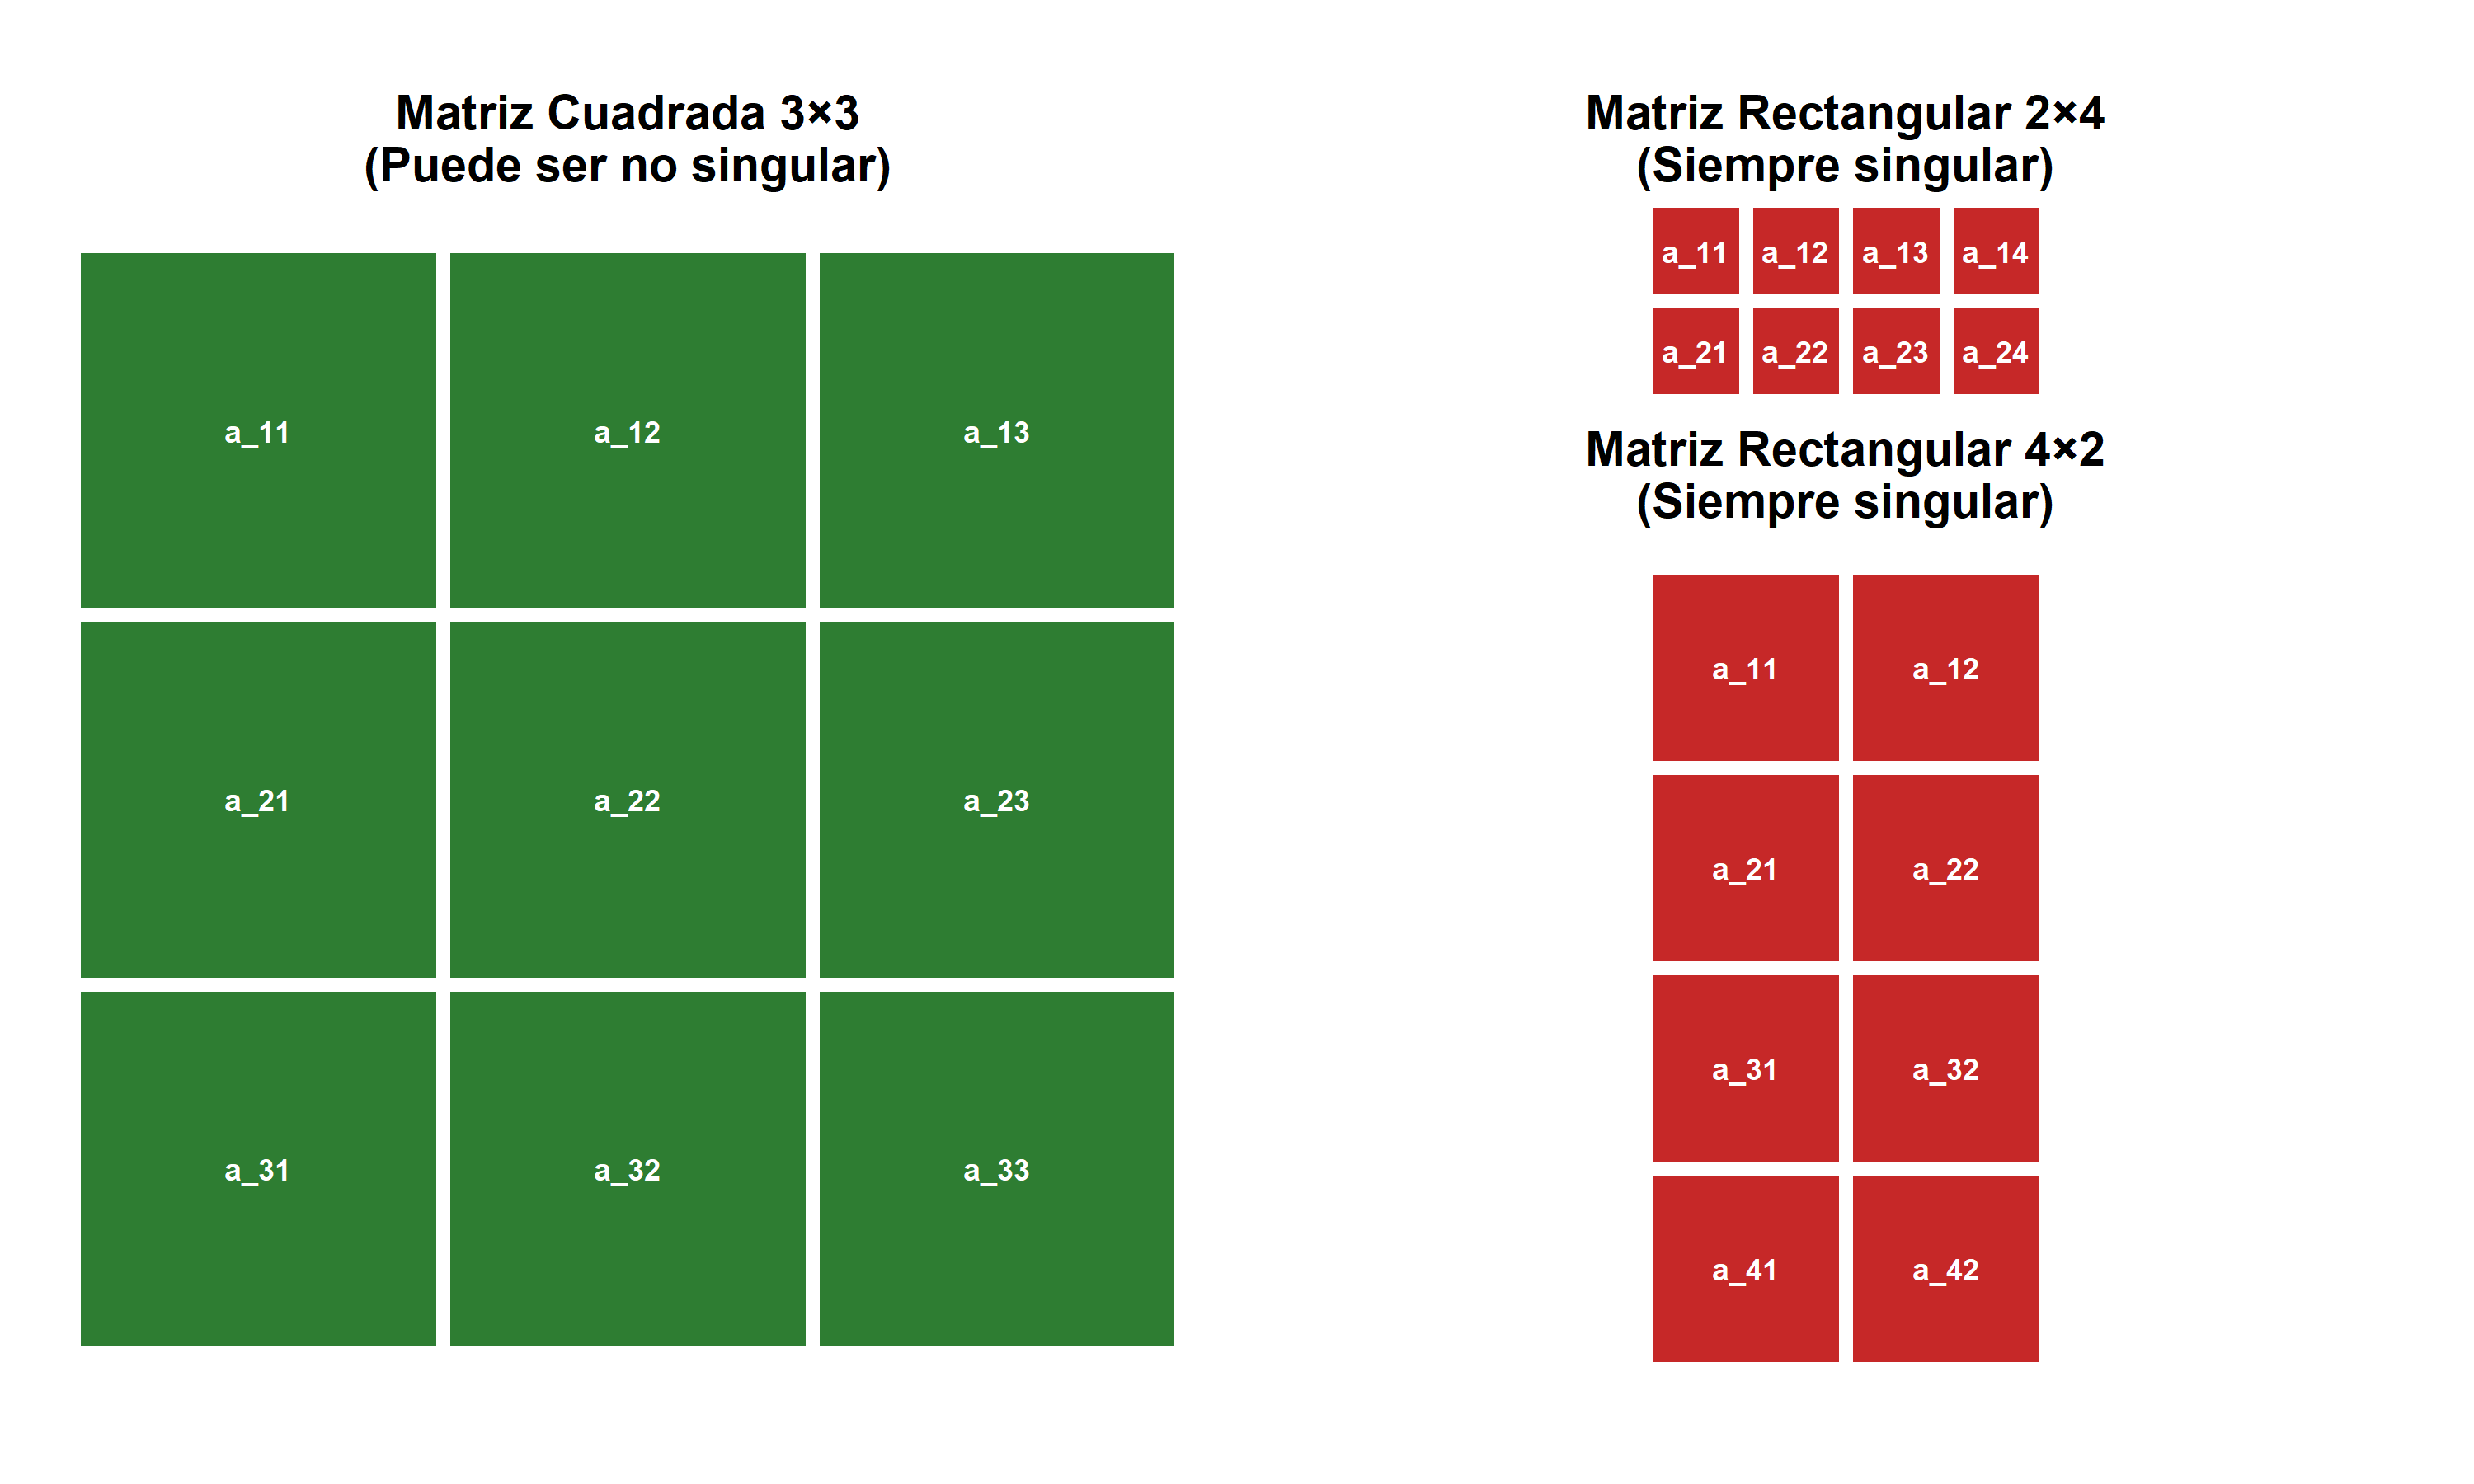

In [ ]:
# Visualización de matrices cuadradas vs rectangulares
library(ggplot2)

crear_matriz_visual <- function(filas, cols, titulo, color) {
  expand.grid(x = 1:cols, y = 1:filas) %>%
    ggplot(aes(x = x, y = -y)) +
    geom_tile(fill = color, color = "white", linewidth = 2) +
    geom_text(aes(label = sprintf("a_%d%d", y, x)), 
              size = 3, color = "white", fontface = "bold") +
    coord_equal() +
    theme_void() +
    labs(title = titulo) +
    theme(
      plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
      plot.background = element_rect(fill = "white", color = NA)
    )
}

p1 <- crear_matriz_visual(3, 3, "Matriz Cuadrada 3×3\n(Puede ser no singular)", "#2E7D32")
p2 <- crear_matriz_visual(2, 4, "Matriz Rectangular 2×4\n(Siempre singular)", "#C62828")
p3 <- crear_matriz_visual(4, 2, "Matriz Rectangular 4×2\n(Siempre singular)", "#C62828")

library(patchwork)
p1 | (p2 / p3)

**Importante**: Ser cuadrada es necesario pero **NO suficiente**. Una matriz puede ser cuadrada y aún así ser singular si sus renglones son linealmente dependientes.

In [ ]:
# Definición de la función personalizada
det_laplace <- function(M, verbose = FALSE) {
  n <- nrow(M)
  if (n == 1) return(M[1, 1])
  if (n == 2) return(M[1, 1] * M[2, 2] - M[1, 2] * M[2, 1])
  
  det_val <- 0
  for (j in 1:n) {
    menor <- M[-1, -j, drop = FALSE] # Submatriz eliminando fila 1 y columna j
    cofactor <- (-1)^(1 + j) * det_laplace(menor)
    if (verbose) {
      cat(sprintf("Elemento a[1,%d] = %d | Cofactor = %d\n", j, M[1, j], cofactor))
    }
    det_val <- det_val + M[1, j] * cofactor
  }
  return(det_val)
}

# Ahora puedes ejecutar tu código original
A <- matrix(c(2, 1, 3, 4, 0, 2, 1, 3, 1), 3, 3, byrow = TRUE)
cat("Matriz A (3x3):\n")

Matriz A (3x3):

     [,1] [,2] [,3]
[1,]    2    1    3
[2,]    4    0    2
[3,]    1    3    1


=== CÁLCULO DETALLADO ===

Elemento a[1,1] = 2 | Cofactor = -6
Elemento a[1,2] = 1 | Cofactor = -2
Elemento a[1,3] = 3 | Cofactor = 12


Verificación con R: 22.0000

Diferencia: 0.0000000000

### Estrategia Óptima: Elegir Renglón/Columna con Más Ceros

In [ ]:
# Matriz con muchos ceros estratégicos
B <- matrix(c(
  1, 2, 0, 9,
  2, 3, 4, 6,
  1, 6, 0, -1,
  0, -5, 0, 8
), 4, 4, byrow = TRUE)

cat("Matriz B (4×4):\n")

Matriz B (4×4):

     [,1] [,2] [,3] [,4]
[1,]    1    2    0    9
[2,]    2    3    4    6
[3,]    1    6    0   -1
[4,]    0   -5    0    8


Ceros por renglón: 1 0 1 2 

Ceros por columna: 1 0 3 0 


Mejor opción: Columna 3 (tiene 3 ceros)

Esto reduce el cálculo de 4 cofactores a solo 1


Expansión por columna 3:

  a_23 × C_23 = 4 × (-1 × -18) = 72


|B| = 72

Verificación: 72

### Matriz de Cofactores Completa

In [ ]:
# Función para calcular matriz de cofactores
matriz_cofactores <- function(M) {
  n <- nrow(M)
  C <- matrix(0, n, n)
  
  for (i in 1:n) {
    for (j in 1:n) {
      menor <- M[-i, -j, drop = FALSE]
      signo <- (-1)^(i + j)
      C[i, j] <- signo * det(menor)
    }
  }
  
  return(C)
}

A <- matrix(c(2, 1, 3,
              4, 0, 2,
              1, 3, 1), 3, 3, byrow = TRUE)

cat("Matriz A:\n")

Matriz A:

     [,1] [,2] [,3]
[1,]    2    1    3
[2,]    4    0    2
[3,]    1    3    1


Matriz de Cofactores C:

     [,1] [,2] [,3]
[1,]   -6   -2   12
[2,]    8   -1   -5
[3,]    2    8   -4


=== VERIFICACIÓN: Expansión por cada renglón ===

Renglón 1: Σ a_1j × C_1j = 22.0000
Renglón 2: Σ a_2j × C_2j = 22.0000
Renglón 3: Σ a_3j × C_3j = 22.0000


=== Expansión por cofactores AJENOS (debe dar 0) ===

R1 × Cofactores R2: 0.0000000000
R1 × Cofactores R3: -0.0000000000
R2 × Cofactores R3: 0.0000000000

## Inversión de Matrices

### Definición y Existencia

> **Teorema Fundamental de la Inversión**
>
> Una matriz cuadrada $A$ tiene una inversa **única** $A^{-1}$ si y solo si:
>
> \$ \|A\| \$
>
> La inversa satisface: \$ AA^{-1} = A^{-1}A = I \$
>
> Y se calcula mediante: \$ A^{-1} = (A) \$
>
> donde $\text{adj}(A)$ es la **matriz adjunta** (transpuesta de la matriz de cofactores).

### Propiedades de la Matriz Inversa

In [ ]:
prop_inv <- data.frame(
  Propiedad = c(
    "Unicidad",
    "Inversa de la inversa",
    "Inversa del producto",
    "Inversa de la transpuesta",
    "Determinante de la inversa",
    "Inversa de matriz escalar",
    "Inversa es no singular"
  ),
  Fórmula = c(
    "Si AB = BA = I entonces B = A⁻¹",
    "(A⁻¹)⁻¹ = A",
    "(AB)⁻¹ = B⁻¹A⁻¹",
    "(A')⁻¹ = (A⁻¹)'",
    "|A⁻¹| = 1/|A|",
    "(kA)⁻¹ = (1/k)A⁻¹",
    "|A⁻¹| ≠ 0"
  ),
  Interpretación = c(
    "La inversa es única si existe",
    "Invertir dos veces regresa al original",
    "Orden inverso (como calcetines y zapatos)",
    "Transponer e invertir conmutan",
    "El determinante se invierte",
    "Escalar se puede factorizar",
    "La inversa también es invertible"
  ),
  stringsAsFactors = FALSE
)

kable(prop_inv, 
      align = "llc",
      caption = "Propiedades Algebraicas de la Matriz Inversa") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"),
                full_width = TRUE) %>%
  column_spec(1, bold = TRUE, width = "15em") %>%
  column_spec(2, monospace = TRUE, background = "#E3F2FD", width = "15em") %>%
  column_spec(3, width = "25em") %>%
  row_spec(0, bold = TRUE, color = "white", background = "#0277BD")

  Propiedad                    Fórmula                                           Interpretación
  ---------------------------- ----------------------------------- -------------------------------------------
  Unicidad                     Si AB = BA = I entonces B = A⁻¹            La inversa es única si existe
  Inversa de la inversa        (A⁻¹)⁻¹ = A                           Invertir dos veces regresa al original
  Inversa del producto         (AB)⁻¹ = B⁻¹A⁻¹                      Orden inverso (como calcetines y zapatos)
  Inversa de la transpuesta    (A\')⁻¹ = (A⁻¹)\'                         Transponer e invertir conmutan
  Determinante de la inversa   &#124;A⁻¹&#124; = 1/&#124;A&#124;           El determinante se invierte
  Inversa de matriz escalar    (kA)⁻¹ = (1/k)A⁻¹                           Escalar se puede factorizar
  Inversa es no singular       &#124;A⁻¹&#124; ≠ 0                      La inversa también es invertible

  : Propiedades Algebraicas de la Matriz Inversa


### Método de la Adjunta (Cofactores)

**Pasos del algoritmo**:

1.  Calcular $|A|$ (si es 0, no hay inversa)
2.  Construir matriz de cofactores $C$
3.  Transponer para obtener adjunta: $\text{adj}(A) = C'$
4.  Dividir: $A^{-1} = \frac{1}{|A|} \text{adj}(A)$

In [ ]:
# Implementación completa del método de la adjunta
invertir_por_adjunta <- function(M, verbose = TRUE) {
  n <- nrow(M)
  
  # Paso 1: Determinante
  det_M <- det(M)
  if (verbose) {
    cat("=== INVERSIÓN POR MÉTODO DE LA ADJUNTA ===\n\n")
    cat("Matriz original A:\n")
    print(M)
    cat(sprintf("\nPaso 1: |A| = %.4f\n", det_M))
  }
  
  if (abs(det_M) < 1e-10) {
    cat("\n✗ MATRIZ SINGULAR (|A| = 0)\n")
    cat("No existe inversa.\n")
    return(NULL)
  }
  
  # Paso 2: Matriz de cofactores
  C <- matriz_cofactores(M)
  if (verbose) {
    cat("\nPaso 2: Matriz de cofactores C:\n")
    print(round(C, 4))
  }
  
  # Paso 3: Adjunta (transpuesta de cofactores)
  adj_M <- t(C)
  if (verbose) {
    cat("\nPaso 3: Matriz adjunta adj(A) = C':\n")
    print(round(adj_M, 4))
  }
  
  # Paso 4: Inversa
  inv_M <- (1/det_M) * adj_M
  if (verbose) {
    cat(sprintf("\nPaso 4: A⁻¹ = (1/|A|) × adj(A) = (1/%.4f) × adj(A)\n", det_M))
    cat("\nMatriz inversa A⁻¹:\n")
    print(round(inv_M, 6))
  }
  
  # Verificación
  if (verbose) {
    cat("\n=== VERIFICACIÓN ===\n")
    producto <- M %*% inv_M
    cat("A × A⁻¹ (debe ser I):\n")
    print(round(producto, 10))
    
    error <- max(abs(producto - diag(n)))
    cat(sprintf("\nError máximo: %.2e\n", error))
  }
  
  return(inv_M)
}

# Ejemplo 2×2
A2 <- matrix(c(4, 7, 2, 6), 2, 2, byrow = TRUE)
inv_A2 <- invertir_por_adjunta(A2)

=== INVERSIÓN POR MÉTODO DE LA ADJUNTA ===

Matriz original A:
     [,1] [,2]
[1,]    4    7
[2,]    2    6

Paso 1: |A| = 10.0000

Paso 2: Matriz de cofactores C:
     [,1] [,2]
[1,]    6   -2
[2,]   -7    4

Paso 3: Matriz adjunta adj(A) = C':
     [,1] [,2]
[1,]    6   -7
[2,]   -2    4

Paso 4: A⁻¹ = (1/|A|) × adj(A) = (1/10.0000) × adj(A)

Matriz inversa A⁻¹:
     [,1] [,2]
[1,]  0.6 -0.7
[2,] -0.2  0.4

=== VERIFICACIÓN ===
A × A⁻¹ (debe ser I):
     [,1] [,2]
[1,]    1    0
[2,]    0    1

Error máximo: 4.44e-16

=== INVERSIÓN POR MÉTODO DE LA ADJUNTA ===

Matriz original A:
     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    0    1    4
[3,]    5    6    0

Paso 1: |A| = 1.0000

Paso 2: Matriz de cofactores C:
     [,1] [,2] [,3]
[1,]  -24   20   -5
[2,]   18  -15    4
[3,]    5   -4    1

Paso 3: Matriz adjunta adj(A) = C':
     [,1] [,2] [,3]
[1,]  -24   18    5
[2,]   20  -15   -4
[3,]   -5    4    1

Paso 4: A⁻¹ = (1/|A|) × adj(A) = (1/1.0000) × adj(A)

Matriz inversa A⁻¹:
     [,1] [,2] [,3]
[1,]  -24   18    5
[2,]   20  -15   -4
[3,]   -5    4    1

=== VERIFICACIÓN ===
A × A⁻¹ (debe ser I):
     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    0    1    0
[3,]    0    0    1

Error máximo: 1.42e-14

### Regla Simplificada para Matrices 2×2

Para matrices $2 \times 2$ existe un **atajo**:

\$

^{-1} =

\$

**Pasos**: 1. Intercambiar elementos de la diagonal principal 2. Cambiar signo a elementos fuera de la diagonal 3. Dividir entre el determinante

In [ ]:
# Función optimizada para 2×2
invertir_2x2 <- function(M) {
  if (nrow(M) != 2 || ncol(M) != 2) {
    stop("Solo para matrices 2×2")
  }
  
  a <- M[1,1]; b <- M[1,2]; c <- M[2,1]; d <- M[2,2]
  det_M <- a*d - b*c
  
  cat("Matriz A:\n")
  print(M)
  cat(sprintf("\n|A| = %d×%d - %d×%d = %d\n", a, d, b, c, det_M))
  
  if (abs(det_M) < 1e-10) {
    cat("Matriz singular, no existe inversa.\n")
    return(NULL)
  }
  
  # Aplicar regla
  inv_M <- (1/det_M) * matrix(c(d, -c, -b, a), 2, 2, byrow = TRUE)
  
  cat("\nPasos:\n")
  cat(sprintf("  1. Intercambiar diagonal: [%d %d; %d %d] → [%d %d; %d %d]\n",
              a, b, c, d, d, b, c, a))
  cat(sprintf("  2. Cambiar signos fuera diagonal: [%d %d; %d %d]\n",
              d, -b, -c, a))
  cat(sprintf("  3. Dividir entre |A| = %d\n", det_M))
  
  cat("\nA⁻¹ =\n")
  print(round(inv_M, 4))
  
  return(inv_M)
}

# Ejemplos
ejemplos <- list(
  matrix(c(3, 5, 2, 4), 2, 2, byrow = TRUE),
  matrix(c(1, -2, 3, 4), 2, 2, byrow = TRUE)
)

for (i in seq_along(ejemplos)) {
  cat(sprintf("\n=== EJEMPLO %d ===\n", i))
  invertir_2x2(ejemplos[[i]])
  cat("\n")
}


=== EJEMPLO 1 ===
Matriz A:
     [,1] [,2]
[1,]    3    5
[2,]    2    4

|A| = 3×4 - 5×2 = 2

Pasos:
  1. Intercambiar diagonal: [3 5; 2 4] → [4 5; 2 3]
  2. Cambiar signos fuera diagonal: [4 -5; -2 3]
  3. Dividir entre |A| = 2

A⁻¹ =
     [,1] [,2]
[1,]  2.0 -1.0
[2,] -2.5  1.5


=== EJEMPLO 2 ===
Matriz A:
     [,1] [,2]
[1,]    1   -2
[2,]    3    4

|A| = 1×4 - -2×3 = 10

Pasos:
  1. Intercambiar diagonal: [1 -2; 3 4] → [4 -2; 3 1]
  2. Cambiar signos fuera diagonal: [4 2; -3 1]
  3. Dividir entre |A| = 10

A⁻¹ =
     [,1] [,2]
[1,]  0.4 -0.3
[2,]  0.2  0.1

### Método de Gauss-Jordan

Una alternativa computacionalmente más eficiente es el **método de eliminación de Gauss-Jordan**:

**Procedimiento**: 1. Formar matriz aumentada $[A | I]$ 2. Mediante operaciones elementales de renglón, transformar $A$ en $I$ 3. El resultado es $[I | A^{-1}]$

In [ ]:
# Implementación del método de Gauss-Jordan
gauss_jordan_inversa <- function(M, verbose = TRUE) {
  n <- nrow(M)
  
  # Crear matriz aumentada [A | I]
  aug <- cbind(M, diag(n))
  
  if (verbose) {
    cat("=== MÉTODO DE GAUSS-JORDAN ===\n\n")
    cat("Matriz aumentada inicial [A | I]:\n")
    print(aug)
    cat("\n")
  }
  
  # Eliminación hacia adelante y hacia atrás
  for (i in 1:n) {
    # Buscar pivote
    if (abs(aug[i, i]) < 1e-10) {
      # Buscar renglón con elemento no cero
      for (k in (i+1):n) {
        if (k <= n && abs(aug[k, i]) > 1e-10) {
          # Intercambiar renglones
          temp <- aug[i, ]
          aug[i, ] <- aug[k, ]
          aug[k, ] <- temp
          if (verbose) cat(sprintf("Intercambiar R%d ↔ R%d\n", i, k))
          break
        }
      }
    }
    
    # Normalizar renglón pivote
    pivote <- aug[i, i]
    if (abs(pivote) < 1e-10) {
      cat("\n✗ MATRIZ SINGULAR\n")
      return(NULL)
    }
    
    aug[i, ] <- aug[i, ] / pivote
    if (verbose && abs(pivote - 1) > 1e-10) {
      cat(sprintf("R%d ← R%d / %.4f\n", i, i, pivote))
    }
    
    # Eliminar columna en otros renglones
    for (j in 1:n) {
      if (j != i && abs(aug[j, i]) > 1e-10) {
        factor <- aug[j, i]
        aug[j, ] <- aug[j, ] - factor * aug[i, ]
        if (verbose) {
          cat(sprintf("R%d ← R%d - %.4f×R%d\n", j, j, factor, i))
        }
      }
    }
    
    if (verbose) {
      cat("\nMatriz después del paso", i, ":\n")
      print(round(aug, 4))
      cat("\n")
    }
  }
  
  # Extraer inversa (lado derecho)
  inv_M <- aug[, (n+1):(2*n)]
  
  if (verbose) {
    cat("=== RESULTADO ===\n")
    cat("Matriz inversa A⁻¹:\n")
    print(round(inv_M, 6))
    
    # Verificación
    cat("\nVerificación A × A⁻¹:\n")
    print(round(M %*% inv_M, 10))
  }
  
  return(inv_M)
}

# Ejemplo
A <- matrix(c(2, 1, 1,
              1, 3, 2,
              1, 0, 0), 3, 3, byrow = TRUE)

inv_gj <- gauss_jordan_inversa(A, verbose = TRUE)

=== MÉTODO DE GAUSS-JORDAN ===

Matriz aumentada inicial [A | I]:
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    2    1    1    1    0    0
[2,]    1    3    2    0    1    0
[3,]    1    0    0    0    0    1

R1 ← R1 / 2.0000
R2 ← R2 - 1.0000×R1
R3 ← R3 - 1.0000×R1

Matriz después del paso 1 :
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    1  0.5  0.5  0.5    0    0
[2,]    0  2.5  1.5 -0.5    1    0
[3,]    0 -0.5 -0.5 -0.5    0    1

R2 ← R2 / 2.5000
R1 ← R1 - 0.5000×R2
R3 ← R3 - -0.5000×R2

Matriz después del paso 2 :
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    1    0  0.2  0.6 -0.2    0
[2,]    0    1  0.6 -0.2  0.4    0
[3,]    0    0 -0.2 -0.6  0.2    1

R3 ← R3 / -0.2000
R1 ← R1 - 0.2000×R3
R2 ← R2 - 0.6000×R3

Matriz después del paso 3 :
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    1    0    0    0    0    1
[2,]    0    1    0   -2    1    3
[3,]    0    0    1    3   -1   -5

=== RESULTADO ===
Matriz inversa A⁻¹:
     [,1] [,2] [,3]
[1,]    0    0    1
[2,]   -2    1    3
[3,]    3   

### Comparación de Métodos

  Tamaño   Método          Tiempo_Medio_ms
  -------- ------------- -----------------
  3×3      R_solve                   0.046
  3×3      Adjunta                   0.263
  3×3      GaussJordan               0.058
  5×5      R_solve                   0.047
  5×5      Adjunta                   0.540
  5×5      GaussJordan               0.082
  10×10    R_solve                   0.075
  10×10    Adjunta                   2.107
  10×10    GaussJordan               0.295
  20×20    R_solve                   0.103
  20×20    Adjunta                  11.238
  20×20    GaussJordan               1.479

  : Comparación de Tiempos de Ejecución (milisegundos)


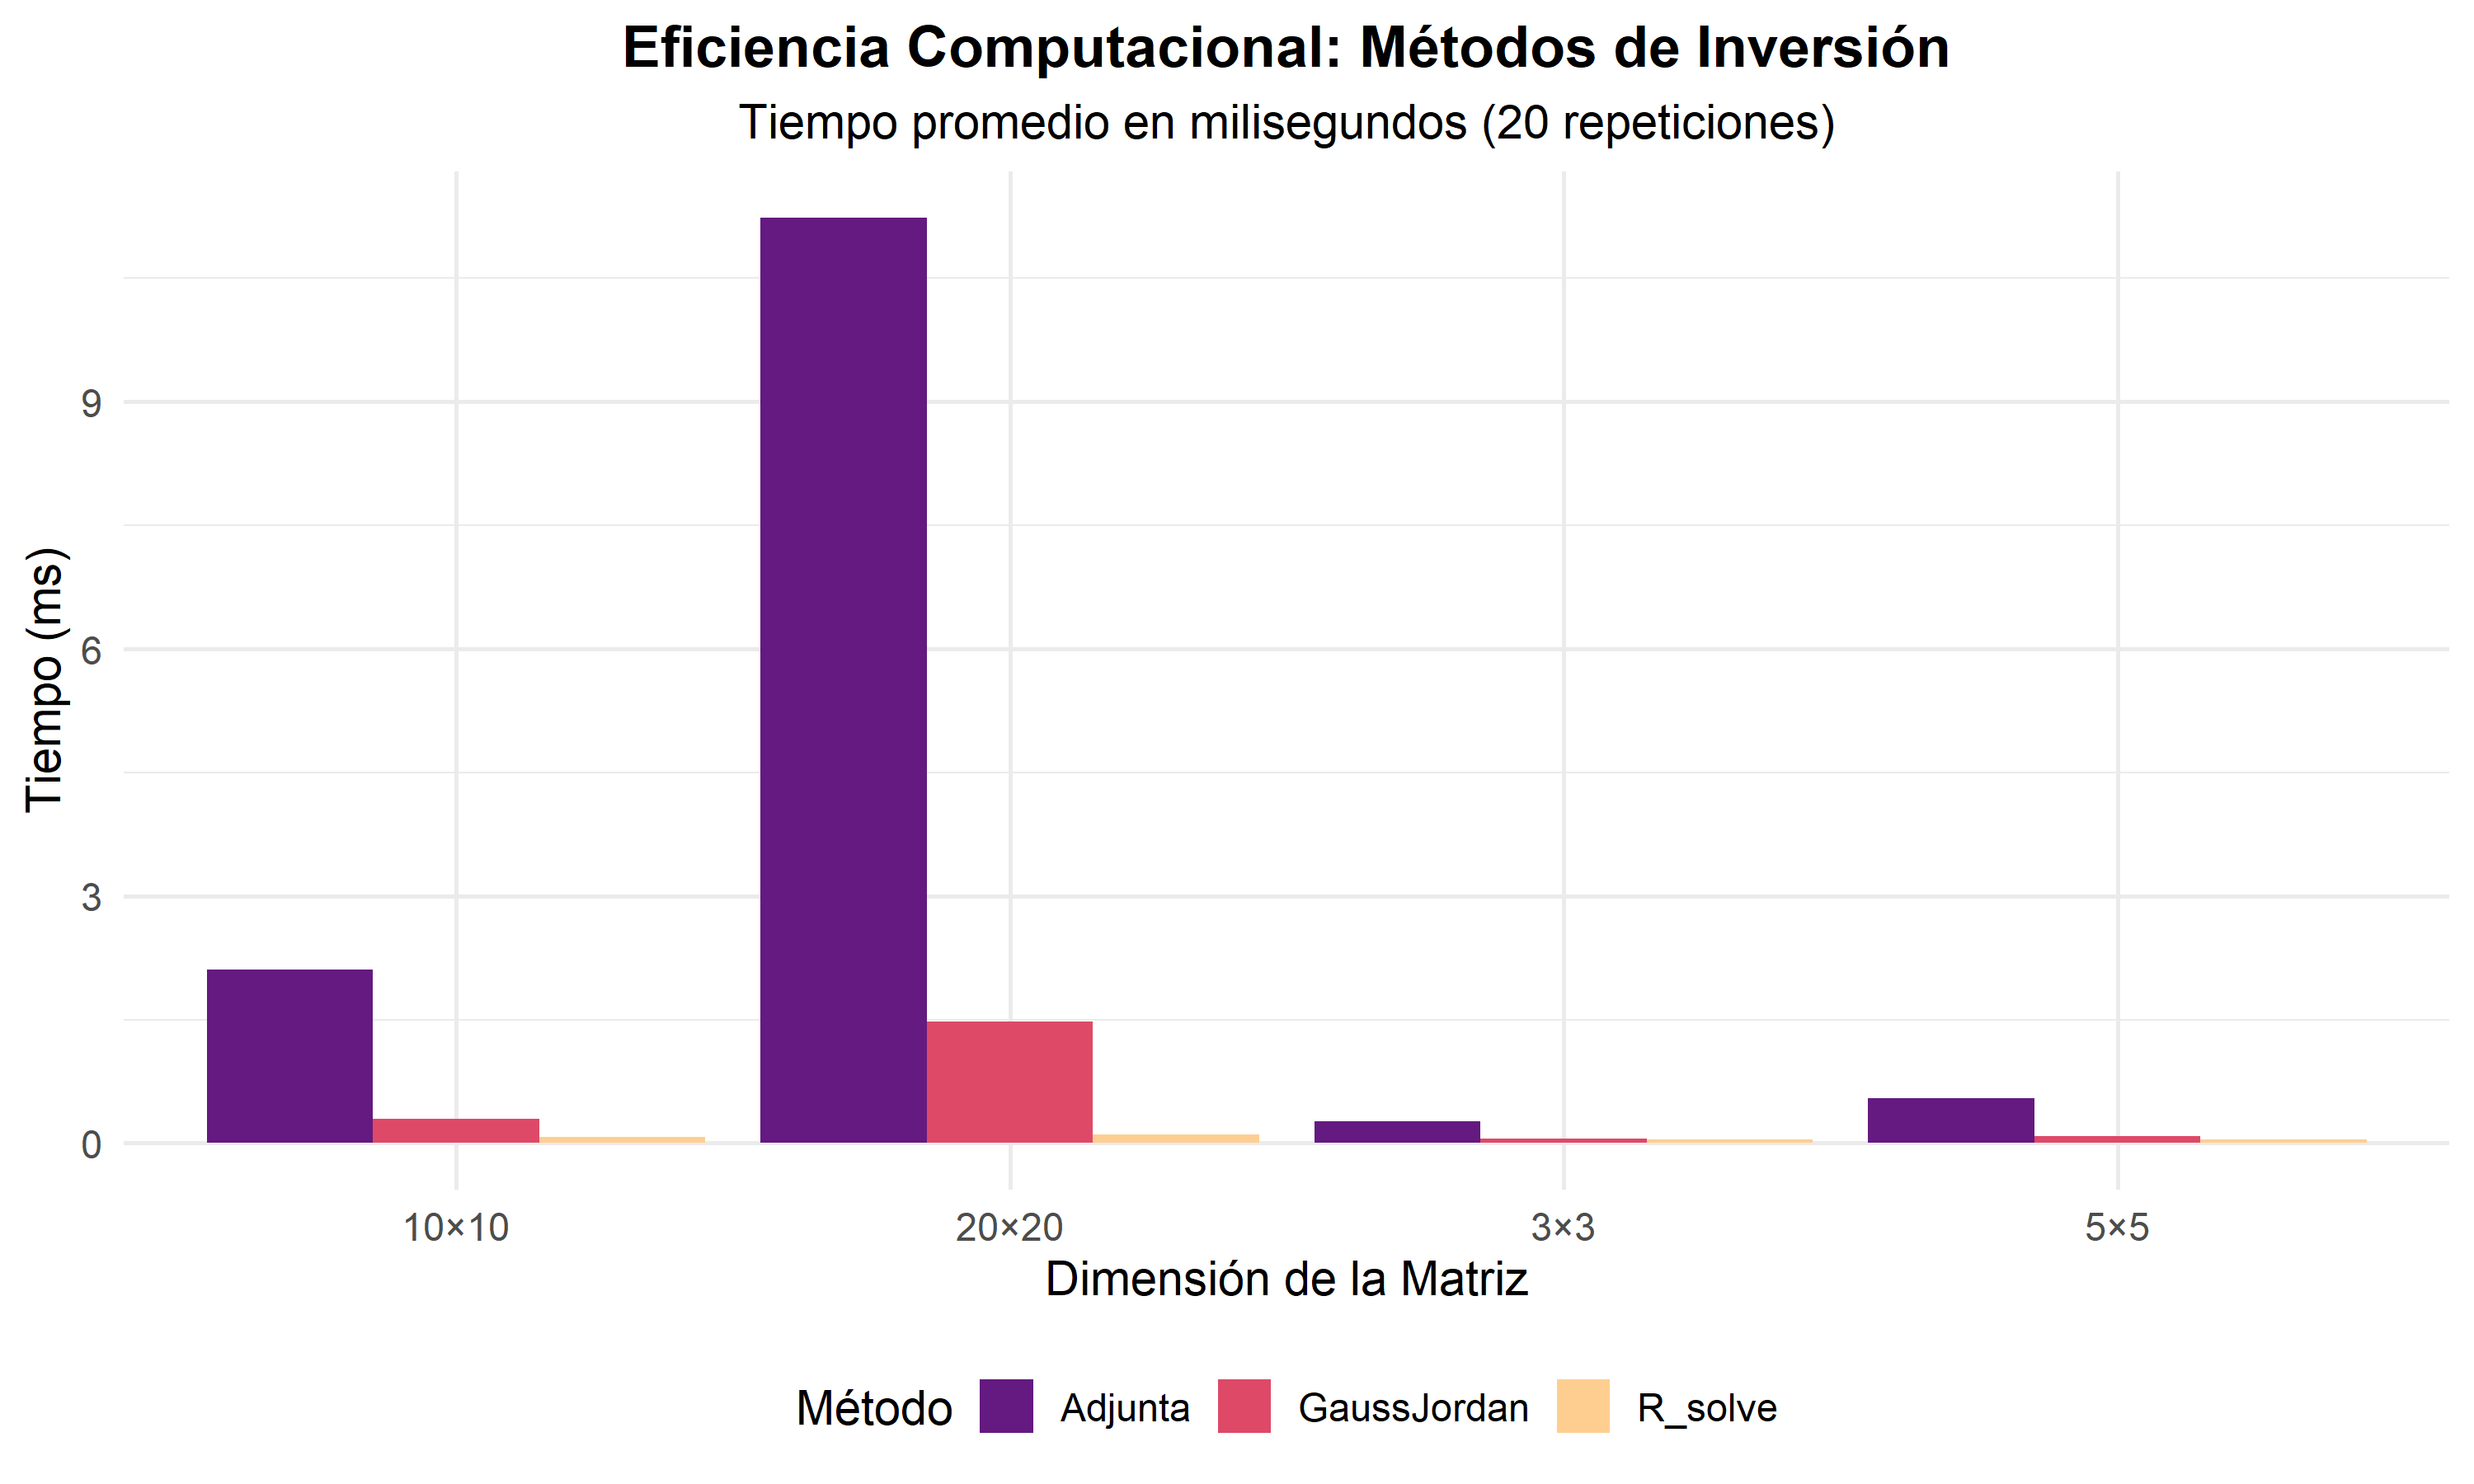

In [ ]:
library(microbenchmark)

> **Recomendaciones Prácticas**
>
> -   **Matrices pequeñas (≤3×3)**: Método de la adjunta (didáctico)
> -   **Matrices medianas (4×10)**: Gauss-Jordan (balance eficiencia/claridad)
> -   **Matrices grandes (\>10)**: `solve()` en R (optimizado, usa LAPACK)
> -   **Matrices especiales** (diagonales, triangulares): Métodos especializados

# Regla de Cramer

## Fundamento Teórico

> **Teorema: Regla de Cramer**
>
> Para un sistema de ecuaciones lineales $Ax = d$ con $|A| \neq 0$, la solución para cada variable $x_j$ es:
>
> \$ x_j = \$
>
> donde $A_j$ es la matriz obtenida al **reemplazar la $j$-ésima columna de $A$ por el vector $d$**.

### Derivación desde la Matriz Inversa

La regla de Cramer se deriva de la solución general $x = A^{-1}d$:

\$ x = A^{-1}d = ( A) d \$

El elemento $j$ del vector solución es:

\$ x_j = *{i=1}^{n} d_i \|C*{ij}\| = \$

Sistema Ax = d:

           d_ejemplo
[1,] 2 1 3        10
[2,] 1 4 2        12
[3,] 3 2 1         8


=== CONSTRUCCIÓN DE MATRICES A_j ===

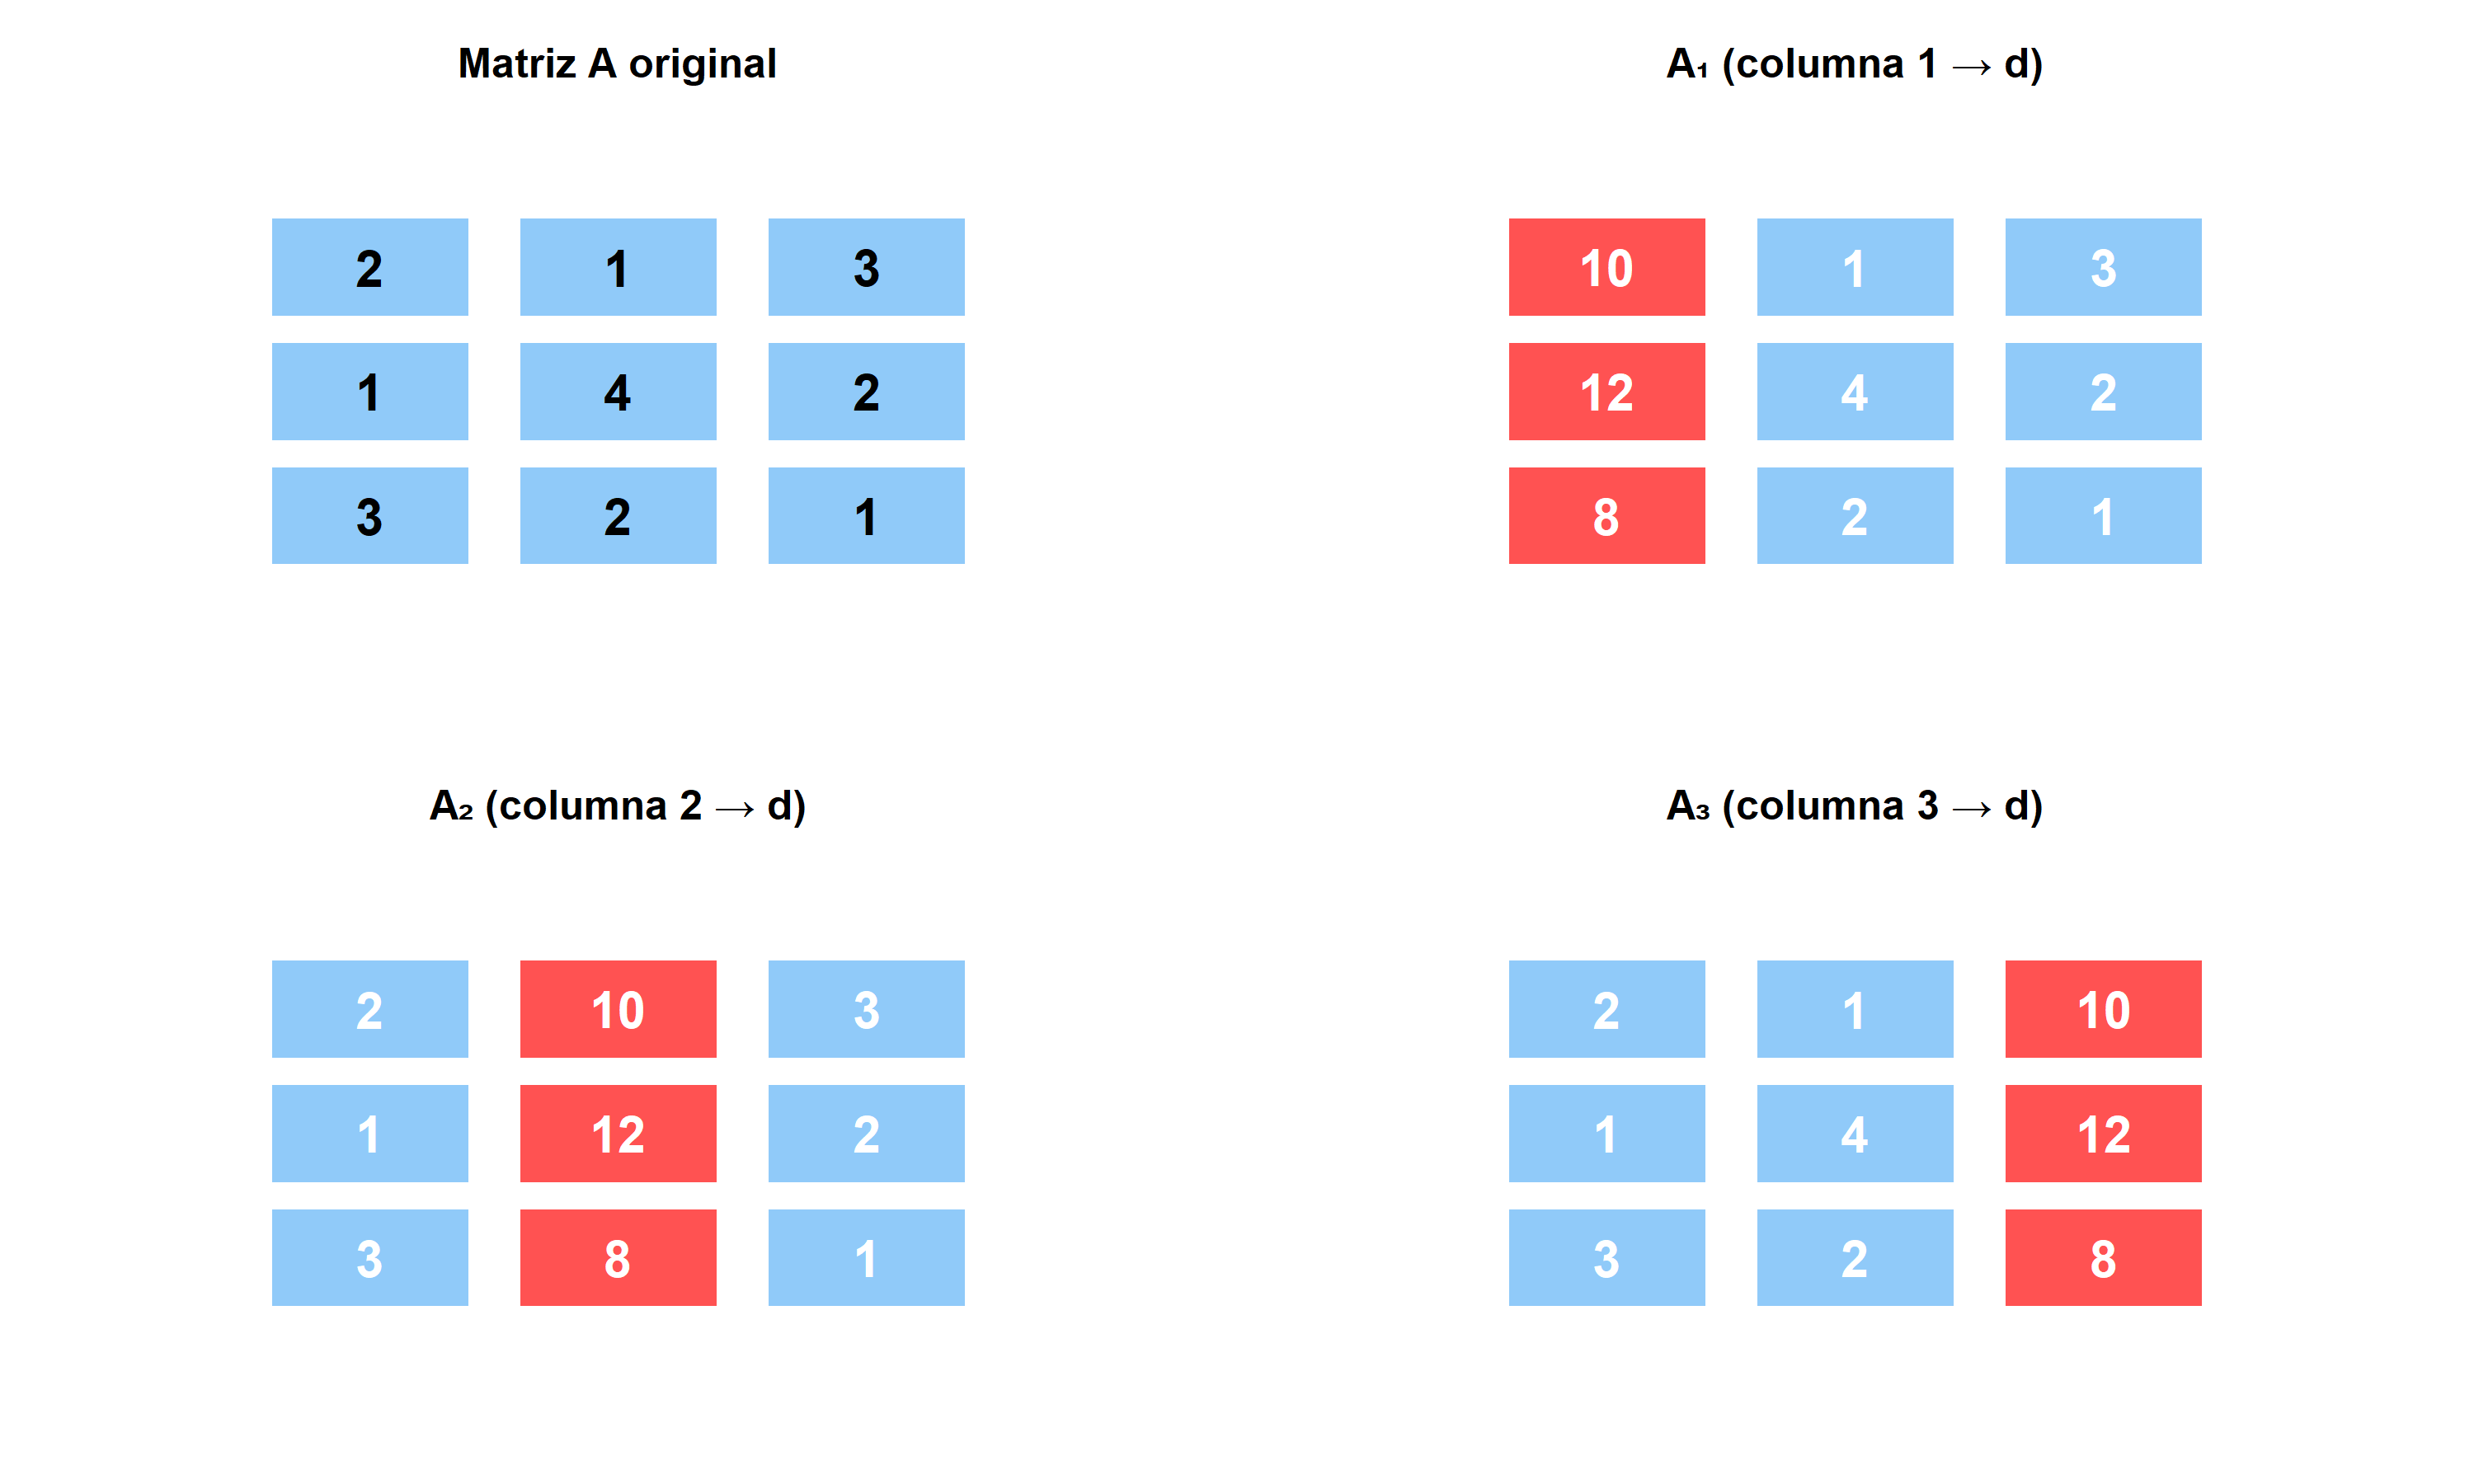

In [ ]:
# Visualización de la sustitución de columnas
A_ejemplo <- matrix(c(2, 1, 3,
                      1, 4, 2,
                      3, 2, 1), 3, 3, byrow = TRUE)
d_ejemplo <- c(10, 12, 8)

cat("Sistema Ax = d:\n")

## Implementación y Ejemplos

In [ ]:
# Función para resolver por Regla de Cramer
resolver_cramer <- function(A, d, verbose = TRUE) {
  n <- nrow(A)
  
  # Verificar no singularidad
  det_A <- det(A)
  
  if (verbose) {
    cat("=== REGLA DE CRAMER ===\n\n")
    cat("Sistema Ax = d:\n")
    print(cbind(A, d))
    cat(sprintf("\n|A| = %.4f\n", det_A))
  }
  
  if (abs(det_A) < 1e-10) {
    cat("\n✗ MATRIZ SINGULAR (|A| = 0)\n")
    cat("La Regla de Cramer no es aplicable.\n")
    return(NULL)
  }
  
  # Calcular cada x_j
  x <- numeric(n)
  
  if (verbose) cat("\n=== CÁLCULO DE VARIABLES ===\n")
  
  for (j in 1:n) {
    # Crear A_j reemplazando columna j por d
    A_j <- A
    A_j[, j] <- d
    det_A_j <- det(A_j)
    
    x[j] <- det_A_j / det_A
    
    if (verbose) {
      cat(sprintf("\nx_%d:\n", j))
      cat("Matriz A_", j, ":\n", sep = "")
      print(A_j)
      cat(sprintf("|A_%d| = %.4f\n", j, det_A_j))
      cat(sprintf("x_%d = |A_%d|/|A| = %.4f / %.4f = %.4f\n", 
                  j, j, det_A_j, det_A, x[j]))
    }
  }
  
  if (verbose) {
    cat("\n=== SOLUCIÓN ===\n")
    cat("Vector x* =", sprintf("(%.4f, %.4f, %.4f)\n", x[1], x[2], x[3]))
    
    # Verificación
    cat("\nVerificación Ax* = d:\n")
    residuo <- A %*% x
    print(data.frame(
      "d_calculado" = round(residuo, 6),
      "d_original" = d,
      "diferencia" = round(residuo - d, 10)
    ))
  }
  
  return(x)
}

# Ejemplo 1: Sistema 3×3
A1 <- matrix(c(2, 1, 3,
               1, 4, 2,
               3, 2, 1), 3, 3, byrow = TRUE)
d1 <- c(10, 12, 8)

sol1 <- resolver_cramer(A1, d1)

=== REGLA DE CRAMER ===

Sistema Ax = d:
            d
[1,] 2 1 3 10
[2,] 1 4 2 12
[3,] 3 2 1  8

|A| = -25.0000

=== CÁLCULO DE VARIABLES ===

x_1:
Matriz A_1:
     [,1] [,2] [,3]
[1,]   10    1    3
[2,]   12    4    2
[3,]    8    2    1
|A_1| = -20.0000
x_1 = |A_1|/|A| = -20.0000 / -25.0000 = 0.8000

x_2:
Matriz A_2:
     [,1] [,2] [,3]
[1,]    2   10    3
[2,]    1   12    2
[3,]    3    8    1
|A_2| = -42.0000
x_2 = |A_2|/|A| = -42.0000 / -25.0000 = 1.6800

x_3:
Matriz A_3:
     [,1] [,2] [,3]
[1,]    2    1   10
[2,]    1    4   12
[3,]    3    2    8
|A_3| = -56.0000
x_3 = |A_3|/|A| = -56.0000 / -25.0000 = 2.2400

=== SOLUCIÓN ===
Vector x* = (0.8000, 1.6800, 2.2400)

Verificación Ax* = d:
  d_calculado d_original diferencia
1          10         10          0
2          12         12          0
3           8          8          0

=== EJEMPLO 2: MODELO DE MERCADO ===

Demanda: qd1 = 53 - 2p1 - 3p2

Oferta:  qs1 = -4 + 3p1

Demanda: qd2 = 64 - 3p1 - 4p2

Oferta:  qs2 = -8 + 2p2

En equilibrio: qd1 = qs1 y qd2 = qs2

Sistema resultante:

  5p1 + 3p2 = 57

  3p1 + 6p2 = 72

Solución:

  p1* = 6.00

  p2* = 9.00


Cantidades de equilibrio:

  q1* = 14.00

  q2* = 10.00

## Sistemas Homogéneos

Para sistemas homogéneos $Ax = 0$:

> **Soluciones de Sistemas Homogéneos**
>
> -   Si $|A| \neq 0$: **Solución trivial única** $x = 0$
> -   Si $|A| = 0$: **Infinitas soluciones** (espacio nulo no trivial)

In [ ]:
# 1. Definición de Matriz No Singular
# Se corrigió 'byrow:' por 'byrow = TRUE' y se eliminó el texto dentro de la función
A_ns <- matrix(c(2, 1, 1, 3), 2, 2, byrow = TRUE)

# 2. Definición de Matriz Cuadrada Singular
M_cuad_sing <- matrix(c(
  2, 4, 6,
  1, 2, 3,
  3, 6, 9
), nrow = 3, byrow = TRUE)

# Mostrar resultados
cat("Matriz cuadrada 3x3:\n")

Matriz cuadrada 3x3:

     [,1] [,2] [,3]
[1,]    2    4    6
[2,]    1    2    3
[3,]    3    6    9


Determinante: 0 

Rango: 1 


Observación: R2 = 0.5*R1 y R3 = 1.5*R1 (dependencia lineal)

## Condición Suficiente: Independencia Lineal

> **Teorema: Condición Suficiente**
>
> Una vez cumplida la condición de cuadratura, la matriz $A$ es **no singular** si y solo si sus renglones (o equivalentemente, sus columnas) son **linealmente independientes**.

### Definición de Independencia Lineal

Un conjunto de vectores $\{v_1, v_2, \ldots, v_n\}$ es **linealmente independiente** si la única solución a:

$$
c_1 v_1 + c_2 v_2 + \cdots + c_n v_n = 0
$$

es $c_1 = c_2 = \cdots = c_n = 0$.

**Interpretación**: Ningún vector puede expresarse como combinación lineal de los demás.

In [ ]:
# Función para verificar independencia lineal
verificar_independencia <- function(vectores_matriz, nombre = "A") {
  det_val <- det(vectores_matriz)
  rango <- Matrix::rankMatrix(vectores_matriz)[1]
  n <- nrow(vectores_matriz)
  
  cat(sprintf("\n=== Análisis de Independencia: Matriz %s ===\n", nombre))
  print(vectores_matriz)
  cat(sprintf("\nDeterminante: %.6f\n", det_val))
  cat(sprintf("Rango: %d (dimensión: %d)\n", rango, n))
  
  if (abs(det_val) > 1e-10 && rango == n) {
    cat("✓ VECTORES LINEALMENTE INDEPENDIENTES\n")
    cat("✓ Matriz NO SINGULAR\n")
    return(TRUE)
  } else {
    cat("✗ VECTORES LINEALMENTE DEPENDIENTES\n")
    cat("✗ Matriz SINGULAR\n")
    
    # Intentar encontrar relación de dependencia
    if (n == 2) {
      ratio <- vectores_matriz[2,] / vectores_matriz[1,]
      if (length(unique(round(ratio, 6))) == 1) {
        cat(sprintf("  Relación: v2 = %.3f * v1\n", ratio[1]))
      }
    }
    return(FALSE)
  }
}

# Ejemplo 1: Vectores independientes
M1 <- matrix(c(1, 2, 3, 5), nrow = 2, byrow = TRUE)
verificar_independencia(M1, "M1")


=== Análisis de Independencia: Matriz M1 ===
     [,1] [,2]
[1,]    1    2
[2,]    3    5

Determinante: -1.000000
Rango: 2 (dimensión: 2)
✓ VECTORES LINEALMENTE INDEPENDIENTES
✓ Matriz NO SINGULAR

[1] TRUE


=== Análisis de Independencia: Matriz M2 ===
     [,1] [,2]
[1,]    2    4
[2,]    3    6

Determinante: 0.000000
Rango: 1 (dimensión: 2)
✗ VECTORES LINEALMENTE DEPENDIENTES
✗ Matriz SINGULAR
  Relación: v2 = 1.500 * v1

[1] FALSE


=== Análisis de Independencia: Matriz M3 ===
     [,1] [,2] [,3]
[1,]    1    0    2
[2,]    0    1    3
[3,]    2    1    0

Determinante: -7.000000
Rango: 3 (dimensión: 3)
✓ VECTORES LINEALMENTE INDEPENDIENTES
✓ Matriz NO SINGULAR

[1] TRUE


=== Análisis de Independencia: Matriz M4 ===
     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    2    4    6
[3,]    3    6    9

Determinante: 0.000000
Rango: 1 (dimensión: 3)
✗ VECTORES LINEALMENTE DEPENDIENTES
✗ Matriz SINGULAR

[1] FALSE

### Visualización Geométrica de Independencia

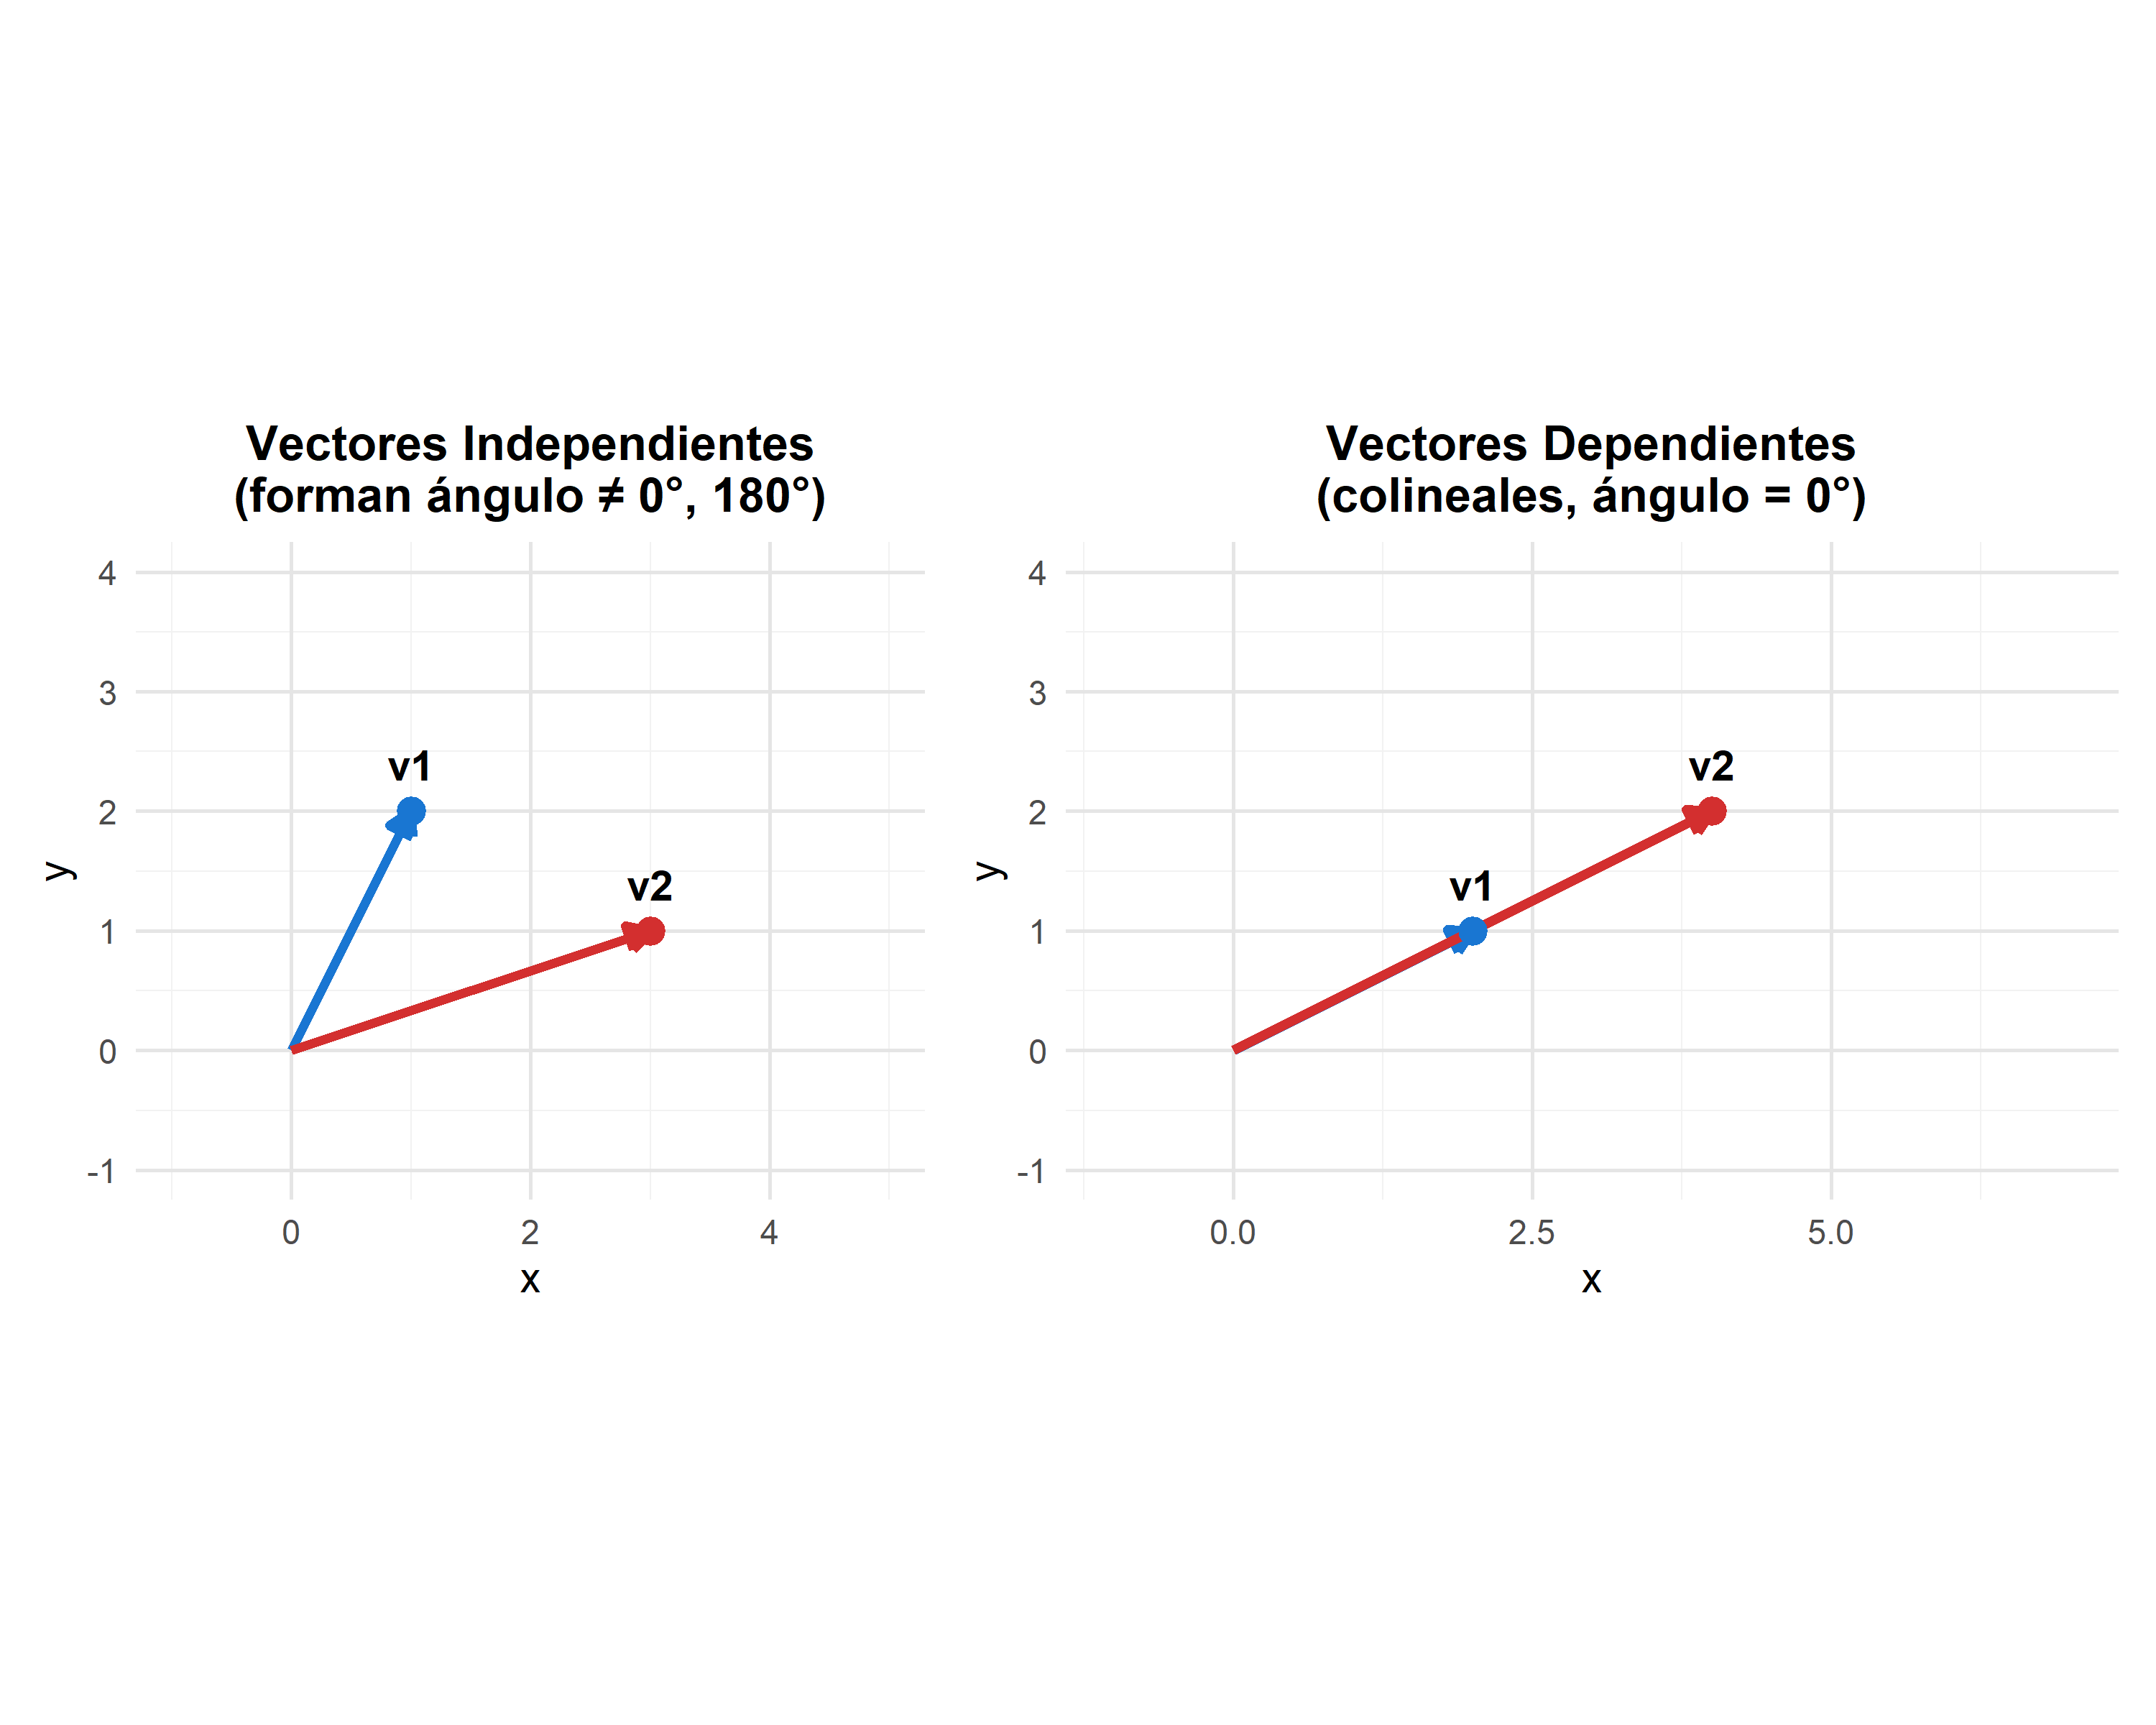

In [ ]:
library(plotly)

# Caso 2D: Vectores independientes vs dependientes
v1_ind <- c(1, 2)
v2_ind <- c(3, 1)

v1_dep <- c(2, 1)
v2_dep <- c(4, 2)  # v2 = 2*v1

# Función para crear plot 2D
plot_vectores_2d <- function(v1, v2, titulo) {
  df <- data.frame(
    x = c(0, 0, v1[1], v2[1]),
    y = c(0, 0, v1[2], v2[2]),
    xend = c(v1[1], v2[1], v1[1] + v2[1], v1[1] + v2[1]),
    yend = c(v1[2], v2[2], v1[2] + v2[2], v1[2] + v2[2]),
    tipo = c("v1", "v2", "v1", "v2")
  )
  
  ggplot(df[1:2,]) +
    geom_segment(aes(x = x, y = y, xend = xend, yend = yend, color = tipo),
                 arrow = arrow(length = unit(0.3, "cm"), type = "closed"),
                 linewidth = 1.5) +
    geom_point(aes(x = xend, y = yend, color = tipo), size = 4) +
    geom_text(aes(x = xend, y = yend, label = tipo), 
              vjust = -1, size = 5, fontface = "bold") +
    scale_color_manual(values = c("v1" = "#1976D2", "v2" = "#D32F2F")) +
    coord_equal() +
    xlim(-1, max(df$xend) + 1) +
    ylim(-1, max(df$yend) + 1) +
    labs(title = titulo, x = "x", y = "y") +
    theme_minimal(base_size = 14) +
    theme(
      legend.position = "none",
      plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
      panel.grid.major = element_line(color = "gray90"),
      panel.grid.minor = element_line(color = "gray95")
    )
}

p_ind <- plot_vectores_2d(v1_ind, v2_ind, 
                          "Vectores Independientes\n(forman ángulo ≠ 0°, 180°)")
p_dep <- plot_vectores_2d(v1_dep, v2_dep, 
                          "Vectores Dependientes\n(colineales, ángulo = 0°)")

p_ind | p_dep

## El Rango de una Matriz

> **Definición: Rango**
>
> El **rango** de una matriz $A$, denotado $r(A)$ o $\text{rank}(A)$, es el número máximo de renglones (o columnas) linealmente independientes que contiene.
>
> **Propiedades fundamentales**:
>
> 1.  $r(A) = r(A')$ (rango por renglones = rango por columnas)
> 2.  $r(A) \leq \min(m, n)$ para una matriz $m \times n$
> 3.  $r(AB) \leq \min(r(A), r(B))$
> 4.  $r(A) = r(A'A) = r(AA')$

### Determinación del Rango

Existen dos métodos principales:

### Método Escalonado

Transformar la matriz a **forma escalonada** mediante operaciones elementales de renglón. El rango es el número de renglones no nulos.

``` r
# Función para forma escalonada (simplificada)
forma_escalonada <- function(A) {
  M <- A
  m <- nrow(M)
  n <- ncol(M)
  
  lead <- 1
  for (r in 1:m) {
    if (lead > n) break
    
    # Buscar pivote
    i <- r
    while (abs(M[i, lead]) < 1e-10) {
      i <- i + 1
      if (i > m) {
        i <- r
        lead <- lead + 1
        if (lead > n) return(M)
      }
    }
    
    # Intercambiar renglones
    if (i != r) {
      temp <- M[r, ]
      M[r, ] <- M[i, ]
      M[i, ] <- temp
    }
    
    # Normalizar pivote
    M[r, ] <- M[r, ] / M[r, lead]
    
    # Eliminar hacia abajo
    for (i in (r+1):m) {
      if (i <= m) {
        M[i, ] <- M[i, ] - M[i, lead] * M[r, ]
      }
    }
    
    lead <- lead + 1
  }
  
  return(M)
}

# Ejemplo
A <- matrix(c(
  1, 2, 3,
  2, 4, 6,
  1, 1, 2
), nrow = 3, byrow = TRUE)

cat("Matriz original A:\n")
```

    Matriz original A:

``` r
print(A)
```

         [,1] [,2] [,3]
    [1,]    1    2    3
    [2,]    2    4    6
    [3,]    1    1    2

``` r
A_esc <- forma_escalonada(A)
cat("\nForma escalonada:\n")
```


    Forma escalonada:

``` r
print(round(A_esc, 6))
```

         [,1] [,2] [,3]
    [1,]    1    2    3
    [2,]    0    1    1
    [3,]    0    0    0

``` r
renglones_no_nulos <- sum(apply(A_esc, 1, function(x) sum(abs(x)) > 1e-10))
cat(sprintf("\nRango (renglones no nulos): %d\n", renglones_no_nulos))
```


    Rango (renglones no nulos): 2

``` r
cat(sprintf("Rango (función R): %d\n", Matrix::rankMatrix(A)[1]))
```

    Rango (función R): 2

### Criterio del Determinante

El rango es el **orden máximo de un menor no nulo** que puede extraerse de la matriz.

``` r
# Función para encontrar rango por determinantes
rango_por_determinantes <- function(A) {
  m <- nrow(A)
  n <- ncol(A)
  max_orden <- min(m, n)
  
  for (k in max_orden:1) {
    # Generar todas las combinaciones de k renglones y k columnas
    if (k == 1) {
      if (any(abs(A) > 1e-10)) return(1)
    } else {
      filas_comb <- combn(1:m, k, simplify = FALSE)
      cols_comb <- combn(1:n, k, simplify = FALSE)
      
      for (filas in filas_comb) {
        for (cols in cols_comb) {
          submatriz <- A[filas, cols, drop = FALSE]
          if (abs(det(submatriz)) > 1e-10) {
            return(k)
          }
        }
      }
    }
  }
  
  return(0)
}

# Ejemplo comparativo
matrices_ejemplo <- list(
  "A (3×3, rango 2)" = matrix(c(1,2,3, 2,4,6, 1,1,2), 3, 3, byrow = TRUE),
  "B (3×3, rango 3)" = matrix(c(1,0,2, 0,1,3, 2,1,0), 3, 3, byrow = TRUE),
  "C (4×3, rango 2)" = matrix(c(1,2,3, 2,4,6, 0,1,1, 0,2,2), 4, 3, byrow = TRUE)
)

resultados <- data.frame(
  Matriz = character(),
  Dimensión = character(),
  Rango_Escalonado = integer(),
  Rango_R = integer(),
  Singular = character(),
  stringsAsFactors = FALSE
)

for (nombre in names(matrices_ejemplo)) {
  M <- matrices_ejemplo[[nombre]]
  dim_str <- sprintf("%d×%d", nrow(M), ncol(M))
  rango_r <- Matrix::rankMatrix(M)[1]
  es_cuadrada <- nrow(M) == ncol(M)
  es_singular <- if (es_cuadrada) abs(det(M)) < 1e-10 else "N/A"
  
  resultados <- rbind(resultados, data.frame(
    Matriz = nombre,
    Dimensión = dim_str,
    Rango = rango_r,
    Determinante = if (es_cuadrada) sprintf("%.2e", det(M)) else "N/A",
    Singular = if (es_cuadrada) ifelse(es_singular, "Sí", "No") else "N/A",
    stringsAsFactors = FALSE
  ))
}

kable(resultados, align = "lcccc", 
      caption = "Análisis de Rango para Diferentes Matrices") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"), 
                full_width = FALSE) %>%
  column_spec(1, bold = TRUE) %>%
  column_spec(5, color = "white", 
              background = spec_color(c(1, 0, 1), 
                                      begin = 0.4, end = 0.8, 
                                      option = "D", direction = -1))
```

  Matriz              Dimensión   Rango   Determinante   Singular
  ------------------ ----------- ------- -------------- ----------
  A (3×3, rango 2)       3×3        2       0.00e+00        Sí
  B (3×3, rango 3)       3×3        3      -7.00e+00        No
  C (4×3, rango 2)       4×3        2         N/A          N/A

  : Análisis de Rango para Diferentes Matrices

### Relación Rango-No Singularidad

> **Teorema Fundamental**
>
> Para una matriz cuadrada $A$ de orden $n \times n$:
>
> $$
> A \text{ es no singular} \iff r(A) = n \iff |A| \neq 0
> $$
>
> **Condición Necesaria y Suficiente**: Una matriz cuadrada tiene inversa si y solo si tiene rango completo (máximo).

In [ ]:
# Tabla comparativa completa
comparacion <- data.frame(
  Propiedad = c(
    "Rango", 
    "Determinante", 
    "Independencia Lineal",
    "Inversa",
    "Solución Sistema",
    "Espacio Columna"
  ),
  No_Singular = c(
    "r(A) = n",
    "|A| ≠ 0",
    "Renglones/columnas independientes",
    "Existe A⁻¹ única",
    "Solución única x* = A⁻¹d",
    "dim = n (espacio completo)"
  ),
  Singular = c(
    "r(A) < n",
    "|A| = 0",
    "Existe dependencia lineal",
    "No existe A⁻¹",
    "Infinitas soluciones o ninguna",
    "dim < n (subespacio propio)"
  ),
  stringsAsFactors = FALSE
)

kable(comparacion, 
      col.names = c("Propiedad", "Matriz No Singular", "Matriz Singular"),
      align = "lcc",
      caption = "Comparación: Matrices No Singulares vs Singulares") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "bordered"), 
                full_width = TRUE) %>%
  column_spec(1, bold = TRUE, width = "15em") %>%
  column_spec(2, background = "#E8F5E9", width = "20em") %>%
  column_spec(3, background = "#FFEBEE", width = "20em") %>%
  row_spec(0, bold = TRUE, color = "white", background = "#1976D2")

  Propiedad                      Matriz No Singular                  Matriz Singular
  ---------------------- ----------------------------------- --------------------------------
  Rango                               r(A) = n                          r(A) \< n
  Determinante                    &#124;A&#124; ≠ 0                 &#124;A&#124; = 0
  Independencia Lineal    Renglones/columnas independientes     Existe dependencia lineal
  Inversa                         Existe A⁻¹ única                    No existe A⁻¹
  Solución Sistema            Solución única x\* = A⁻¹d       Infinitas soluciones o ninguna
  Espacio Columna            dim = n (espacio completo)        dim \< n (subespacio propio)

  : Comparación: Matrices No Singulares vs Singulares


# El Determinante

## Definición y Propiedades Fundamentales

> **Definición: Determinante**
>
> El **determinante** de una matriz cuadrada $A$ es un escalar único, denotado $|A|$ o $\det(A)$, que:
>
> 1.  Se calcula **exclusivamente** para matrices cuadradas
> 2.  Proporciona información sobre la **invertibilidad** de la matriz
> 3.  Representa el **factor de escala volumétrico** de la transformación lineal asociada

### Propiedades Esenciales

### Propiedad I: Transpuesta

El determinante de una matriz es igual al determinante de su transpuesta:

$$
|A| = |A'|
$$

**Consecuencia**: Toda propiedad de renglones tiene su análoga en columnas.

``` r
set.seed(123)
A <- matrix(sample(-10:10, 9, replace = TRUE), 3, 3)

cat("Matriz A:\n")
```

    Matriz A:

``` r
print(A)
```

         [,1] [,2] [,3]
    [1,]    4   -8    0
    [2,]    8   -1   -6
    [3,]    3    7    9

``` r
cat(sprintf("\n|A| = %.4f\n", det(A)))
```


    |A| = 852.0000

``` r
cat("\nMatriz A' (transpuesta):\n")
```


    Matriz A' (transpuesta):

``` r
print(t(A))
```

         [,1] [,2] [,3]
    [1,]    4    8    3
    [2,]   -8   -1    7
    [3,]    0   -6    9

``` r
cat(sprintf("\n|A'| = %.4f\n", det(t(A))))
```


    |A'| = 852.0000

``` r
cat(sprintf("\nVerificación: |A| = |A'| → %.4f = %.4f ✓\n", 
            det(A), det(t(A))))
```


    Verificación: |A| = |A'| → 852.0000 = 852.0000 ✓

### Propiedad II: Intercambio

Intercambiar dos renglones (o columnas) **invierte el signo** del determinante:

\$ \|A\_{}\| = -\|A\| \$

``` r
A <- matrix(c(1,2,3, 4,5,6, 7,8,10), 3, 3, byrow = TRUE)

# Intercambiar R1 y R2
A_swap <- A[c(2,1,3), ]

cat("Matriz original A:\n")
```

    Matriz original A:

``` r
print(A)
```

         [,1] [,2] [,3]
    [1,]    1    2    3
    [2,]    4    5    6
    [3,]    7    8   10

``` r
cat(sprintf("|A| = %.4f\n", det(A)))
```

    |A| = -3.0000

``` r
cat("\nMatriz con R1 ↔ R2:\n")
```


    Matriz con R1 ↔ R2:

``` r
print(A_swap)
```

         [,1] [,2] [,3]
    [1,]    4    5    6
    [2,]    1    2    3
    [3,]    7    8   10

``` r
cat(sprintf("|A_intercambiado| = %.4f\n", det(A_swap)))
```

    |A_intercambiado| = 3.0000

``` r
cat(sprintf("\nVerificación: |A_swap| = -|A| → %.4f = -%.4f ✓\n", 
            det(A_swap), det(A)))
```


    Verificación: |A_swap| = -|A| → 3.0000 = --3.0000 ✓

``` r
# Visualización del intercambio
library(gridExtra)
```

    Warning: package 'gridExtra' was built under R version 4.5.2


    Attaching package: 'gridExtra'

    The following object is masked from 'package:dplyr':

        combine

``` r
library(grid)

crear_matriz_anotada <- function(M, titulo, filas_destacadas = NULL) {
  df <- expand.grid(col = 1:ncol(M), fila = 1:nrow(M))
  df$valor <- as.vector(t(M))
  df$destacado <- df$fila %in% filas_destacadas
  
  ggplot(df, aes(x = col, y = -fila)) +
    geom_tile(aes(fill = destacado), color = "white", linewidth = 2) +
    geom_text(aes(label = sprintf("%.0f", valor)), 
              size = 6, fontface = "bold", color = "white") +
    scale_fill_manual(values = c("FALSE" = "#455A64", "TRUE" = "#D32F2F")) +
    coord_equal() +
    theme_void() +
    labs(title = titulo) +
    theme(
      legend.position = "none",
      plot.title = element_text(hjust = 0.5, size = 12, face = "bold"),
      plot.margin = margin(10, 10, 10, 10)
    )
}

p1 <- crear_matriz_anotada(A, "Original |A| = -3", c(1,2))
p2 <- crear_matriz_anotada(A_swap, "Intercambiado |A| = +3", c(1,2))

grid.arrange(p1, p2, ncol = 2)
```

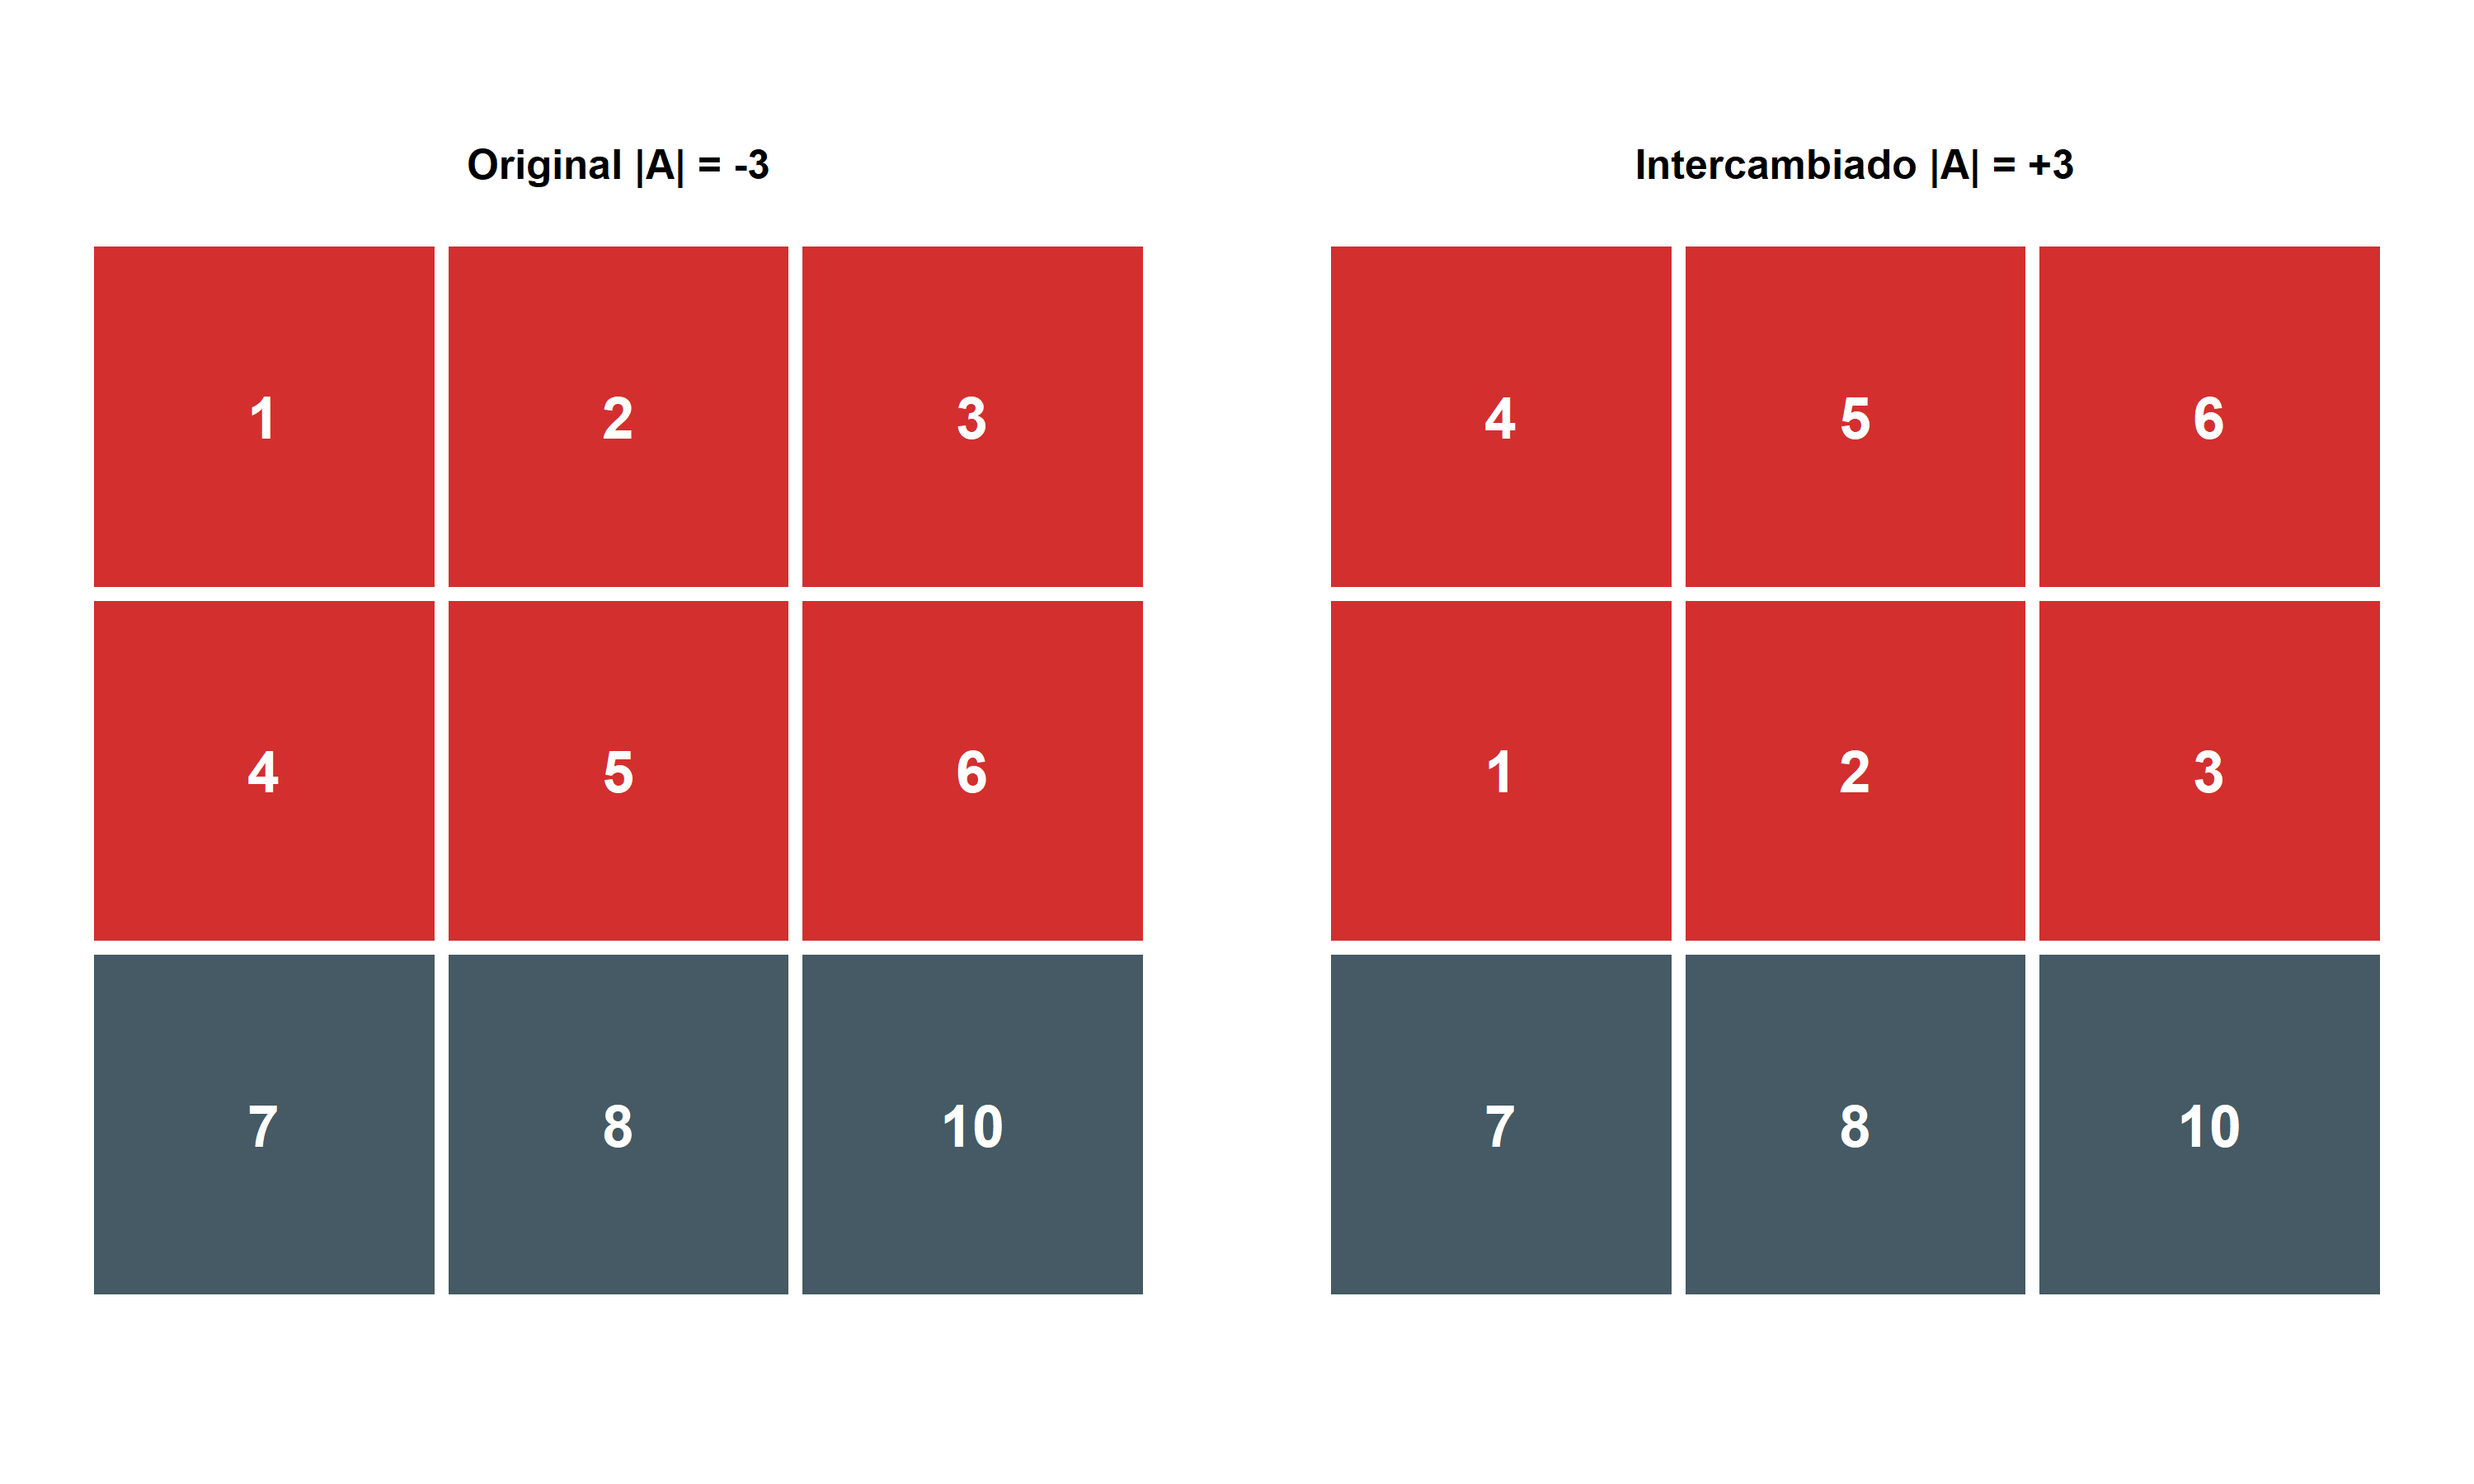

### Propiedad III: Factor Escalar

Multiplicar un renglón (o columna) por un escalar $k$ multiplica el determinante por $k$:

\$ \|kR_i\| = k\|A\| \$

**Corolario importante**: Si se multiplican **todos** los elementos de una matriz $n \times n$ por $k$:

\$ \|kA\| = k^n\|A\| \$

``` r
A <- matrix(c(2,1,3, 1,4,2, 3,2,1), 3, 3, byrow = TRUE)

# Multiplicar segunda fila por k=3
A_mult <- A
A_mult[2,] <- 3 * A_mult[2,]

cat("Matriz original A:\n")
```

    Matriz original A:

``` r
print(A)
```

         [,1] [,2] [,3]
    [1,]    2    1    3
    [2,]    1    4    2
    [3,]    3    2    1

``` r
cat(sprintf("|A| = %.4f\n", det(A)))
```

    |A| = -25.0000

``` r
cat("\nMatriz con R2 multiplicado por 3:\n")
```


    Matriz con R2 multiplicado por 3:

``` r
print(A_mult)
```

         [,1] [,2] [,3]
    [1,]    2    1    3
    [2,]    3   12    6
    [3,]    3    2    1

``` r
cat(sprintf("|A_mult| = %.4f\n", det(A_mult)))
```

    |A_mult| = -75.0000

``` r
cat(sprintf("Esperado: 3 × |A| = 3 × %.4f = %.4f ✓\n", det(A), 3*det(A)))
```

    Esperado: 3 × |A| = 3 × -25.0000 = -75.0000 ✓

``` r
# Multiplicar toda la matriz
k <- 2
A_total <- k * A
cat(sprintf("\n--- Multiplicar toda la matriz por k=%d ---\n", k))
```


    --- Multiplicar toda la matriz por k=2 ---

``` r
cat("Matriz 2A:\n")
```

    Matriz 2A:

``` r
print(A_total)
```

         [,1] [,2] [,3]
    [1,]    4    2    6
    [2,]    2    8    4
    [3,]    6    4    2

``` r
cat(sprintf("|kA| = %.4f\n", det(A_total)))
```

    |kA| = -200.0000

``` r
cat(sprintf("Esperado: k^n × |A| = %d^3 × %.4f = %.4f ✓\n", 
            k, det(A), k^3 * det(A)))
```

    Esperado: k^n × |A| = 2^3 × -25.0000 = -200.0000 ✓

### Propiedad IV: Operaciones Elementales

Sumar a un renglón un múltiplo de otro renglón **NO cambia** el determinante:

\$ \|R_i + kR_j\| = \|A\| (i j) \$

Esta propiedad es fundamental para el método de **eliminación de Gauss**.

``` r
A <- matrix(c(1,2,3, 4,5,6, 7,8,10), 3, 3, byrow = TRUE)

# Operación: R3 = R3 - 7*R1
A_operado <- A
A_operado[3,] <- A_operado[3,] - 7*A_operado[1,]

cat("Matriz original A:\n")
```

    Matriz original A:

``` r
print(A)
```

         [,1] [,2] [,3]
    [1,]    1    2    3
    [2,]    4    5    6
    [3,]    7    8   10

``` r
cat(sprintf("|A| = %.4f\n", det(A)))
```

    |A| = -3.0000

``` r
cat("\nMatriz después de R3 ← R3 - 7R1:\n")
```


    Matriz después de R3 ← R3 - 7R1:

``` r
print(A_operado)
```

         [,1] [,2] [,3]
    [1,]    1    2    3
    [2,]    4    5    6
    [3,]    0   -6  -11

``` r
cat(sprintf("|A_operado| = %.4f\n", det(A_operado)))
```

    |A_operado| = -3.0000

``` r
cat(sprintf("\nVerificación: Los determinantes son iguales ✓\n"))
```


    Verificación: Los determinantes son iguales ✓

``` r
cat(sprintf("Diferencia: %.10f (error numérico)\n", 
            abs(det(A) - det(A_operado))))
```

    Diferencia: 0.0000000000 (error numérico)

### Propiedad V: Renglones Proporcionales

Si una matriz tiene dos renglones (o columnas) **iguales o proporcionales**, su determinante es **cero**:

\$ R_i = kR_j \|A\| = 0 \$

``` r
# Caso 1: Renglones idénticos
A1 <- matrix(c(1,2,3, 1,2,3, 4,5,6), 3, 3, byrow = TRUE)

cat("Matriz con R1 = R2:\n")
```

    Matriz con R1 = R2:

``` r
print(A1)
```

         [,1] [,2] [,3]
    [1,]    1    2    3
    [2,]    1    2    3
    [3,]    4    5    6

``` r
cat(sprintf("|A| = %.10f\n", det(A1)))
```

    |A| = 0.0000000000

``` r
# Caso 2: Renglones proporcionales
A2 <- matrix(c(2,4,6, 1,2,3, 5,1,2), 3, 3, byrow = TRUE)

cat("\nMatriz con R1 = 2×R2:\n")
```


    Matriz con R1 = 2×R2:

``` r
print(A2)
```

         [,1] [,2] [,3]
    [1,]    2    4    6
    [2,]    1    2    3
    [3,]    5    1    2

``` r
cat(sprintf("|A| = %.10f\n", det(A2)))
```

    |A| = 0.0000000000

``` r
# Verificación de proporcionalidad
cat("\nVerificación R1/R2:\n")
```


    Verificación R1/R2:

``` r
print(A2[1,] / A2[2,])
```

    [1] 2 2 2

### Propiedad VI: Cofactores Ajenos

La suma de productos de elementos de un renglón por cofactores de **otro renglón diferente** es siempre **cero**:

\$ *{j=1}^{n} a*{ij}\|C\_{i’j}\| = 0 (i i’) \$

**Interpretación**: Esto es equivalente a calcular el determinante de una matriz con dos renglones idénticos.

``` r
library(matlib)

A <- matrix(c(2,1,3, 4,0,2, 1,3,1), 3, 3, byrow = TRUE)

cat("Matriz A:\n")
```

    Matriz A:

``` r
print(A)
```

         [,1] [,2] [,3]
    [1,]    2    1    3
    [2,]    4    0    2
    [3,]    1    3    1

``` r
cat(sprintf("\n|A| = %.4f\n", det(A)))
```


    |A| = 22.0000

``` r
# Calcular matriz de cofactores
calcular_cofactor <- function(M, i, j) {
  n <- nrow(M)
  menor <- M[-i, -j, drop = FALSE]
  return((-1)^(i+j) * det(menor))
}

# Matriz de cofactores
C <- matrix(0, 3, 3)
for (i in 1:3) {
  for (j in 1:3) {
    C[i,j] <- calcular_cofactor(A, i, j)
  }
}

cat("\nMatriz de cofactores C:\n")
```


    Matriz de cofactores C:

``` r
print(round(C, 4))
```

         [,1] [,2] [,3]
    [1,]   -6   -2   12
    [2,]    8   -1   -5
    [3,]    2    8   -4

``` r
# Expansión por renglón propio (debe dar |A|)
cat("\n--- Expansión por Renglón Propio ---\n")
```


    --- Expansión por Renglón Propio ---

``` r
for (i in 1:3) {
  suma <- sum(A[i,] * C[i,])
  cat(sprintf("Renglón %d: Σ a_%dj × C_%dj = %.4f\n", i, i, i, suma))
}
```

    Renglón 1: Σ a_1j × C_1j = 22.0000
    Renglón 2: Σ a_2j × C_2j = 22.0000
    Renglón 3: Σ a_3j × C_3j = 22.0000

``` r
# Expansión por renglón ajeno (debe dar 0)
cat("\n--- Expansión por Renglón Ajeno ---\n")
```


    --- Expansión por Renglón Ajeno ---

``` r
cat("Elementos de R1 × Cofactores de R2:\n")
```

    Elementos de R1 × Cofactores de R2:

``` r
suma_ajena <- sum(A[1,] * C[2,])
cat(sprintf("a_11×C_21 + a_12×C_22 + a_13×C_23 = %.10f\n", suma_ajena))
```

    a_11×C_21 + a_12×C_22 + a_13×C_23 = 0.0000000000

``` r
cat("\nElementos de R2 × Cofactores de R3:\n")
```


    Elementos de R2 × Cofactores de R3:

``` r
suma_ajena2 <- sum(A[2,] * C[3,])
cat(sprintf("a_21×C_31 + a_22×C_32 + a_23×C_33 = %.10f\n", suma_ajena2))
```

    a_21×C_31 + a_22×C_32 + a_23×C_33 = 0.0000000000

### Resumen de Propiedades

In [ ]:
propiedades_det <- data.frame(
  Propiedad = c(
    "I. Transpuesta",
    "II. Intercambio de renglones",
    "III. Multiplicación escalar (un renglón)",
    "III'. Multiplicación escalar (toda matriz)",
    "IV. Suma de múltiplo de renglón",
    "V. Renglones proporcionales",
    "VI. Cofactores ajenos"
  ),
  Expresión = c(
    "|A| = |A'|",
    "|A_swap| = -|A|",
    "|kR_i| = k|A|",
    "|kA| = k^n|A|",
    "|R_i + cR_j| = |A|",
    "R_i = kR_j ⇒ |A| = 0",
    "Σ a_ij C_i'j = 0 (i≠i')"
  ),
  Consecuencia = c(
    "Toda propiedad de renglones vale para columnas",
    "Las permutaciones impares cambian signo",
    "Factor común puede extraerse",
    "Cada dimensión aporta un factor k",
    "Base del método de Gauss",
    "Dependencia lineal ⇒ singular",
    "Fundamental para inversión de matrices"
  ),
  stringsAsFactors = FALSE
)

kable(propiedades_det, 
      align = "llc",
      caption = "Propiedades Fundamentales de los Determinantes") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"),
                full_width = TRUE) %>%
  column_spec(1, bold = TRUE, width = "18em") %>%
  column_spec(2, monospace = TRUE, width = "15em") %>%
  column_spec(3, width = "25em") %>%
  row_spec(0, bold = TRUE, color = "white", background = "#1976D2") %>%
  row_spec(c(2,5,6), background = "#FFF3E0")

  Propiedad                                     Expresión                                                  Consecuencia
  --------------------------------------------- ---------------------------------------- ------------------------------------------------
  I. Transpuesta                                &#124;A&#124; = &#124;A\'&#124;           Toda propiedad de renglones vale para columnas
  II\. Intercambio de renglones                 &#124;A_swap&#124; = -&#124;A&#124;          Las permutaciones impares cambian signo
  III\. Multiplicación escalar (un renglón)     &#124;kR_i&#124; = k&#124;A&#124;                  Factor común puede extraerse
  III\'. Multiplicación escalar (toda matriz)   &#124;kA&#124; = k\^n&#124;A&#124;              Cada dimensión aporta un factor k
  IV\. Suma de múltiplo de renglón              &#124;R_i + cR_j&#124; = &#124;A&#124;               Base del método de Gauss
  V. Renglones proporcionales                   R_i = kR_j ⇒ &#124;A&#124; = 0                    Dependencia lineal ⇒ singular
  VI\. Cofactores ajenos                        Σ a_ij C_i\'j = 0 (i≠i\')                     Fundamental para inversión de matrices

  : Propiedades Fundamentales de los Determinantes


## Evaluación de Determinantes

### Determinantes de Orden 2

Para una matriz $2 \times 2$, el determinante se calcula mediante la **regla del producto cruzado**:

\$

= ad - bc \$

In [ ]:
# Función para calcular determinante 2×2 manualmente
det_2x2 <- function(a, b, c, d) {
  return(a*d - b*c)
}

# Ejemplos
ejemplos_2x2 <- list(
  "Ejemplo 1" = matrix(c(3, 5, 2, 4), 2, 2, byrow = TRUE),
  "Ejemplo 2" = matrix(c(1, -2, 3, 4), 2, 2, byrow = TRUE),
  "Ejemplo 3 (singular)" = matrix(c(2, 4, 1, 2), 2, 2, byrow = TRUE)
)

cat("=== DETERMINANTES 2×2 ===\n\n")

=== DETERMINANTES 2×2 ===

Ejemplo 1:
     [,1] [,2]
[1,]    3    5
[2,]    2    4

|A| = (3)(4) - (5)(2) = 12 - 10 = 2
Verificación con R: 2.0000

Ejemplo 2:
     [,1] [,2]
[1,]    1   -2
[2,]    3    4

|A| = (1)(4) - (-2)(3) = 4 - -6 = 10
Verificación con R: 10.0000

Ejemplo 3 (singular):
     [,1] [,2]
[1,]    2    4
[2,]    1    2

|A| = (2)(2) - (4)(1) = 4 - 4 = 0
Verificación con R: 0.0000

### Determinantes de Orden 3: Regla de Sarrus

Para matrices $3 \times 3$, existe un método visual práctico:

\$

=

\$

In [ ]:
# Implementación de la regla de Sarrus
det_sarrus <- function(M) {
  # Diagonales principales (positivas)
  pos1 <- M[1,1] * M[2,2] * M[3,3]
  pos2 <- M[1,2] * M[2,3] * M[3,1]
  pos3 <- M[1,3] * M[2,1] * M[3,2]
  
  # Diagonales secundarias (negativas)
  neg1 <- M[1,3] * M[2,2] * M[3,1]
  neg2 <- M[1,1] * M[2,3] * M[3,2]
  neg3 <- M[1,2] * M[2,1] * M[3,3]
  
  resultado <- (pos1 + pos2 + pos3) - (neg1 + neg2 + neg3)
  
  cat("Diagonales principales (+):\n")
  cat(sprintf("  %d × %d × %d = %d\n", M[1,1], M[2,2], M[3,3], pos1))
  cat(sprintf("  %d × %d × %d = %d\n", M[1,2], M[2,3], M[3,1], pos2))
  cat(sprintf("  %d × %d × %d = %d\n", M[1,3], M[2,1], M[3,2], pos3))
  cat(sprintf("  Suma: %d\n\n", pos1 + pos2 + pos3))
  
  cat("Diagonales secundarias (-):\n")
  cat(sprintf("  %d × %d × %d = %d\n", M[1,3], M[2,2], M[3,1], neg1))
  cat(sprintf("  %d × %d × %d = %d\n", M[1,1], M[2,3], M[3,2], neg2))
  cat(sprintf("  %d × %d × %d = %d\n", M[1,2], M[2,1], M[3,3], neg3))
  cat(sprintf("  Suma: %d\n\n", neg1 + neg2 + neg3))
  
  cat(sprintf("Determinante: %d - %d = %d\n", 
              pos1 + pos2 + pos3, neg1 + neg2 + neg3, resultado))
  
  return(resultado)
}

# Ejemplo
A <- matrix(c(1, 2, 3,
              4, 5, 6,
              7, 8, 10), 3, 3, byrow = TRUE)

cat("Matriz A:\n")

Matriz A:

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8   10


Cálculo por Regla de Sarrus:

Diagonales principales (+):
  1 × 5 × 10 = 50
  2 × 6 × 7 = 84
  3 × 4 × 8 = 96
  Suma: 230

Diagonales secundarias (-):
  3 × 5 × 7 = 105
  1 × 6 × 8 = 48
  2 × 4 × 10 = 80
  Suma: 233

Determinante: 230 - 233 = -3


Verificación con R: -3.0000

### Visualización de la Regla de Sarrus

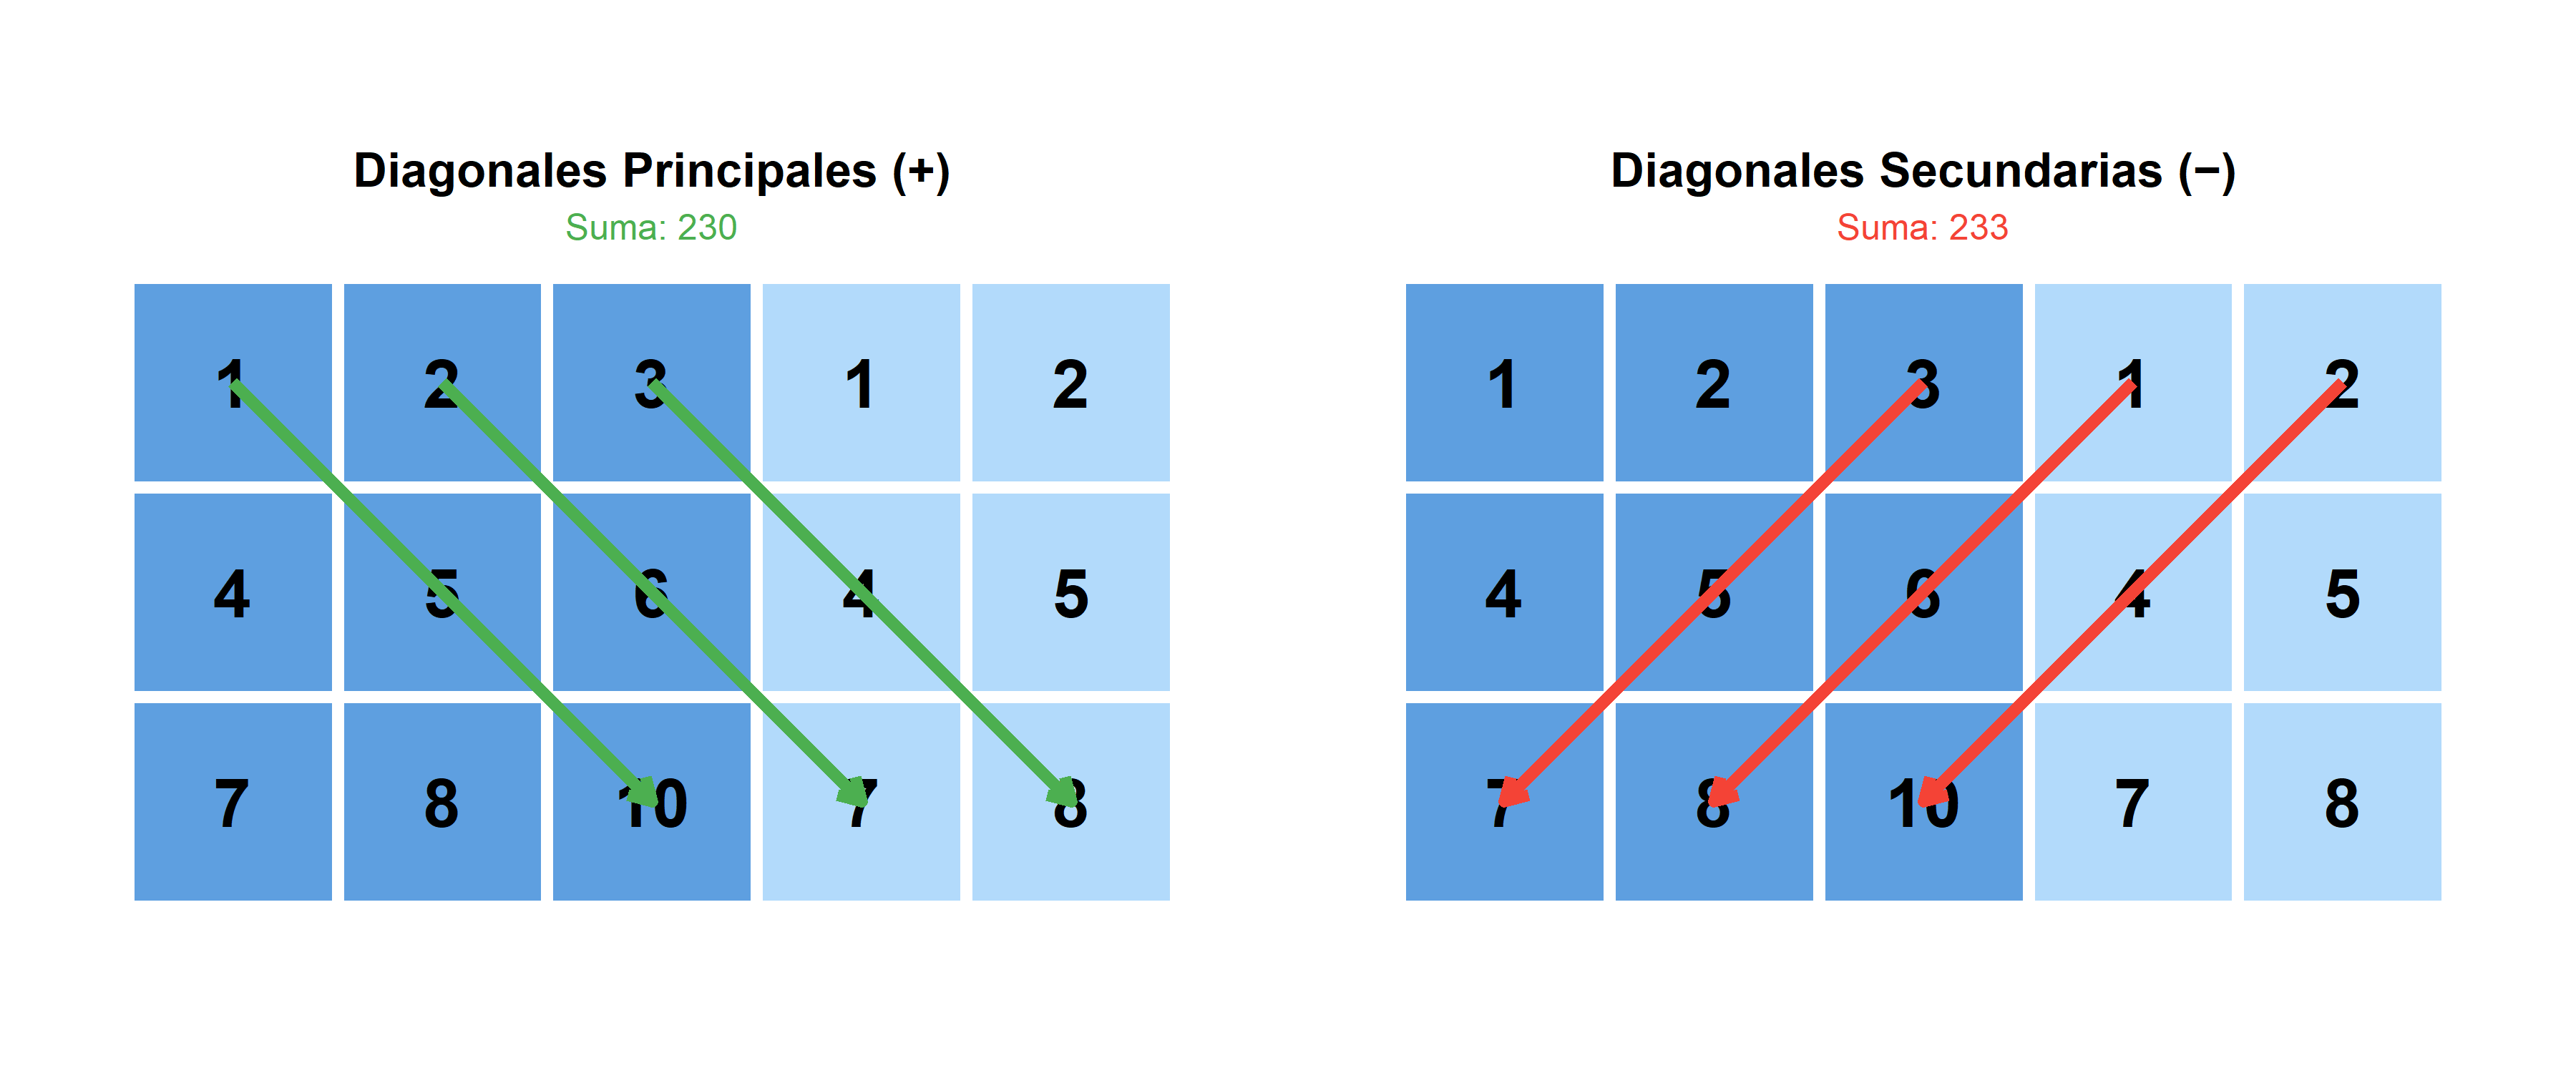

In [ ]:
# Crear visualización de las diagonales de Sarrus
visualizar_sarrus <- function(M) {
  # Extender matriz para visualización
  M_ext <- cbind(M, M[,1:2])
  
  df_elementos <- expand.grid(col = 1:5, fila = 1:3)
  df_elementos$valor <- as.vector(t(M_ext))
  df_elementos$tipo <- ifelse(df_elementos$col <= 3, "original", "repetido")
  
  p_base <- ggplot(df_elementos, aes(x = col, y = -fila)) +
    geom_tile(aes(fill = tipo), color = "white", linewidth = 2, alpha = 0.7) +
    geom_text(aes(label = valor), size = 8, fontface = "bold") +
    scale_fill_manual(values = c("original" = "#1976D2", "repetido" = "#90CAF9")) +
    coord_equal(xlim = c(0.5, 5.5), ylim = c(-3.5, -0.5)) +
    theme_void() +
    theme(legend.position = "none", plot.margin = margin(20, 20, 20, 20))
  
  # Diagonales positivas
  p_pos <- p_base +
    geom_segment(x = 1, y = -1, xend = 3, yend = -3, 
                 color = "#4CAF50", linewidth = 2, arrow = arrow(length = unit(0.3, "cm"))) +
    geom_segment(x = 2, y = -1, xend = 4, yend = -3, 
                 color = "#4CAF50", linewidth = 2, arrow = arrow(length = unit(0.3, "cm"))) +
    geom_segment(x = 3, y = -1, xend = 5, yend = -3, 
                 color = "#4CAF50", linewidth = 2, arrow = arrow(length = unit(0.3, "cm"))) +
    labs(title = "Diagonales Principales (+)", 
         subtitle = sprintf("Suma: %d", 
                           M[1,1]*M[2,2]*M[3,3] + M[1,2]*M[2,3]*M[3,1] + M[1,3]*M[2,1]*M[3,2])) +
    theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
          plot.subtitle = element_text(hjust = 0.5, size = 12, color = "#4CAF50"))
  
  # Diagonales negativas
  p_neg <- p_base +
    geom_segment(x = 3, y = -1, xend = 1, yend = -3, 
                 color = "#F44336", linewidth = 2, arrow = arrow(length = unit(0.3, "cm"))) +
    geom_segment(x = 4, y = -1, xend = 2, yend = -3, 
                 color = "#F44336", linewidth = 2, arrow = arrow(length = unit(0.3, "cm"))) +
    geom_segment(x = 5, y = -1, xend = 3, yend = -3, 
                 color = "#F44336", linewidth = 2, arrow = arrow(length = unit(0.3, "cm"))) +
    labs(title = "Diagonales Secundarias (−)", 
         subtitle = sprintf("Suma: %d", 
                           M[1,3]*M[2,2]*M[3,1] + M[1,1]*M[2,3]*M[3,2] + M[1,2]*M[2,1]*M[3,3])) +
    theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
          plot.subtitle = element_text(hjust = 0.5, size = 12, color = "#F44336"))
  
  return(list(positivas = p_pos, negativas = p_neg))
}

plots_sarrus <- visualizar_sarrus(A)
plots_sarrus$positivas | plots_sarrus$negativas

## Expansión de Laplace (Cofactores)

### Conceptos Fundamentales

> **Definiciones**
>
> **Menor** $|M_{ij}|$: Determinante de la submatriz obtenida al eliminar el renglón $i$ y la columna $j$.
>
> **Cofactor** $|C_{ij}|$: Menor con signo prescrito por la posición:
>
> \$ \|C\_{ij}\| = (-1)^{i+j} \|M\_{ij}\| \$
>
> **Patrón de signos** para cofactores:
>
> \$
>
> \$

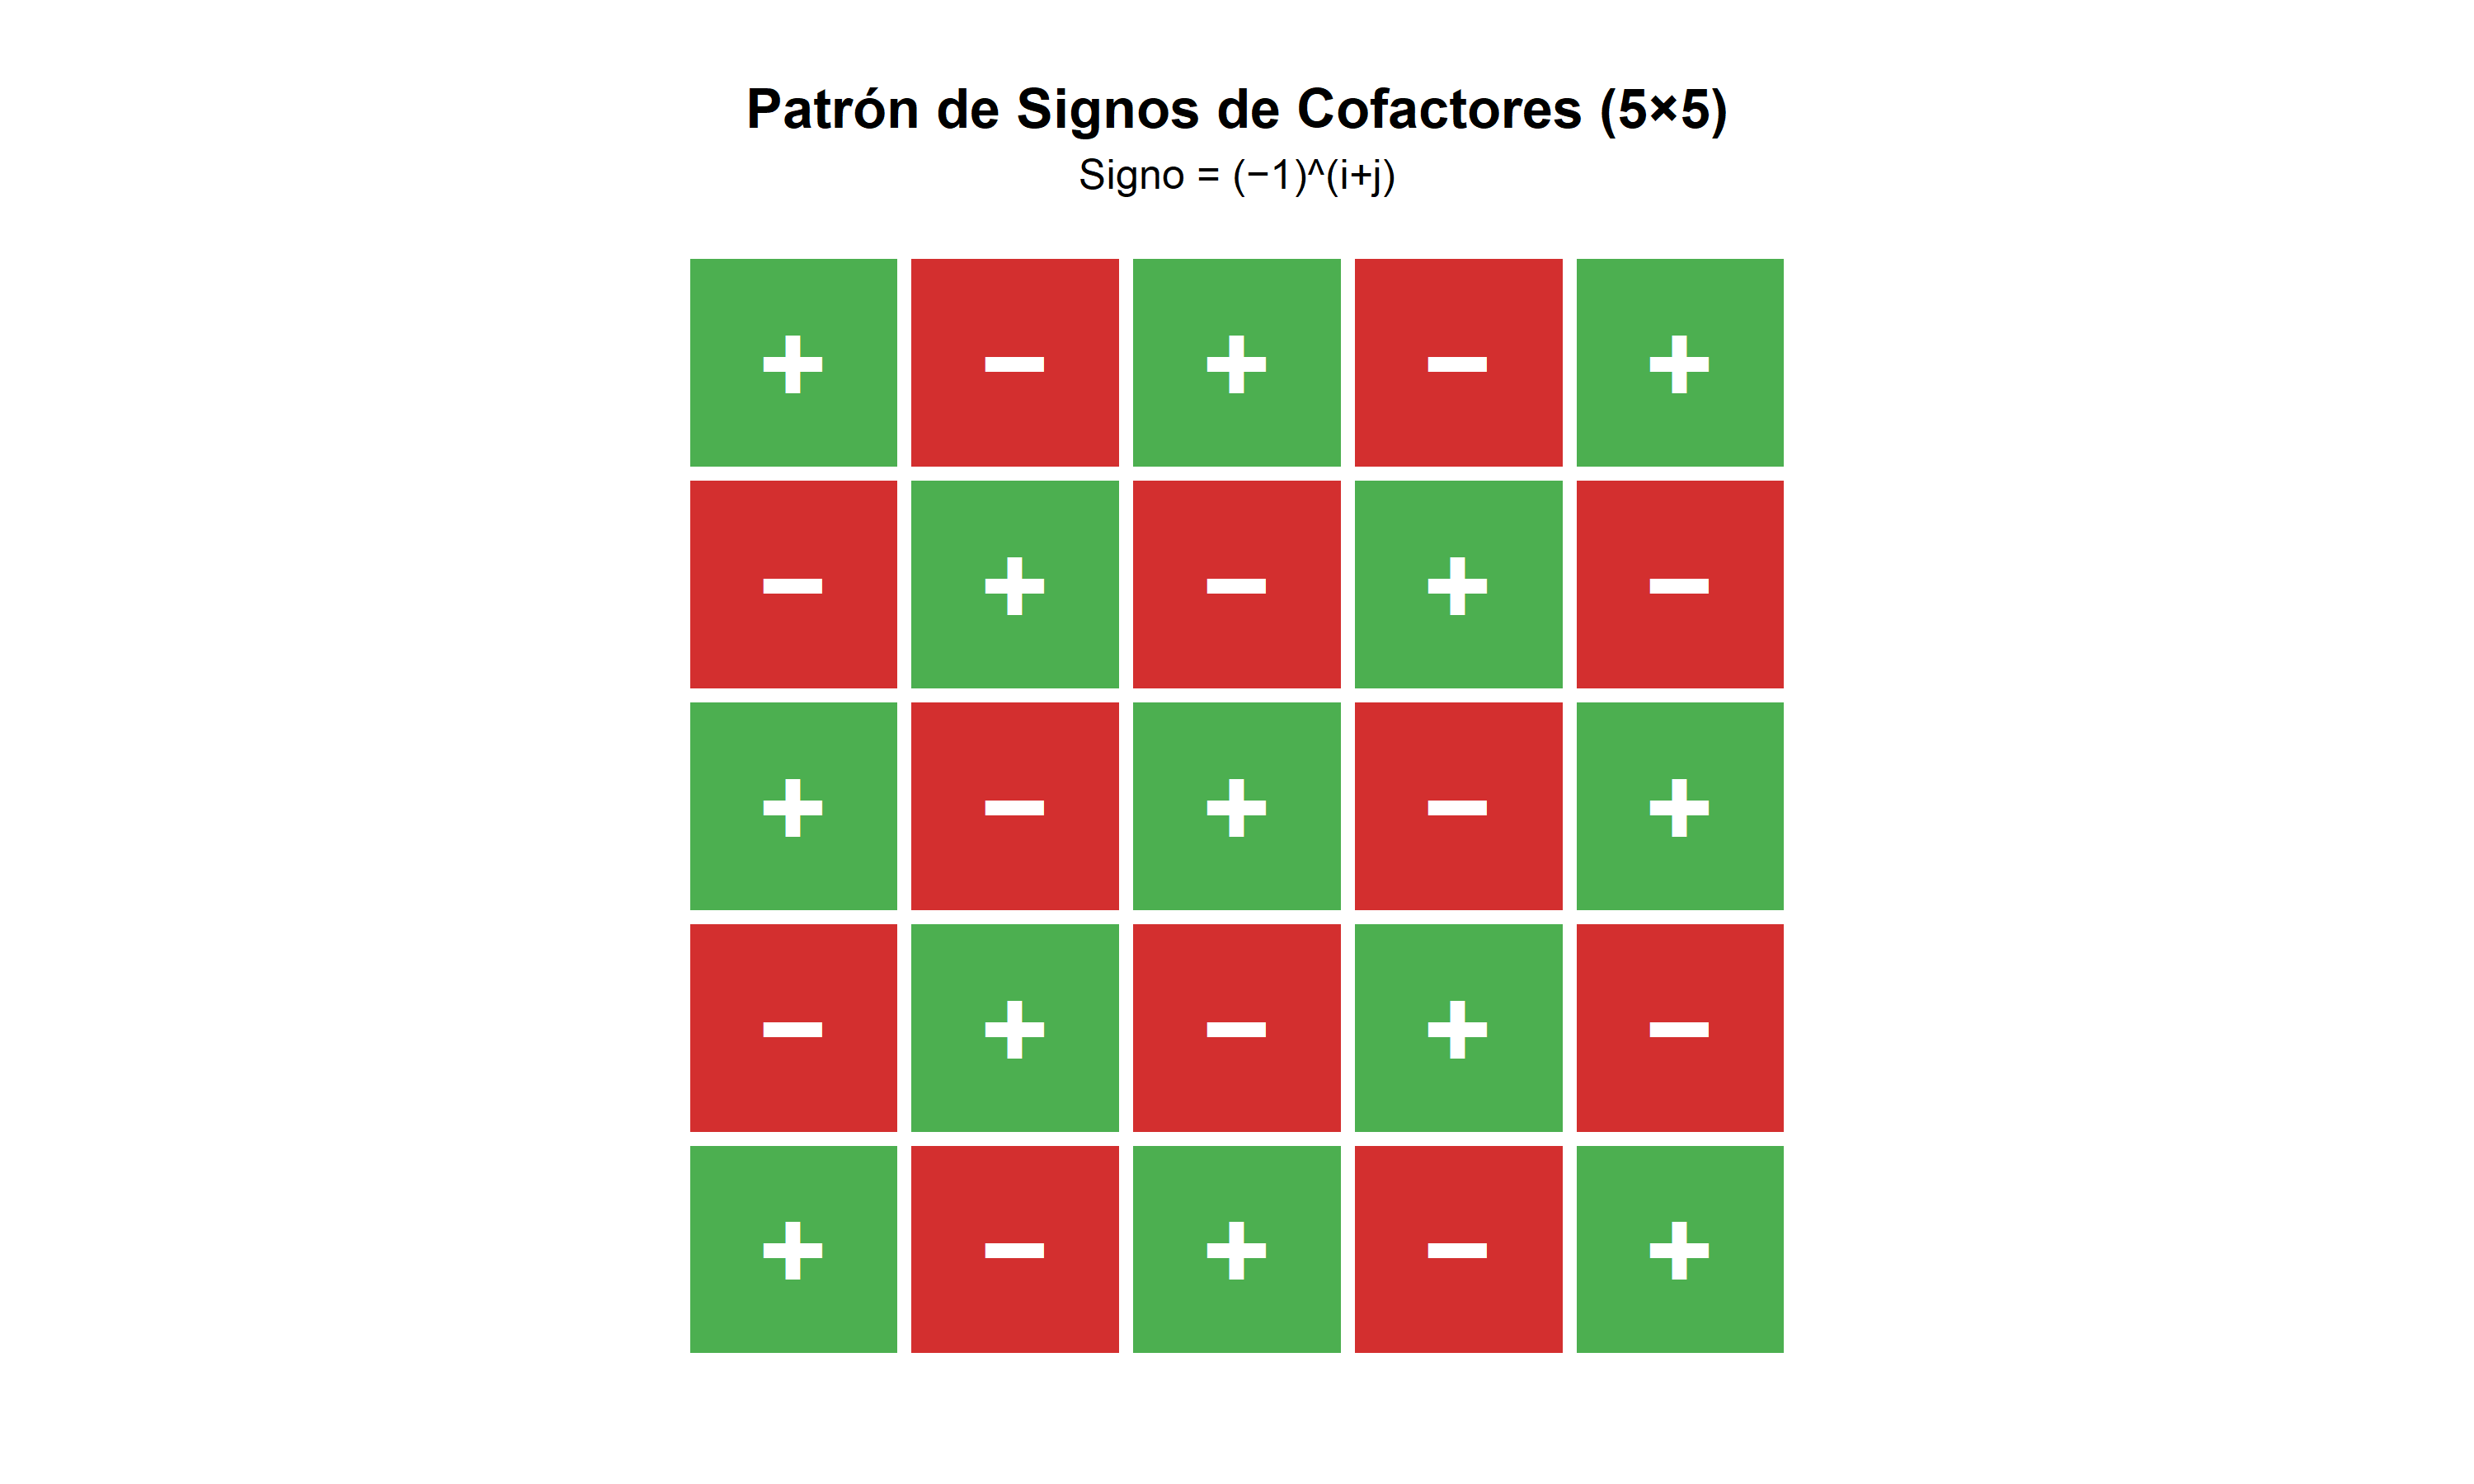

In [ ]:
# Visualizar patrón de signos
n <- 5
df_signos <- expand.grid(i = 1:n, j = 1:n)
df_signos$signo <- (-1)^(df_signos$i + df_signos$j)
df_signos$label <- ifelse(df_signos$signo == 1, "+", "−")

ggplot(df_signos, aes(x = j, y = -i, fill = factor(signo))) +
  geom_tile(color = "white", linewidth = 2) +
  geom_text(aes(label = label), size = 12, fontface = "bold", color = "white") +
  scale_fill_manual(values = c("-1" = "#D32F2F", "1" = "#4CAF50")) +
  coord_equal() +
  theme_void() +
  labs(title = "Patrón de Signos de Cofactores (5×5)",
       subtitle = "Signo = (−1)^(i+j)") +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 12),
    plot.margin = margin(20, 20, 20, 20)
  )

### Fórmula de Expansión

El determinante puede calcularse expandiendo por **cualquier renglón o columna**:

**Por renglón $i$**: \$ \|A\| = *{j=1}^{n} a*{ij} \|C\_{ij}\| = a\_{i1}\|C\_{i1}\| + a\_{i2}\|C\_{i2}\| + + a\_{in}\|C\_{in}\| \$

**Por columna $j$**: \$ \|A\| = *{i=1}^{n} a*{ij} \|C\_{ij}\| = a\_{1j}\|C\_{1j}\| + a\_{2j}\|C\_{2j}\| + + a\_{nj}\|C\_{nj}\| \$

In [ ]:
# Función recursiva para calcular determinante por Laplace
det_laplace <- function(M, verbose = FALSE) {
  n <- nrow(M)
  
  # Caso base: matriz 1×1
  if (n == 1) return(M[1,1])
  
  # Caso base: matriz 2×2
  if (n == 2) return(M[1,1]*M[2,2] - M[1,2]*M[2,1])
  
  # Expansión por primera fila
  det_val <- 0
  if (verbose) cat(sprintf("\nExpansión por renglón 1:\n"))
  
  for (j in 1:n) {
    # Calcular menor (eliminar fila 1, columna j)
    menor <- M[-1, -j, drop = FALSE]
    det_menor <- det_laplace(menor, verbose = FALSE)
    
    # Calcular cofactor
    signo <- (-1)^(1 + j)
    cofactor <- signo * det_menor
    
    # Acumular
    termino <- M[1, j] * cofactor
    det_val <- det_val + termino
    
    if (verbose && M[1,j] != 0) {
      cat(sprintf("  a_1%d × C_1%d = %d × (%d × %d) = %d\n", 
                  j, j, M[1,j], signo, det_menor, termino))
    }
  }
  
  if (verbose) cat(sprintf("\n|A| = %d\n", det_val))
  
  return(det_val)
}

# Ejemplo de expansión paso a paso
A <- matrix(c(2, 1, 3,
              4, 0, 2,
              1, 3, 1), 3, 3, byrow = TRUE)

cat("Matriz A (3×3):\n")

Matriz A (3×3):

     [,1] [,2] [,3]
[1,]    2    1    3
[2,]    4    0    2
[3,]    1    3    1


=== CÁLCULO DETALLADO ===


Expansión por renglón 1:
  a_11 × C_11 = 2 × (1 × -6) = -12
  a_12 × C_12 = 1 × (-1 × 2) = -2
  a_13 × C_13 = 3 × (1 × 12) = 36

|A| = 22


Verificación con R: 22.0000

Diferencia: 0.0000000000

### Estrategia Óptima: Elegir Renglón/Columna con Más Ceros

In [ ]:
# Matriz con muchos ceros estratégicos
B <- matrix(c(
  1, 2, 0, 9,
  2, 3, 4, 6,
  1, 6, 0, -1,
  0, -5, 0, 8
), 4, 4, byrow = TRUE)

cat("Matriz B (4×4):\n")

Matriz B (4×4):

     [,1] [,2] [,3] [,4]
[1,]    1    2    0    9
[2,]    2    3    4    6
[3,]    1    6    0   -1
[4,]    0   -5    0    8


Ceros por renglón: 1 0 1 2 

Ceros por columna: 1 0 3 0 


Mejor opción: Columna 3 (tiene 3 ceros)

Esto reduce el cálculo de 4 cofactores a solo 1


Expansión por columna 3:

  a_23 × C_23 = 4 × (-1 × -18) = 72


|B| = 72

Verificación: 72

### Matriz de Cofactores Completa

In [ ]:
# Función para calcular matriz de cofactores
matriz_cofactores <- function(M) {
  n <- nrow(M)
  C <- matrix(0, n, n)
  
  for (i in 1:n) {
    for (j in 1:n) {
      menor <- M[-i, -j, drop = FALSE]
      signo <- (-1)^(i + j)
      C[i, j] <- signo * det(menor)
    }
  }
  
  return(C)
}

A <- matrix(c(2, 1, 3,
              4, 0, 2,
              1, 3, 1), 3, 3, byrow = TRUE)

cat("Matriz A:\n")

Matriz A:

     [,1] [,2] [,3]
[1,]    2    1    3
[2,]    4    0    2
[3,]    1    3    1


Matriz de Cofactores C:

     [,1] [,2] [,3]
[1,]   -6   -2   12
[2,]    8   -1   -5
[3,]    2    8   -4


=== VERIFICACIÓN: Expansión por cada renglón ===

Renglón 1: Σ a_1j × C_1j = 22.0000
Renglón 2: Σ a_2j × C_2j = 22.0000
Renglón 3: Σ a_3j × C_3j = 22.0000


=== Expansión por cofactores AJENOS (debe dar 0) ===

R1 × Cofactores R2: 0.0000000000
R1 × Cofactores R3: -0.0000000000
R2 × Cofactores R3: 0.0000000000

## Inversión de Matrices

### Definición y Existencia

> **Teorema Fundamental de la Inversión**
>
> Una matriz cuadrada $A$ tiene una inversa **única** $A^{-1}$ si y solo si:
>
> \$ \|A\| \$
>
> La inversa satisface: \$ AA^{-1} = A^{-1}A = I \$
>
> Y se calcula mediante: \$ A^{-1} = (A) \$
>
> donde $\text{adj}(A)$ es la **matriz adjunta** (transpuesta de la matriz de cofactores).

### Propiedades de la Matriz Inversa

In [ ]:
prop_inv <- data.frame(
  Propiedad = c(
    "Unicidad",
    "Inversa de la inversa",
    "Inversa del producto",
    "Inversa de la transpuesta",
    "Determinante de la inversa",
    "Inversa de matriz escalar",
    "Inversa es no singular"
  ),
  Fórmula = c(
    "Si AB = BA = I entonces B = A⁻¹",
    "(A⁻¹)⁻¹ = A",
    "(AB)⁻¹ = B⁻¹A⁻¹",
    "(A')⁻¹ = (A⁻¹)'",
    "|A⁻¹| = 1/|A|",
    "(kA)⁻¹ = (1/k)A⁻¹",
    "|A⁻¹| ≠ 0"
  ),
  Interpretación = c(
    "La inversa es única si existe",
    "Invertir dos veces regresa al original",
    "Orden inverso (como calcetines y zapatos)",
    "Transponer e invertir conmutan",
    "El determinante se invierte",
    "Escalar se puede factorizar",
    "La inversa también es invertible"
  ),
  stringsAsFactors = FALSE
)

kable(prop_inv, 
      align = "llc",
      caption = "Propiedades Algebraicas de la Matriz Inversa") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"),
                full_width = TRUE) %>%
  column_spec(1, bold = TRUE, width = "15em") %>%
  column_spec(2, monospace = TRUE, background = "#E3F2FD", width = "15em") %>%
  column_spec(3, width = "25em") %>%
  row_spec(0, bold = TRUE, color = "white", background = "#0277BD")

  Propiedad                    Fórmula                                           Interpretación
  ---------------------------- ----------------------------------- -------------------------------------------
  Unicidad                     Si AB = BA = I entonces B = A⁻¹            La inversa es única si existe
  Inversa de la inversa        (A⁻¹)⁻¹ = A                           Invertir dos veces regresa al original
  Inversa del producto         (AB)⁻¹ = B⁻¹A⁻¹                      Orden inverso (como calcetines y zapatos)
  Inversa de la transpuesta    (A\')⁻¹ = (A⁻¹)\'                         Transponer e invertir conmutan
  Determinante de la inversa   &#124;A⁻¹&#124; = 1/&#124;A&#124;           El determinante se invierte
  Inversa de matriz escalar    (kA)⁻¹ = (1/k)A⁻¹                           Escalar se puede factorizar
  Inversa es no singular       &#124;A⁻¹&#124; ≠ 0                      La inversa también es invertible

  : Propiedades Algebraicas de la Matriz Inversa


### Método de la Adjunta (Cofactores)

**Pasos del algoritmo**:

1.  Calcular $|A|$ (si es 0, no hay inversa)
2.  Construir matriz de cofactores $C$
3.  Transponer para obtener adjunta: $\text{adj}(A) = C'$
4.  Dividir: $A^{-1} = \frac{1}{|A|} \text{adj}(A)$

In [ ]:
# Implementación completa del método de la adjunta
invertir_por_adjunta <- function(M, verbose = TRUE) {
  n <- nrow(M)
  
  # Paso 1: Determinante
  det_M <- det(M)
  if (verbose) {
    cat("=== INVERSIÓN POR MÉTODO DE LA ADJUNTA ===\n\n")
    cat("Matriz original A:\n")
    print(M)
    cat(sprintf("\nPaso 1: |A| = %.4f\n", det_M))
  }
  
  if (abs(det_M) < 1e-10) {
    cat("\n✗ MATRIZ SINGULAR (|A| = 0)\n")
    cat("No existe inversa.\n")
    return(NULL)
  }
  
  # Paso 2: Matriz de cofactores
  C <- matriz_cofactores(M)
  if (verbose) {
    cat("\nPaso 2: Matriz de cofactores C:\n")
    print(round(C, 4))
  }
  
  # Paso 3: Adjunta (transpuesta de cofactores)
  adj_M <- t(C)
  if (verbose) {
    cat("\nPaso 3: Matriz adjunta adj(A) = C':\n")
    print(round(adj_M, 4))
  }
  
  # Paso 4: Inversa
  inv_M <- (1/det_M) * adj_M
  if (verbose) {
    cat(sprintf("\nPaso 4: A⁻¹ = (1/|A|) × adj(A) = (1/%.4f) × adj(A)\n", det_M))
    cat("\nMatriz inversa A⁻¹:\n")
    print(round(inv_M, 6))
  }
  
  # Verificación
  if (verbose) {
    cat("\n=== VERIFICACIÓN ===\n")
    producto <- M %*% inv_M
    cat("A × A⁻¹ (debe ser I):\n")
    print(round(producto, 10))
    
    error <- max(abs(producto - diag(n)))
    cat(sprintf("\nError máximo: %.2e\n", error))
  }
  
  return(inv_M)
}

# Ejemplo 2×2
A2 <- matrix(c(4, 7, 2, 6), 2, 2, byrow = TRUE)
inv_A2 <- invertir_por_adjunta(A2)

=== INVERSIÓN POR MÉTODO DE LA ADJUNTA ===

Matriz original A:
     [,1] [,2]
[1,]    4    7
[2,]    2    6

Paso 1: |A| = 10.0000

Paso 2: Matriz de cofactores C:
     [,1] [,2]
[1,]    6   -2
[2,]   -7    4

Paso 3: Matriz adjunta adj(A) = C':
     [,1] [,2]
[1,]    6   -7
[2,]   -2    4

Paso 4: A⁻¹ = (1/|A|) × adj(A) = (1/10.0000) × adj(A)

Matriz inversa A⁻¹:
     [,1] [,2]
[1,]  0.6 -0.7
[2,] -0.2  0.4

=== VERIFICACIÓN ===
A × A⁻¹ (debe ser I):
     [,1] [,2]
[1,]    1    0
[2,]    0    1

Error máximo: 4.44e-16

=== INVERSIÓN POR MÉTODO DE LA ADJUNTA ===

Matriz original A:
     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    0    1    4
[3,]    5    6    0

Paso 1: |A| = 1.0000

Paso 2: Matriz de cofactores C:
     [,1] [,2] [,3]
[1,]  -24   20   -5
[2,]   18  -15    4
[3,]    5   -4    1

Paso 3: Matriz adjunta adj(A) = C':
     [,1] [,2] [,3]
[1,]  -24   18    5
[2,]   20  -15   -4
[3,]   -5    4    1

Paso 4: A⁻¹ = (1/|A|) × adj(A) = (1/1.0000) × adj(A)

Matriz inversa A⁻¹:
     [,1] [,2] [,3]
[1,]  -24   18    5
[2,]   20  -15   -4
[3,]   -5    4    1

=== VERIFICACIÓN ===
A × A⁻¹ (debe ser I):
     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    0    1    0
[3,]    0    0    1

Error máximo: 1.42e-14

### Regla Simplificada para Matrices 2×2

Para matrices $2 \times 2$ existe un **atajo**:

\$

^{-1} =

\$

**Pasos**: 1. Intercambiar elementos de la diagonal principal 2. Cambiar signo a elementos fuera de la diagonal 3. Dividir entre el determinante

In [ ]:
# Función optimizada para 2×2
invertir_2x2 <- function(M) {
  if (nrow(M) != 2 || ncol(M) != 2) {
    stop("Solo para matrices 2×2")
  }
  
  a <- M[1,1]; b <- M[1,2]; c <- M[2,1]; d <- M[2,2]
  det_M <- a*d - b*c
  
  cat("Matriz A:\n")
  print(M)
  cat(sprintf("\n|A| = %d×%d - %d×%d = %d\n", a, d, b, c, det_M))
  
  if (abs(det_M) < 1e-10) {
    cat("Matriz singular, no existe inversa.\n")
    return(NULL)
  }
  
  # Aplicar regla
  inv_M <- (1/det_M) * matrix(c(d, -c, -b, a), 2, 2, byrow = TRUE)
  
  cat("\nPasos:\n")
  cat(sprintf("  1. Intercambiar diagonal: [%d %d; %d %d] → [%d %d; %d %d]\n",
              a, b, c, d, d, b, c, a))
  cat(sprintf("  2. Cambiar signos fuera diagonal: [%d %d; %d %d]\n",
              d, -b, -c, a))
  cat(sprintf("  3. Dividir entre |A| = %d\n", det_M))
  
  cat("\nA⁻¹ =\n")
  print(round(inv_M, 4))
  
  return(inv_M)
}

# Ejemplos
ejemplos <- list(
  matrix(c(3, 5, 2, 4), 2, 2, byrow = TRUE),
  matrix(c(1, -2, 3, 4), 2, 2, byrow = TRUE)
)

for (i in seq_along(ejemplos)) {
  cat(sprintf("\n=== EJEMPLO %d ===\n", i))
  invertir_2x2(ejemplos[[i]])
  cat("\n")
}


=== EJEMPLO 1 ===
Matriz A:
     [,1] [,2]
[1,]    3    5
[2,]    2    4

|A| = 3×4 - 5×2 = 2

Pasos:
  1. Intercambiar diagonal: [3 5; 2 4] → [4 5; 2 3]
  2. Cambiar signos fuera diagonal: [4 -5; -2 3]
  3. Dividir entre |A| = 2

A⁻¹ =
     [,1] [,2]
[1,]  2.0 -1.0
[2,] -2.5  1.5


=== EJEMPLO 2 ===
Matriz A:
     [,1] [,2]
[1,]    1   -2
[2,]    3    4

|A| = 1×4 - -2×3 = 10

Pasos:
  1. Intercambiar diagonal: [1 -2; 3 4] → [4 -2; 3 1]
  2. Cambiar signos fuera diagonal: [4 2; -3 1]
  3. Dividir entre |A| = 10

A⁻¹ =
     [,1] [,2]
[1,]  0.4 -0.3
[2,]  0.2  0.1

### Método de Gauss-Jordan

Una alternativa computacionalmente más eficiente es el **método de eliminación de Gauss-Jordan**:

**Procedimiento**: 1. Formar matriz aumentada $[A | I]$ 2. Mediante operaciones elementales de renglón, transformar $A$ en $I$ 3. El resultado es $[I | A^{-1}]$

In [ ]:
# Implementación del método de Gauss-Jordan
gauss_jordan_inversa <- function(M, verbose = TRUE) {
  n <- nrow(M)
  
  # Crear matriz aumentada [A | I]
  aug <- cbind(M, diag(n))
  
  if (verbose) {
    cat("=== MÉTODO DE GAUSS-JORDAN ===\n\n")
    cat("Matriz aumentada inicial [A | I]:\n")
    print(aug)
    cat("\n")
  }
  
  # Eliminación hacia adelante y hacia atrás
  for (i in 1:n) {
    # Buscar pivote
    if (abs(aug[i, i]) < 1e-10) {
      # Buscar renglón con elemento no cero
      for (k in (i+1):n) {
        if (k <= n && abs(aug[k, i]) > 1e-10) {
          # Intercambiar renglones
          temp <- aug[i, ]
          aug[i, ] <- aug[k, ]
          aug[k, ] <- temp
          if (verbose) cat(sprintf("Intercambiar R%d ↔ R%d\n", i, k))
          break
        }
      }
    }
    
    # Normalizar renglón pivote
    pivote <- aug[i, i]
    if (abs(pivote) < 1e-10) {
      cat("\n✗ MATRIZ SINGULAR\n")
      return(NULL)
    }
    
    aug[i, ] <- aug[i, ] / pivote
    if (verbose && abs(pivote - 1) > 1e-10) {
      cat(sprintf("R%d ← R%d / %.4f\n", i, i, pivote))
    }
    
    # Eliminar columna en otros renglones
    for (j in 1:n) {
      if (j != i && abs(aug[j, i]) > 1e-10) {
        factor <- aug[j, i]
        aug[j, ] <- aug[j, ] - factor * aug[i, ]
        if (verbose) {
          cat(sprintf("R%d ← R%d - %.4f×R%d\n", j, j, factor, i))
        }
      }
    }
    
    if (verbose) {
      cat("\nMatriz después del paso", i, ":\n")
      print(round(aug, 4))
      cat("\n")
    }
  }
  
  # Extraer inversa (lado derecho)
  inv_M <- aug[, (n+1):(2*n)]
  
  if (verbose) {
    cat("=== RESULTADO ===\n")
    cat("Matriz inversa A⁻¹:\n")
    print(round(inv_M, 6))
    
    # Verificación
    cat("\nVerificación A × A⁻¹:\n")
    print(round(M %*% inv_M, 10))
  }
  
  return(inv_M)
}

# Ejemplo
A <- matrix(c(2, 1, 1,
              1, 3, 2,
              1, 0, 0), 3, 3, byrow = TRUE)

inv_gj <- gauss_jordan_inversa(A, verbose = TRUE)

=== MÉTODO DE GAUSS-JORDAN ===

Matriz aumentada inicial [A | I]:
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    2    1    1    1    0    0
[2,]    1    3    2    0    1    0
[3,]    1    0    0    0    0    1

R1 ← R1 / 2.0000
R2 ← R2 - 1.0000×R1
R3 ← R3 - 1.0000×R1

Matriz después del paso 1 :
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    1  0.5  0.5  0.5    0    0
[2,]    0  2.5  1.5 -0.5    1    0
[3,]    0 -0.5 -0.5 -0.5    0    1

R2 ← R2 / 2.5000
R1 ← R1 - 0.5000×R2
R3 ← R3 - -0.5000×R2

Matriz después del paso 2 :
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    1    0  0.2  0.6 -0.2    0
[2,]    0    1  0.6 -0.2  0.4    0
[3,]    0    0 -0.2 -0.6  0.2    1

R3 ← R3 / -0.2000
R1 ← R1 - 0.2000×R3
R2 ← R2 - 0.6000×R3

Matriz después del paso 3 :
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    1    0    0    0    0    1
[2,]    0    1    0   -2    1    3
[3,]    0    0    1    3   -1   -5

=== RESULTADO ===
Matriz inversa A⁻¹:
     [,1] [,2] [,3]
[1,]    0    0    1
[2,]   -2    1    3
[3,]    3   

### Comparación de Métodos

  Tamaño   Método          Tiempo_Medio_ms
  -------- ------------- -----------------
  3×3      R_solve                   0.034
  3×3      Adjunta                   0.214
  3×3      GaussJordan               0.043
  5×5      R_solve                   0.056
  5×5      Adjunta                   0.584
  5×5      GaussJordan               0.083
  10×10    R_solve                   0.066
  10×10    Adjunta                   2.219
  10×10    GaussJordan               0.317
  20×20    R_solve                   0.116
  20×20    Adjunta                  11.010
  20×20    GaussJordan               1.320

  : Comparación de Tiempos de Ejecución (milisegundos)


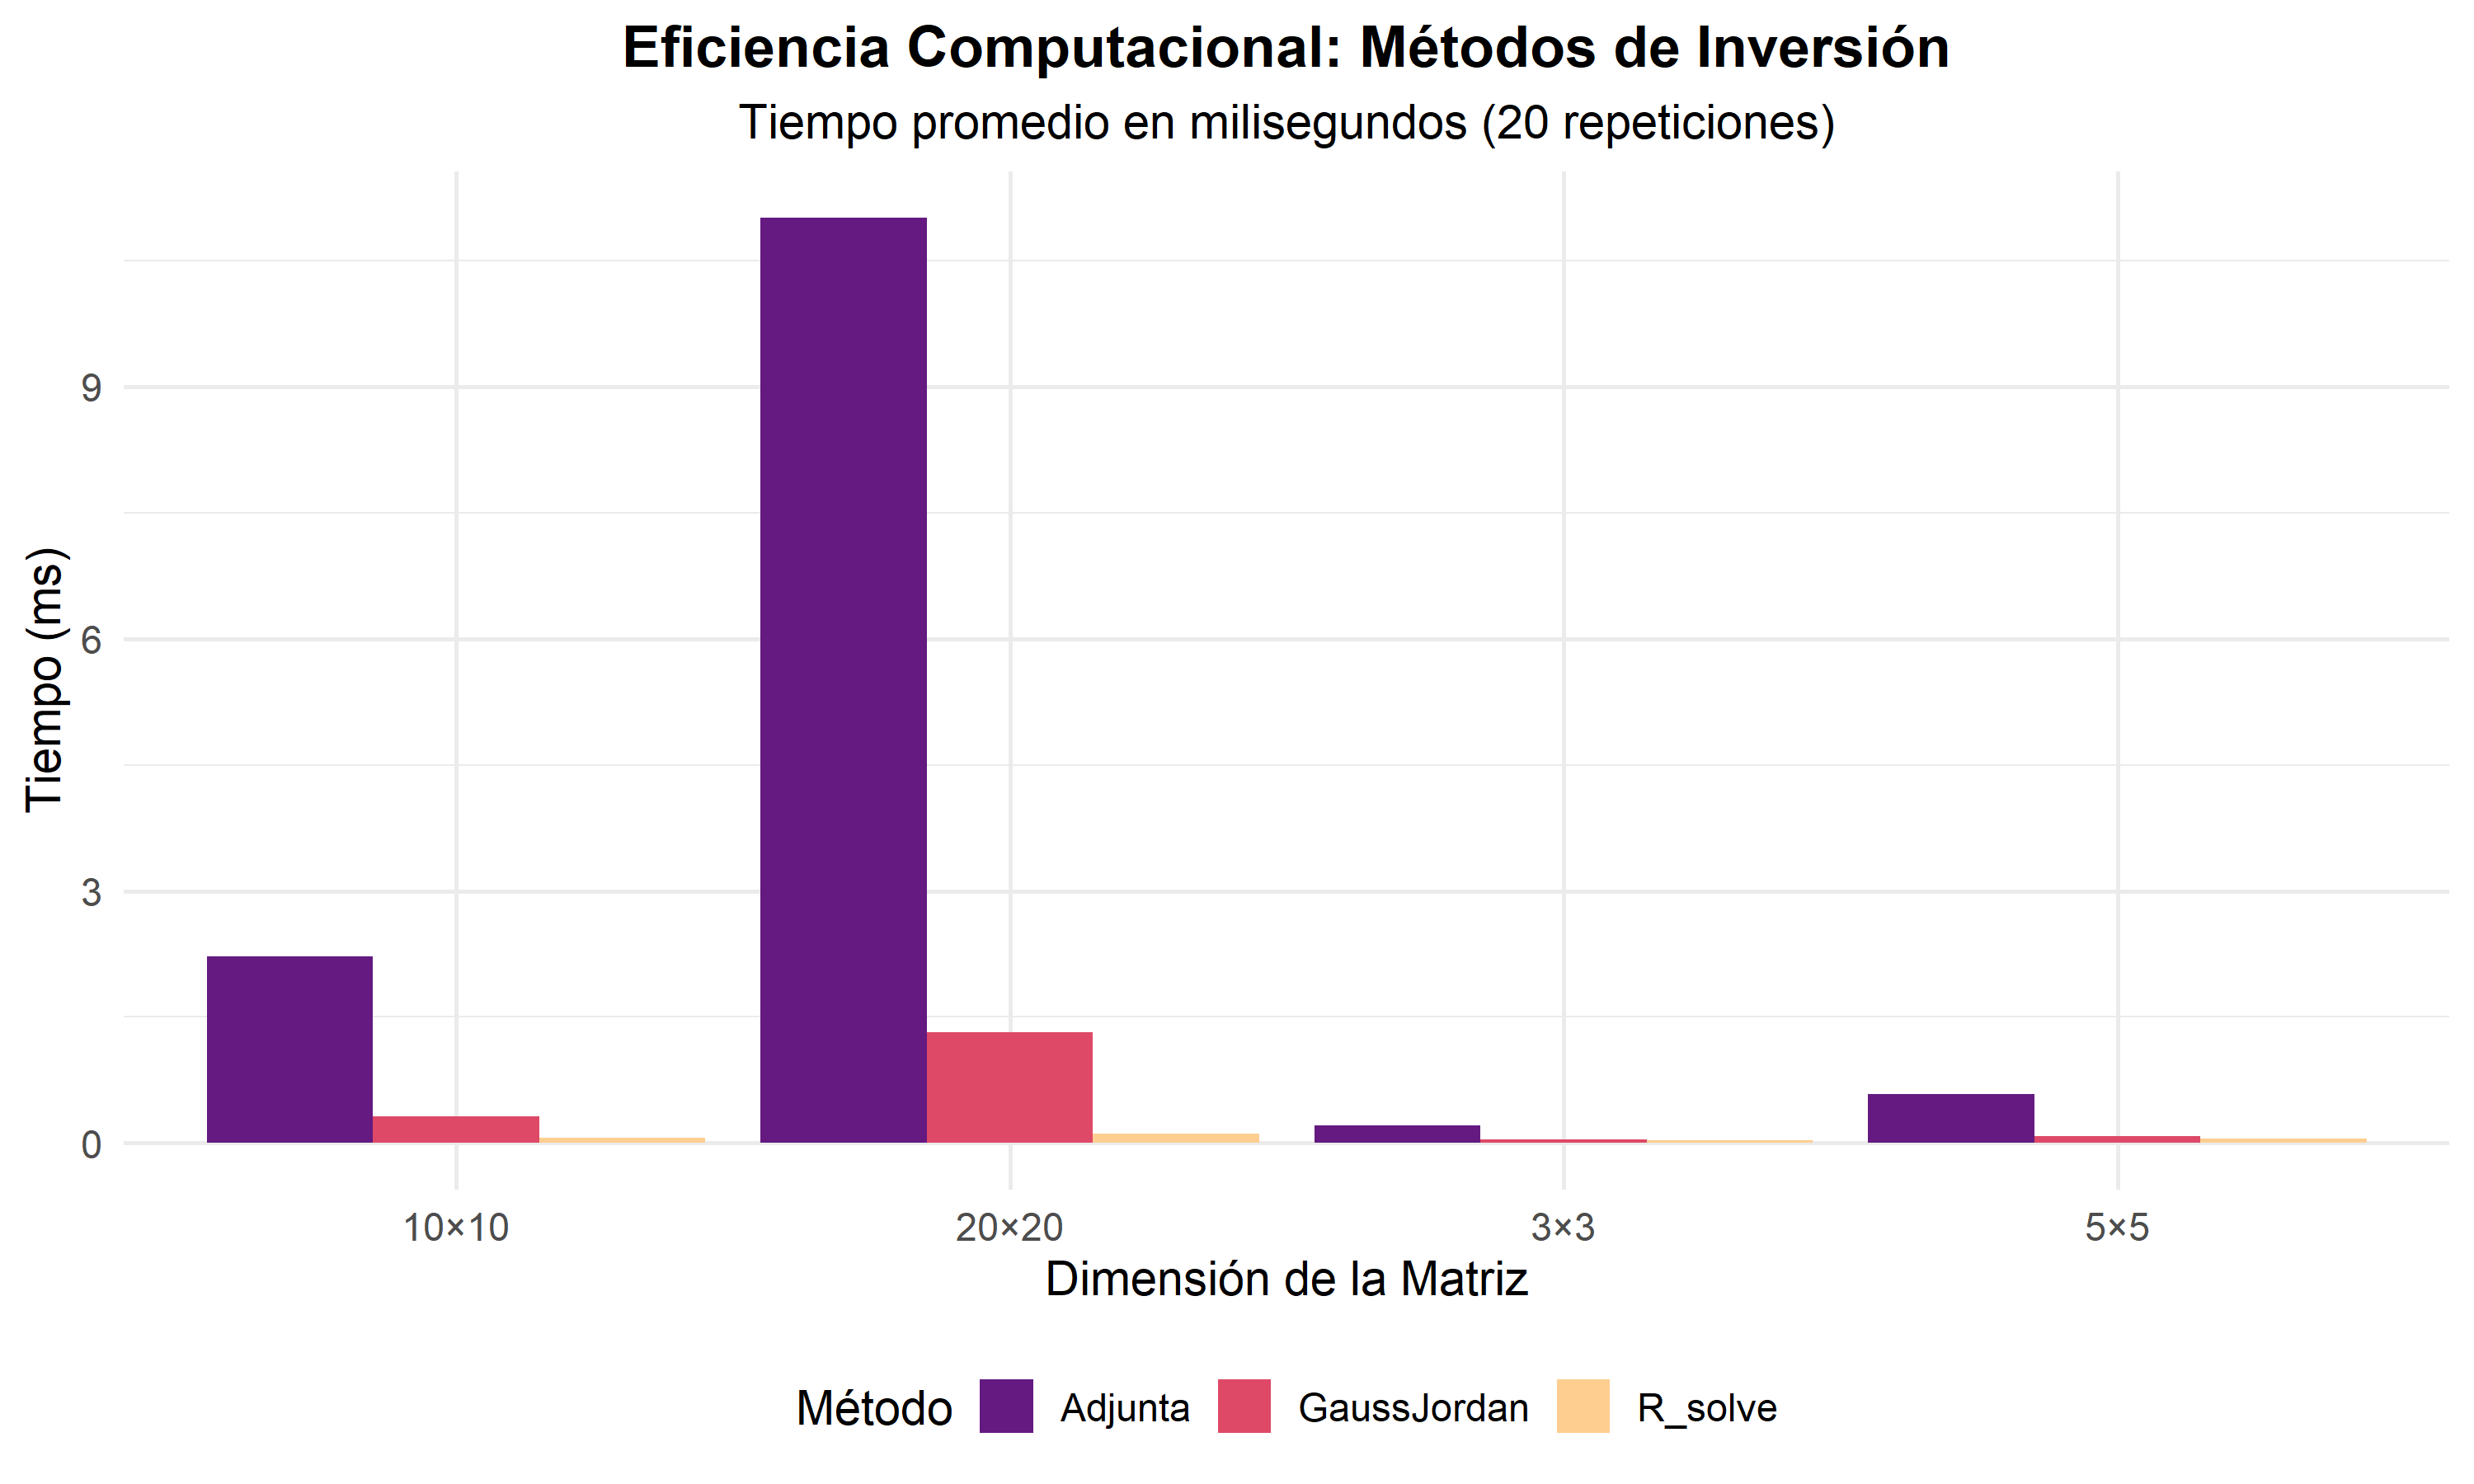

In [ ]:
library(microbenchmark)

# Generar matrices de prueba de diferentes tamaños
tamaños <- c(3, 5, 10, 20)
resultados_tiempo <- data.frame()

for (n in tamaños) {
  set.seed(42)
  M <- matrix(rnorm(n*n), n, n)
  
  # Asegurar que sea invertible
  while (abs(det(M)) < 0.1) {
    M <- matrix(rnorm(n*n), n, n)
  }
  
  # Benchmark
  tiempos <- microbenchmark(
    R_solve = solve(M),
    Adjunta = {
      C <- matriz_cofactores(M)
      (1/det(M)) * t(C)
    },
    GaussJordan = gauss_jordan_inversa(M, verbose = FALSE),
    times = 20,
    unit = "ms"
  )
  
  # Resumir
  resumen <- summary(tiempos)
  for (metodo in c("R_solve", "Adjunta", "GaussJordan")) {
    resultados_tiempo <- rbind(resultados_tiempo, data.frame(
      Tamaño = paste0(n, "×", n),
      Método = metodo,
      Tiempo_Medio_ms = resumen[resumen$expr == metodo, "mean"],
      stringsAsFactors = FALSE
    ))
  }
}

# Tabla de resultados
kable(resultados_tiempo, 
      digits = 3,
      align = "llr",
      caption = "Comparación de Tiempos de Ejecución (milisegundos)") %>%
  kable_styling(bootstrap_options = c("striped", "hover"), 
                full_width = FALSE) %>%
  column_spec(1, bold = TRUE) %>%
  column_spec(3, color = spec_color(resultados_tiempo$Tiempo_Medio_ms, 
                                     begin = 0.3, end = 0.9,
                                     option = "plasma", direction = -1))

> **Recomendaciones Prácticas**
>
> -   **Matrices pequeñas (≤3×3)**: Método de la adjunta (didáctico)
> -   **Matrices medianas (4×10)**: Gauss-Jordan (balance eficiencia/claridad)
> -   **Matrices grandes (\>10)**: `solve()` en R (optimizado, usa LAPACK)
> -   **Matrices especiales** (diagonales, triangulares): Métodos especializados

# Regla de Cramer

## Fundamento Teórico

> **Teorema: Regla de Cramer**
>
> Para un sistema de ecuaciones lineales $Ax = d$ con $|A| \neq 0$, la solución para cada variable $x_j$ es:
>
> \$ x_j = \$
>
> donde $A_j$ es la matriz obtenida al **reemplazar la $j$-ésima columna de $A$ por el vector $d$**.

### Derivación desde la Matriz Inversa

La regla de Cramer se deriva de la solución general $x = A^{-1}d$:

\$ x = A^{-1}d = ( A) d \$

El elemento $j$ del vector solución es:

\$ x_j = *{i=1}^{n} d_i \|C*{ij}\| = \$

Sistema Ax = d:

           d_ejemplo
[1,] 2 1 3        10
[2,] 1 4 2        12
[3,] 3 2 1         8


=== CONSTRUCCIÓN DE MATRICES A_j ===

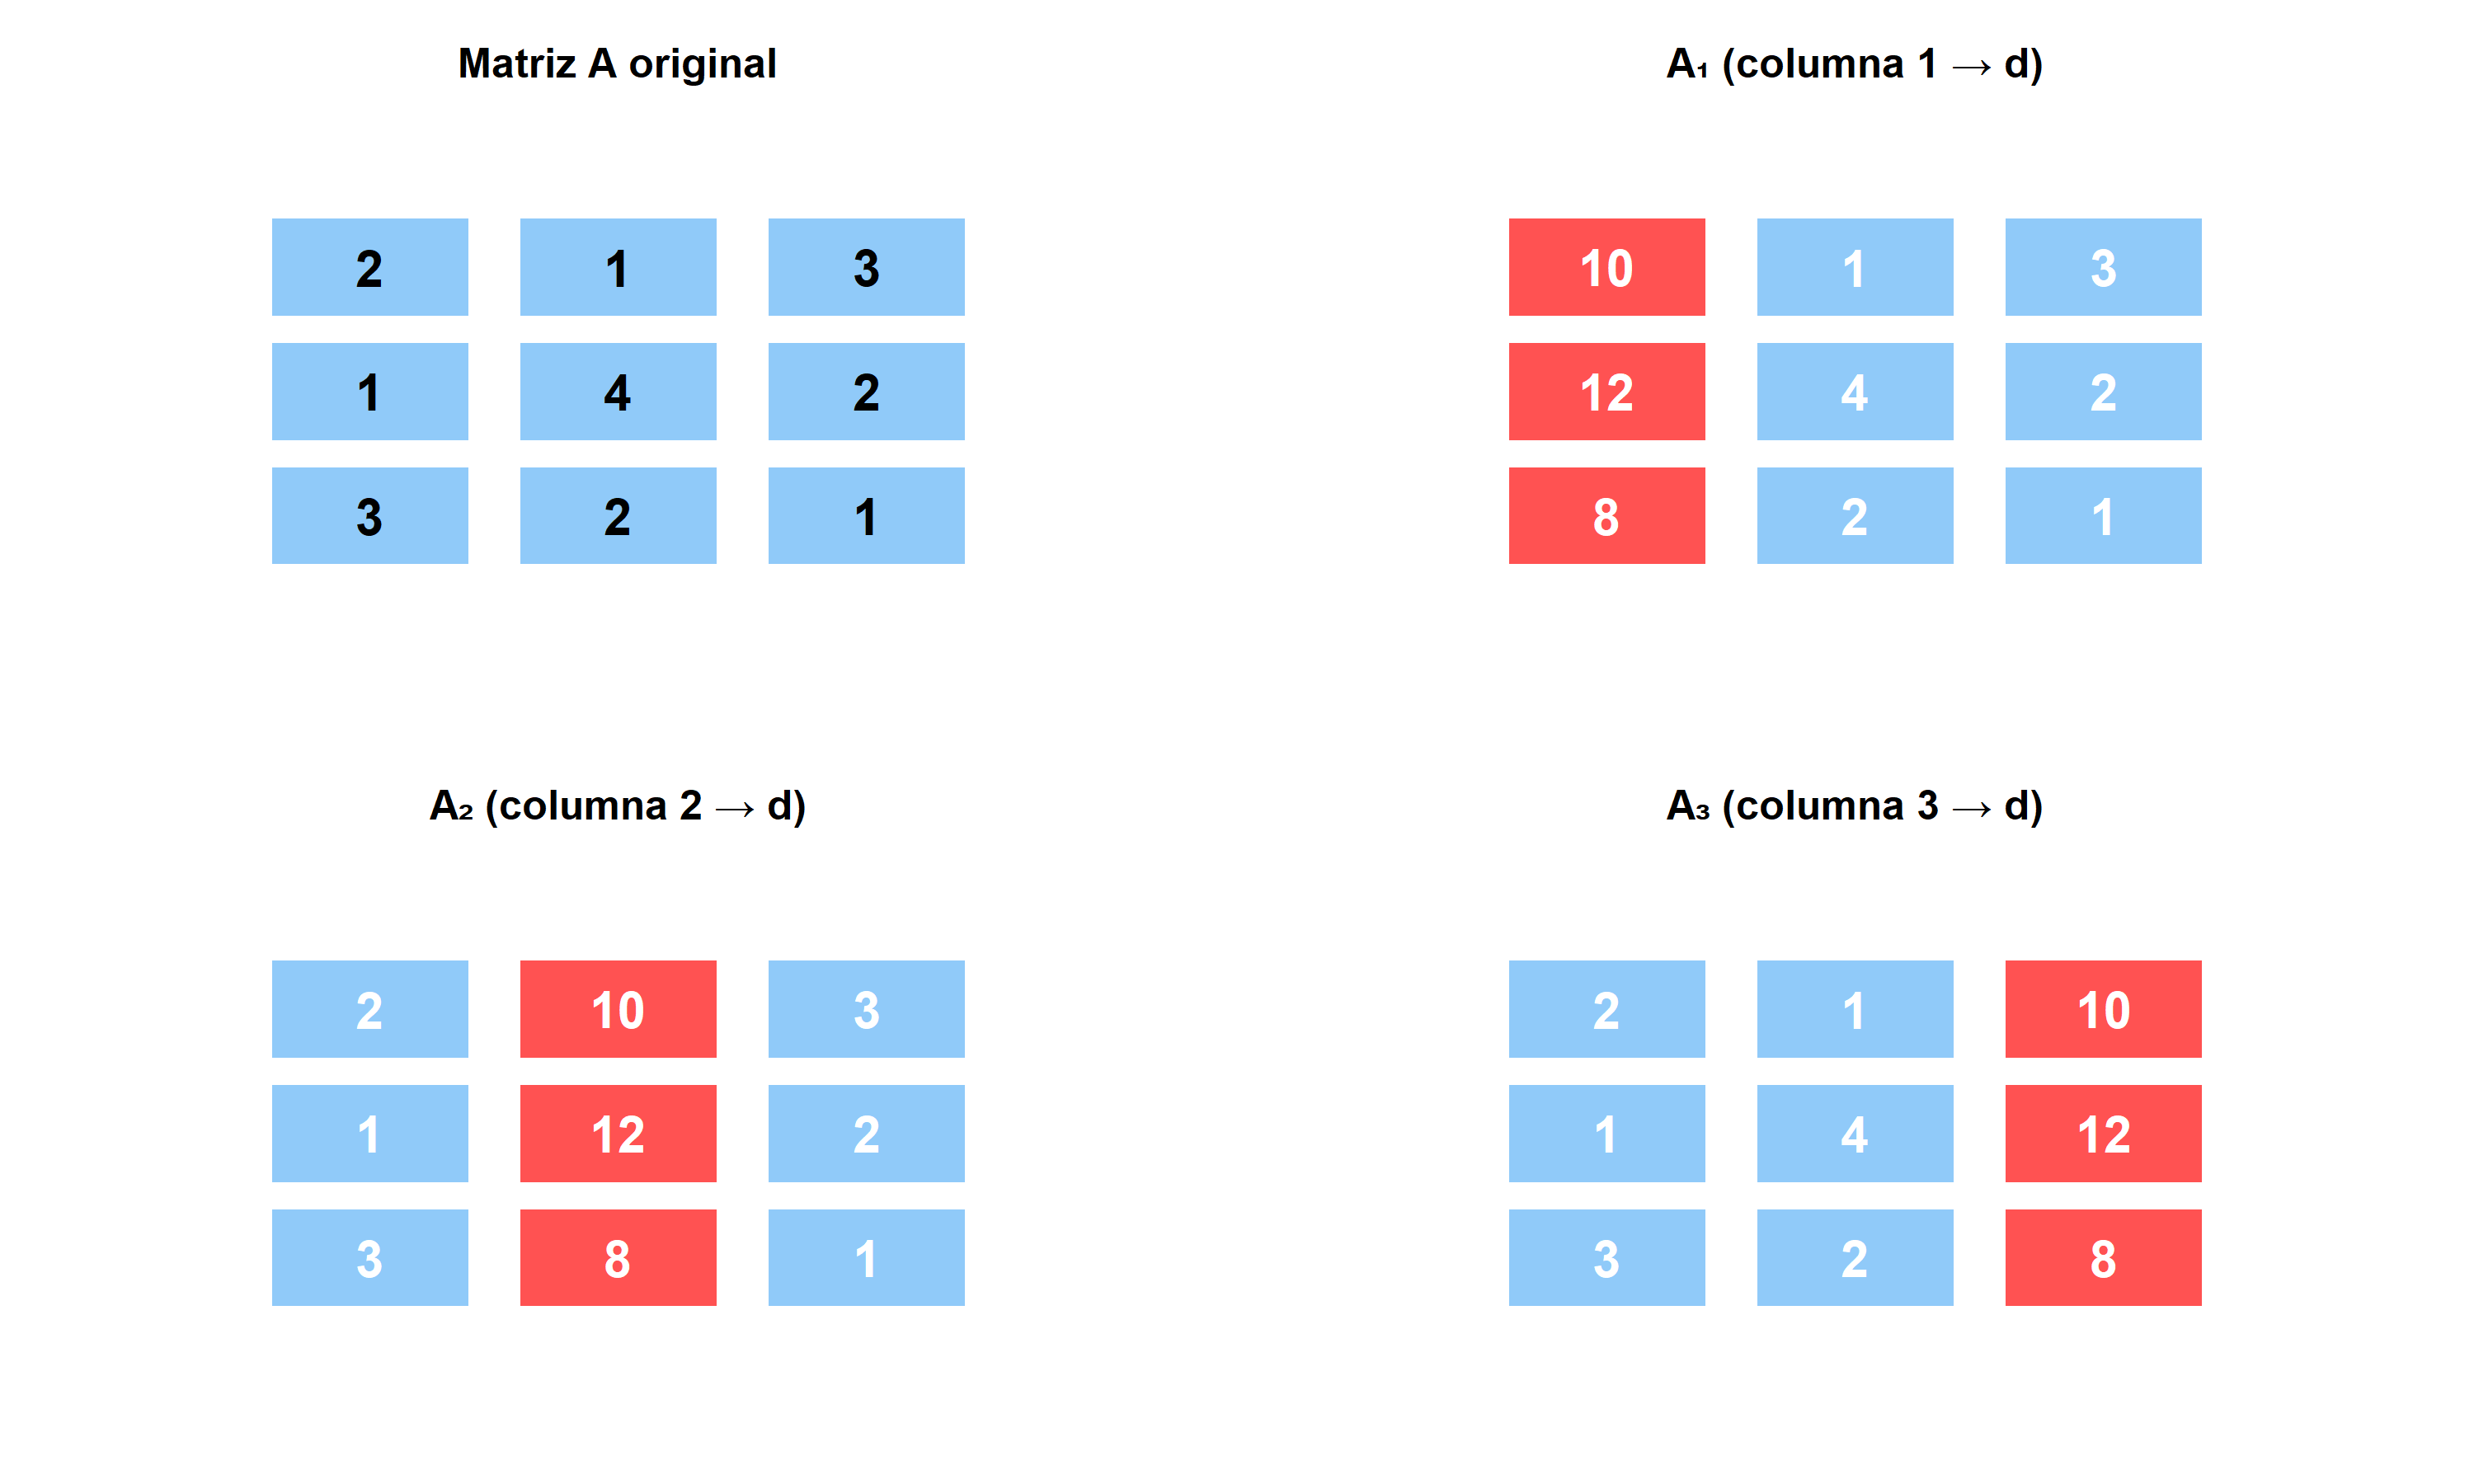

In [ ]:
# Visualización de la sustitución de columnas
A_ejemplo <- matrix(c(2, 1, 3,
                      1, 4, 2,
                      3, 2, 1), 3, 3, byrow = TRUE)
d_ejemplo <- c(10, 12, 8)

cat("Sistema Ax = d:\n")

```` markdown
---
title: "Capítulo 5: Álgebra de Matrices y Modelos Lineales"
subtitle: "Fundamentos Matemáticos para el Análisis Económico Cuantitativo"
author: "Emanuel Quintana Silva"
affiliation: "Universidad Pedagógica y Tecnológica de Colombia (UPTC)"
date: today
format:
  html:
    toc: true
    toc-depth: 4
    toc-location: left
    number-sections: true
    number-depth: 4
    code-fold: show
    code-tools: true
    code-line-numbers: true
    code-copy: true
    fig-align: center
    fig-cap-location: bottom
    tbl-cap-location: top
    theme: 
      light: cosmo
      dark: darkly
    css: styles.css
    smooth-scroll: true
    link-external-newwindow: true
    link-external-icon: true
    citations-hover: true
    footnotes-hover: true
    html-math-method: katex
  pdf:
    toc: true
    toc-depth: 3
    number-sections: true
    documentclass: article
    geometry: 
      - top=2.5cm
      - bottom=2.5cm
      - left=3cm
      - right=3cm
    fontsize: 11pt
    pdf-engine: xelatex
    fig-pos: 'H'
    include-in-header:
      text: |
        \usepackage{amsmath}
        \usepackage{amsthm}
        \usepackage{amssymb}
        \usepackage{bbm}
        \usepackage{mathtools}
        \usepackage{bm}
        \usepackage{float}
        \usepackage{booktabs}
        \usepackage{longtable}
        \usepackage{array}
        \usepackage{multirow}
        \usepackage{wrapfig}
        \usepackage{colortbl}
        \usepackage{pdflscape}
        \usepackage{tabu}
        \usepackage{threeparttable}
        \usepackage{threeparttablex}
        \usepackage[normalem]{ulem}
        \usepackage{makecell}
        \usepackage{xcolor}
  docx:
    toc: true
    number-sections: true
    highlight-style: github
execute:
  echo: true
  warning: false
  message: false
  cache: false
  freeze: auto
  keep-ipynb: true
bibliography: referencias.bib
csl: apa.csl
lang: es
---

```{r setup, include=FALSE}
# Configuración global de chunks
knitr::opts_chunk$set(
  echo = TRUE,
  warning = FALSE,
  message = FALSE,
  fig.width = 10,
  fig.height = 6,
  fig.align = 'center',
  out.width = '100%',
  dpi = 300,
  cache = FALSE
)

# Configuración de opciones de R
options(
  scipen = 999,
  digits = 4,
  knitr.kable.NA = '',
  width = 120
)
```

```{r libraries, include=FALSE}
# Cargar librerías necesarias
library(tidyverse)      # Manipulación de datos
library(Matrix)         # Operaciones matriciales avanzadas
library(MASS)           # Funciones matemáticas
library(pracma)         # Matemáticas prácticas
library(matlib)         # Álgebra lineal visual
library(knitr)          # Tablas
library(kableExtra)     # Tablas mejoradas
library(plotly)         # Gráficos interactivos
library(ggplot2)        # Visualización
library(patchwork)      # Composición de gráficos
library(latex2exp)      # LaTeX en gráficos
library(viridis)        # Paletas de colores
library(DT)             # Tablas interactivas
library(rgl)            # Gráficos 3D
library(plot3D)         # Gráficos 3D alternativos
```

# Introducción {#sec-intro}

## Contexto y Motivación

El álgebra de matrices constituye uno de los pilares fundamentales del análisis económico cuantitativo moderno. Este capítulo representa una extensión natural del estudio de sistemas de ecuaciones lineales, proporcionando herramientas analíticas robustas para:

::: {.callout-note icon=true}
## Objetivos de Aprendizaje

1. **Determinar la existencia y unicidad** de soluciones en sistemas económicos
2. **Dominar métodos analíticos** para la resolución mediante álgebra matricial
3. **Aplicar técnicas matriciales** a modelos económicos fundamentales
4. **Desarrollar intuición geométrica** sobre transformaciones lineales
:::

## Estructura del Capítulo

quarto-executable-code-5450563D

```mermaid
%%| fig-cap: "Estructura conceptual del capítulo"
%%| fig-width: 100%

graph TB
    A[Álgebra de Matrices] --> B[No Singularidad]
    A --> C[Determinantes]
    A --> D[Inversión]
    A --> E[Aplicaciones]
    
    B --> B1[Condiciones Necesarias]
    B --> B2[Condiciones Suficientes]
    B --> B3[Rango]
    
    C --> C1[Evaluación]
    C --> C2[Propiedades]
    C --> C3[Expansión Laplace]
    
    D --> D1[Matriz Adjunta]
    D --> D2[Métodos Computacionales]
    D --> D3[Propiedades]
    
    E --> E1[Modelos de Mercado]
    E --> E2[Ingreso Nacional]
    E --> E3[Leontief]
    
    style A fill:#e1f5ff,stroke:#01579b,stroke-width:3px
    style E fill:#fff3e0,stroke:#e65100,stroke-width:2px
```

## Importancia Histórica

::: {.callout-tip icon=true collapse="true"}
## Nota Histórica: Desarrollo del Álgebra Lineal

El desarrollo del álgebra de matrices tiene raíces profundas en la historia de las matemáticas:

- **Gottfried Leibniz (1646-1716)**: Propuso la notación de subíndices $a_{ij}$ que utilizamos hoy
- **Carl Friedrich Gauss (1777-1855)**: Desarrolló el método de eliminación que lleva su nombre
- **Arthur Cayley (1821-1895)**: Formalizó la teoría de matrices como objetos matemáticos
- **Lewis Carroll (Charles Dodgson)**: Autor de *Alicia en el País de las Maravillas*, también escribió sobre determinantes
- **Wassily Leontief (1905-1999)**: Premio Nobel 1973 por el modelo input-output
:::

# Condiciones de No Singularidad {#sec-nosingularidad}

## Definición Fundamental

::: {.callout-important icon=true}
## Definición: Matriz No Singular

Una matriz cuadrada $A$ de orden $n \times n$ se denomina **no singular** si y solo si existe otra matriz $B$ tal que:

$$
AB = BA = I_n
$$

donde $I_n$ es la matriz identidad de orden $n$.

**Equivalentemente**, $A$ es no singular si posee una **matriz inversa única** $A^{-1}$.
:::

```{r nosingular-demo}
# Demostración con matrices reales
set.seed(42)

# Matriz no singular (invertible)
A_nonsing <- matrix(c(4, 7, 2, 6), nrow = 2, byrow = TRUE)
A_inv <- solve(A_nonsing)

# Verificación: A * A^(-1) = I
producto <- A_nonsing %*% A_inv

cat("Matriz A (no singular):\n")
print(A_nonsing)
cat("\nMatriz inversa A^(-1):\n")
print(A_inv)
cat("\nProducto A * A^(-1) (debe ser I):\n")
print(round(producto, 10))
cat("\nDeterminante de A:", det(A_nonsing), "\n")

# Matriz singular (no invertible)
A_sing <- matrix(c(2, 4, 1, 2), nrow = 2, byrow = TRUE)
cat("\n--- Matriz Singular ---\n")
cat("Matriz B (singular):\n")
print(A_sing)
cat("Determinante de B:", det(A_sing), "\n")
cat("Rango de B:", Matrix::rankMatrix(A_sing)[1], "\n")

# Intentar invertir causaría error
# solve(A_sing)  # ERROR: sistema computacionalmente singular
```

## Implicaciones para Sistemas Lineales

Para un sistema de ecuaciones lineales $Ax = d$:

$$
\begin{cases}
a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = d_1 \\
a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n = d_2 \\
\vdots \\
a_{n1}x_1 + a_{n2}x_2 + \cdots + a_{nn}x_n = d_n
\end{cases}
$$

::: {.panel-tabset}

### Caso No Singular

Si $|A| \neq 0$ (matriz no singular):

- **Solución única**: $x^* = A^{-1}d$
- **Interpretación geométrica**: Los $n$ hiperplanos se intersectan en un único punto
- **Aplicabilidad**: Regla de Cramer, inversión directa

### Caso Singular

Si $|A| = 0$ (matriz singular):

- **Sin solución única**: Infinitas soluciones o ninguna
- **Dependencia lineal**: Al menos una ecuación es redundante o contradictoria
- **Rango deficiente**: $r(A) < n$

:::

## Condición Necesaria: Cuadratura {#sec-cuadratura}

::: {.callout-warning icon=true}
## Teorema: Condición Necesaria

Para que una matriz pueda ser no singular, es **indispensable** que sea **cuadrada**, es decir:

$$
\text{número de renglones} = \text{número de columnas}
$$

**Notación**: Una matriz de dimensión $m \times n$ donde $m = n$.
:::

```{r cuadratura-visual}
# Visualización de matrices cuadradas vs rectangulares
library(ggplot2)

crear_matriz_visual <- function(filas, cols, titulo, color) {
  expand.grid(x = 1:cols, y = 1:filas) %>%
    ggplot(aes(x = x, y = -y)) +
    geom_tile(fill = color, color = "white", linewidth = 2) +
    geom_text(aes(label = sprintf("a_%d%d", y, x)), 
              size = 3, color = "white", fontface = "bold") +
    coord_equal() +
    theme_void() +
    labs(title = titulo) +
    theme(
      plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
      plot.background = element_rect(fill = "white", color = NA)
    )
}

p1 <- crear_matriz_visual(3, 3, "Matriz Cuadrada 3×3\n(Puede ser no singular)", "#2E7D32")
p2 <- crear_matriz_visual(2, 4, "Matriz Rectangular 2×4\n(Siempre singular)", "#C62828")
p3 <- crear_matriz_visual(4, 2, "Matriz Rectangular 4×2\n(Siempre singular)", "#C62828")

library(patchwork)
p1 | (p2 / p3)
```

**Importante**: Ser cuadrada es necesario pero **NO suficiente**. Una matriz puede ser cuadrada y aún así ser singular si sus renglones son linealmente dependientes.

```{r ejemplo-cuadrada-singular}
# Definición de la función personalizada
det_laplace <- function(M, verbose = FALSE) {
  n <- nrow(M)
  if (n == 1) return(M[1, 1])
  if (n == 2) return(M[1, 1] * M[2, 2] - M[1, 2] * M[2, 1])
  
  det_val <- 0
  for (j in 1:n) {
    menor <- M[-1, -j, drop = FALSE] # Submatriz eliminando fila 1 y columna j
    cofactor <- (-1)^(1 + j) * det_laplace(menor)
    if (verbose) {
      cat(sprintf("Elemento a[1,%d] = %d | Cofactor = %d\n", j, M[1, j], cofactor))
    }
    det_val <- det_val + M[1, j] * cofactor
  }
  return(det_val)
}

# Ahora puedes ejecutar tu código original
A <- matrix(c(2, 1, 3, 4, 0, 2, 1, 3, 1), 3, 3, byrow = TRUE)
cat("Matriz A (3x3):\n")
print(A)
cat("\n=== CÁLCULO DETALLADO ===\n")
det_resultado <- det_laplace(A, verbose = TRUE)
cat(sprintf("\nVerificación con R: %.4f\n", det(A)))
cat(sprintf("Diferencia: %.10f\n", abs(det_resultado - det(A))))

```

### Estrategia Óptima: Elegir Renglón/Columna con Más Ceros

```{r laplace-estrategias}
# Matriz con muchos ceros estratégicos
B <- matrix(c(
  1, 2, 0, 9,
  2, 3, 4, 6,
  1, 6, 0, -1,
  0, -5, 0, 8
), 4, 4, byrow = TRUE)

cat("Matriz B (4×4):\n")
print(B)

# Contar ceros por renglón y columna
ceros_renglones <- apply(B, 1, function(x) sum(x == 0))
ceros_columnas <- apply(B, 2, function(x) sum(x == 0))

cat("\nCeros por renglón:", ceros_renglones, "\n")
cat("Ceros por columna:", ceros_columnas, "\n")

cat(sprintf("\nMejor opción: Columna 3 (tiene %d ceros)\n", ceros_columnas[3]))
cat("Esto reduce el cálculo de 4 cofactores a solo 1\n")

# Expansión por columna 3
cat("\nExpansión por columna 3:\n")
j <- 3
det_B <- 0
for (i in 1:4) {
  if (B[i, j] != 0) {
    menor <- B[-i, -j, drop = FALSE]
    signo <- (-1)^(i + j)
    cofactor <- signo * det(menor)
    termino <- B[i, j] * cofactor
    det_B <- det_B + termino
    
    cat(sprintf("  a_%d%d × C_%d%d = %d × (%d × %.0f) = %.0f\n", 
                i, j, i, j, B[i,j], signo, det(menor), termino))
  }
}

cat(sprintf("\n|B| = %.0f\n", det_B))
cat(sprintf("Verificación: %.0f\n", det(B)))
```

### Matriz de Cofactores Completa

```{r matriz-cofactor}
# Función para calcular matriz de cofactores
matriz_cofactores <- function(M) {
  n <- nrow(M)
  C <- matrix(0, n, n)
  
  for (i in 1:n) {
    for (j in 1:n) {
      menor <- M[-i, -j, drop = FALSE]
      signo <- (-1)^(i + j)
      C[i, j] <- signo * det(menor)
    }
  }
  
  return(C)
}

A <- matrix(c(2, 1, 3,
              4, 0, 2,
              1, 3, 1), 3, 3, byrow = TRUE)

cat("Matriz A:\n")
print(A)

C <- matriz_cofactores(A)
cat("\nMatriz de Cofactores C:\n")
print(C)

# Verificar expansión por cualquier renglón
cat("\n=== VERIFICACIÓN: Expansión por cada renglón ===\n")
for (i in 1:3) {
  suma <- sum(A[i,] * C[i,])
  cat(sprintf("Renglón %d: Σ a_%dj × C_%dj = %.4f\n", i, i, i, suma))
}

cat("\n=== Expansión por cofactores AJENOS (debe dar 0) ===\n")
for (i in 1:2) {
  for (k in (i+1):3) {
    suma_ajena <- sum(A[i,] * C[k,])
    cat(sprintf("R%d × Cofactores R%d: %.10f\n", i, k, suma_ajena))
  }
}
```

## Inversión de Matrices {#sec-inversions}

### Definición y Existencia

::: {.callout-important icon=true}
## Teorema Fundamental de la Inversión

Una matriz cuadrada $A$ tiene una inversa **única** $A^{-1}$ si y solo si:

$
|A| \neq 0 \quad \text{(matriz no singular)}
$

La inversa satisface:
$
AA^{-1} = A^{-1}A = I
$

Y se calcula mediante:
$
A^{-1} = \frac{1}{|A|} \text{adj}(A)
$

donde $\text{adj}(A)$ es la **matriz adjunta** (transpuesta de la matriz de cofactores).
:::

### Propiedades de la Matriz Inversa

```{r propiedades-inversa-tabla}
prop_inv <- data.frame(
  Propiedad = c(
    "Unicidad",
    "Inversa de la inversa",
    "Inversa del producto",
    "Inversa de la transpuesta",
    "Determinante de la inversa",
    "Inversa de matriz escalar",
    "Inversa es no singular"
  ),
  Fórmula = c(
    "Si AB = BA = I entonces B = A⁻¹",
    "(A⁻¹)⁻¹ = A",
    "(AB)⁻¹ = B⁻¹A⁻¹",
    "(A')⁻¹ = (A⁻¹)'",
    "|A⁻¹| = 1/|A|",
    "(kA)⁻¹ = (1/k)A⁻¹",
    "|A⁻¹| ≠ 0"
  ),
  Interpretación = c(
    "La inversa es única si existe",
    "Invertir dos veces regresa al original",
    "Orden inverso (como calcetines y zapatos)",
    "Transponer e invertir conmutan",
    "El determinante se invierte",
    "Escalar se puede factorizar",
    "La inversa también es invertible"
  ),
  stringsAsFactors = FALSE
)

kable(prop_inv, 
      align = "llc",
      caption = "Propiedades Algebraicas de la Matriz Inversa") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"),
                full_width = TRUE) %>%
  column_spec(1, bold = TRUE, width = "15em") %>%
  column_spec(2, monospace = TRUE, background = "#E3F2FD", width = "15em") %>%
  column_spec(3, width = "25em") %>%
  row_spec(0, bold = TRUE, color = "white", background = "#0277BD")
```

### Método de la Adjunta (Cofactores)

**Pasos del algoritmo**:

1. Calcular $|A|$ (si es 0, no hay inversa)
2. Construir matriz de cofactores $C$
3. Transponer para obtener adjunta: $\text{adj}(A) = C'$
4. Dividir: $A^{-1} = \frac{1}{|A|} \text{adj}(A)$

```{r inversion-adjunta}
# Implementación completa del método de la adjunta
invertir_por_adjunta <- function(M, verbose = TRUE) {
  n <- nrow(M)
  
  # Paso 1: Determinante
  det_M <- det(M)
  if (verbose) {
    cat("=== INVERSIÓN POR MÉTODO DE LA ADJUNTA ===\n\n")
    cat("Matriz original A:\n")
    print(M)
    cat(sprintf("\nPaso 1: |A| = %.4f\n", det_M))
  }
  
  if (abs(det_M) < 1e-10) {
    cat("\n✗ MATRIZ SINGULAR (|A| = 0)\n")
    cat("No existe inversa.\n")
    return(NULL)
  }
  
  # Paso 2: Matriz de cofactores
  C <- matriz_cofactores(M)
  if (verbose) {
    cat("\nPaso 2: Matriz de cofactores C:\n")
    print(round(C, 4))
  }
  
  # Paso 3: Adjunta (transpuesta de cofactores)
  adj_M <- t(C)
  if (verbose) {
    cat("\nPaso 3: Matriz adjunta adj(A) = C':\n")
    print(round(adj_M, 4))
  }
  
  # Paso 4: Inversa
  inv_M <- (1/det_M) * adj_M
  if (verbose) {
    cat(sprintf("\nPaso 4: A⁻¹ = (1/|A|) × adj(A) = (1/%.4f) × adj(A)\n", det_M))
    cat("\nMatriz inversa A⁻¹:\n")
    print(round(inv_M, 6))
  }
  
  # Verificación
  if (verbose) {
    cat("\n=== VERIFICACIÓN ===\n")
    producto <- M %*% inv_M
    cat("A × A⁻¹ (debe ser I):\n")
    print(round(producto, 10))
    
    error <- max(abs(producto - diag(n)))
    cat(sprintf("\nError máximo: %.2e\n", error))
  }
  
  return(inv_M)
}

# Ejemplo 2×2
A2 <- matrix(c(4, 7, 2, 6), 2, 2, byrow = TRUE)
inv_A2 <- invertir_por_adjunta(A2)

cat("\n" , rep("=", 60), "\n\n", sep="")

# Ejemplo 3×3
A3 <- matrix(c(1, 2, 3,
               0, 1, 4,
               5, 6, 0), 3, 3, byrow = TRUE)
inv_A3 <- invertir_por_adjunta(A3)
```

### Regla Simplificada para Matrices 2×2

Para matrices $2 \times 2$ existe un **atajo**:

$
\begin{bmatrix} a & b \\ c & d \end{bmatrix}^{-1} = 
\frac{1}{ad - bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$

**Pasos**:
1. Intercambiar elementos de la diagonal principal
2. Cambiar signo a elementos fuera de la diagonal
3. Dividir entre el determinante

```{r regla-2x2}
# Función optimizada para 2×2
invertir_2x2 <- function(M) {
  if (nrow(M) != 2 || ncol(M) != 2) {
    stop("Solo para matrices 2×2")
  }
  
  a <- M[1,1]; b <- M[1,2]; c <- M[2,1]; d <- M[2,2]
  det_M <- a*d - b*c
  
  cat("Matriz A:\n")
  print(M)
  cat(sprintf("\n|A| = %d×%d - %d×%d = %d\n", a, d, b, c, det_M))
  
  if (abs(det_M) < 1e-10) {
    cat("Matriz singular, no existe inversa.\n")
    return(NULL)
  }
  
  # Aplicar regla
  inv_M <- (1/det_M) * matrix(c(d, -c, -b, a), 2, 2, byrow = TRUE)
  
  cat("\nPasos:\n")
  cat(sprintf("  1. Intercambiar diagonal: [%d %d; %d %d] → [%d %d; %d %d]\n",
              a, b, c, d, d, b, c, a))
  cat(sprintf("  2. Cambiar signos fuera diagonal: [%d %d; %d %d]\n",
              d, -b, -c, a))
  cat(sprintf("  3. Dividir entre |A| = %d\n", det_M))
  
  cat("\nA⁻¹ =\n")
  print(round(inv_M, 4))
  
  return(inv_M)
}

# Ejemplos
ejemplos <- list(
  matrix(c(3, 5, 2, 4), 2, 2, byrow = TRUE),
  matrix(c(1, -2, 3, 4), 2, 2, byrow = TRUE)
)

for (i in seq_along(ejemplos)) {
  cat(sprintf("\n=== EJEMPLO %d ===\n", i))
  invertir_2x2(ejemplos[[i]])
  cat("\n")
}
```

### Método de Gauss-Jordan

Una alternativa computacionalmente más eficiente es el **método de eliminación de Gauss-Jordan**:

**Procedimiento**:
1. Formar matriz aumentada $[A | I]$
2. Mediante operaciones elementales de renglón, transformar $A$ en $I$
3. El resultado es $[I | A^{-1}]$

```{r gauss-jordan}
# Implementación del método de Gauss-Jordan
gauss_jordan_inversa <- function(M, verbose = TRUE) {
  n <- nrow(M)
  
  # Crear matriz aumentada [A | I]
  aug <- cbind(M, diag(n))
  
  if (verbose) {
    cat("=== MÉTODO DE GAUSS-JORDAN ===\n\n")
    cat("Matriz aumentada inicial [A | I]:\n")
    print(aug)
    cat("\n")
  }
  
  # Eliminación hacia adelante y hacia atrás
  for (i in 1:n) {
    # Buscar pivote
    if (abs(aug[i, i]) < 1e-10) {
      # Buscar renglón con elemento no cero
      for (k in (i+1):n) {
        if (k <= n && abs(aug[k, i]) > 1e-10) {
          # Intercambiar renglones
          temp <- aug[i, ]
          aug[i, ] <- aug[k, ]
          aug[k, ] <- temp
          if (verbose) cat(sprintf("Intercambiar R%d ↔ R%d\n", i, k))
          break
        }
      }
    }
    
    # Normalizar renglón pivote
    pivote <- aug[i, i]
    if (abs(pivote) < 1e-10) {
      cat("\n✗ MATRIZ SINGULAR\n")
      return(NULL)
    }
    
    aug[i, ] <- aug[i, ] / pivote
    if (verbose && abs(pivote - 1) > 1e-10) {
      cat(sprintf("R%d ← R%d / %.4f\n", i, i, pivote))
    }
    
    # Eliminar columna en otros renglones
    for (j in 1:n) {
      if (j != i && abs(aug[j, i]) > 1e-10) {
        factor <- aug[j, i]
        aug[j, ] <- aug[j, ] - factor * aug[i, ]
        if (verbose) {
          cat(sprintf("R%d ← R%d - %.4f×R%d\n", j, j, factor, i))
        }
      }
    }
    
    if (verbose) {
      cat("\nMatriz después del paso", i, ":\n")
      print(round(aug, 4))
      cat("\n")
    }
  }
  
  # Extraer inversa (lado derecho)
  inv_M <- aug[, (n+1):(2*n)]
  
  if (verbose) {
    cat("=== RESULTADO ===\n")
    cat("Matriz inversa A⁻¹:\n")
    print(round(inv_M, 6))
    
    # Verificación
    cat("\nVerificación A × A⁻¹:\n")
    print(round(M %*% inv_M, 10))
  }
  
  return(inv_M)
}

# Ejemplo
A <- matrix(c(2, 1, 1,
              1, 3, 2,
              1, 0, 0), 3, 3, byrow = TRUE)

inv_gj <- gauss_jordan_inversa(A, verbose = TRUE)
```

### Comparación de Métodos

```{r comparacion-metodos-inversion}
library(microbenchmark)

# Generar matrices de prueba de diferentes tamaños
tamaños <- c(3, 5, 10, 20)
resultados_tiempo <- data.frame()

for (n in tamaños) {
  set.seed(42)
  M <- matrix(rnorm(n*n), n, n)
  
  # Asegurar que sea invertible
  while (abs(det(M)) < 0.1) {
    M <- matrix(rnorm(n*n), n, n)
  }
  
  # Benchmark
  tiempos <- microbenchmark(
    R_solve = solve(M),
    Adjunta = {
      C <- matriz_cofactores(M)
      (1/det(M)) * t(C)
    },
    GaussJordan = gauss_jordan_inversa(M, verbose = FALSE),
    times = 20,
    unit = "ms"
  )
  
  # Resumir
  resumen <- summary(tiempos)
  for (metodo in c("R_solve", "Adjunta", "GaussJordan")) {
    resultados_tiempo <- rbind(resultados_tiempo, data.frame(
      Tamaño = paste0(n, "×", n),
      Método = metodo,
      Tiempo_Medio_ms = resumen[resumen$expr == metodo, "mean"],
      stringsAsFactors = FALSE
    ))
  }
}

# Tabla de resultados
kable(resultados_tiempo, 
      digits = 3,
      align = "llr",
      caption = "Comparación de Tiempos de Ejecución (milisegundos)") %>%
  kable_styling(bootstrap_options = c("striped", "hover"), 
                full_width = FALSE) %>%
  column_spec(1, bold = TRUE) %>%
  column_spec(3, color = spec_color(resultados_tiempo$Tiempo_Medio_ms, 
                                     begin = 0.3, end = 0.9,
                                     option = "plasma", direction = -1))

# Gráfico comparativo
ggplot(resultados_tiempo, aes(x = Tamaño, y = Tiempo_Medio_ms, 
                               fill = Método, group = Método)) +
  geom_col(position = "dodge") +
  scale_fill_viridis_d(option = "magma", begin = 0.3, end = 0.9) +
  labs(title = "Eficiencia Computacional: Métodos de Inversión",
       subtitle = "Tiempo promedio en milisegundos (20 repeticiones)",
       x = "Dimensión de la Matriz",
       y = "Tiempo (ms)") +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "bottom"
  )
```

::: {.callout-tip icon=true}
## Recomendaciones Prácticas

- **Matrices pequeñas (≤3×3)**: Método de la adjunta (didáctico)
- **Matrices medianas (4×10)**: Gauss-Jordan (balance eficiencia/claridad)
- **Matrices grandes (>10)**: `solve()` en R (optimizado, usa LAPACK)
- **Matrices especiales** (diagonales, triangulares): Métodos especializados
:::

# Regla de Cramer {#sec-cramers}

## Fundamento Teórico

::: {.callout-note icon=true}
## Teorema: Regla de Cramer

Para un sistema de ecuaciones lineales $Ax = d$ con $|A| \neq 0$, la solución para cada variable $x_j$ es:

$
x_j = \frac{|A_j|}{|A|}
$

donde $A_j$ es la matriz obtenida al **reemplazar la $j$-ésima columna de $A$ por el vector $d$**.
:::

### Derivación desde la Matriz Inversa

La regla de Cramer se deriva de la solución general $x = A^{-1}d$:

$
x = A^{-1}d = \frac{1}{|A|} (\text{adj } A) d
$

El elemento $j$ del vector solución es:

$
x_j = \frac{1}{|A|} \sum_{i=1}^{n} d_i |C_{ij}| = \frac{|A_j|}{|A|}
$

```{r cramer-derivacion-visual}
# Visualización de la sustitución de columnas
A_ejemplo <- matrix(c(2, 1, 3,
                      1, 4, 2,
                      3, 2, 1), 3, 3, byrow = TRUE)
d_ejemplo <- c(10, 12, 8)

cat("Sistema Ax = d:\n")
print(cbind(A_ejemplo, d_ejemplo))

cat("\n=== CONSTRUCCIÓN DE MATRICES A_j ===\n\n")

par(mfrow = c(2, 2), mar = c(2, 2, 3, 2))

# Matriz original
plot(1, type = "n", xlim = c(0, 4), ylim = c(0, 4), 
     xlab = "", ylab = "", axes = FALSE, main = "Matriz A original")
for (i in 1:3) {
  for (j in 1:3) {
    rect(j-0.4, 4-i-0.4, j+0.4, 4-i+0.4, col = "#90CAF9", border = "white")
    text(j, 4-i, A_ejemplo[i,j], cex = 1.5, font = 2)
  }
}

# A1 (reemplazar columna 1)
plot(1, type = "n", xlim = c(0, 4), ylim = c(0, 4), 
     xlab = "", ylab = "", axes = FALSE, main = "A₁ (columna 1 → d)")
for (i in 1:3) {
  for (j in 1:3) {
    color <- ifelse(j == 1, "#FF5252", "#90CAF9")
    valor <- ifelse(j == 1, d_ejemplo[i], A_ejemplo[i,j])
    rect(j-0.4, 4-i-0.4, j+0.4, 4-i+0.4, col = color, border = "white")
    text(j, 4-i, valor, cex = 1.5, font = 2, col = "white")
  }
}

# A2 (reemplazar columna 2)
plot(1, type = "n", xlim = c(0, 4), ylim = c(0, 4), 
     xlab = "", ylab = "", axes = FALSE, main = "A₂ (columna 2 → d)")
for (i in 1:3) {
  for (j in 1:3) {
    color <- ifelse(j == 2, "#FF5252", "#90CAF9")
    valor <- ifelse(j == 2, d_ejemplo[i], A_ejemplo[i,j])
    rect(j-0.4, 4-i-0.4, j+0.4, 4-i+0.4, col = color, border = "white")
    text(j, 4-i, valor, cex = 1.5, font = 2, col = "white")
  }
}

# A3 (reemplazar columna 3)
plot(1, type = "n", xlim = c(0, 4), ylim = c(0, 4), 
     xlab = "", ylab = "", axes = FALSE, main = "A₃ (columna 3 → d)")
for (i in 1:3) {
  for (j in 1:3) {
    color <- ifelse(j == 3, "#FF5252", "#90CAF9")
    valor <- ifelse(j == 3, d_ejemplo[i], A_ejemplo[i,j])
    rect(j-0.4, 4-i-0.4, j+0.4, 4-i+0.4, col = color, border = "white")
    text(j, 4-i, valor, cex = 1.5, font = 2, col = "white")
  }
}

par(mfrow = c(1, 1))
```

## Implementación y Ejemplos

```{r cramer-implementacion}
# Función para resolver por Regla de Cramer
resolver_cramer <- function(A, d, verbose = TRUE) {
  n <- nrow(A)
  
  # Verificar no singularidad
  det_A <- det(A)
  
  if (verbose) {
    cat("=== REGLA DE CRAMER ===\n\n")
    cat("Sistema Ax = d:\n")
    print(cbind(A, d))
    cat(sprintf("\n|A| = %.4f\n", det_A))
  }
  
  if (abs(det_A) < 1e-10) {
    cat("\n✗ MATRIZ SINGULAR (|A| = 0)\n")
    cat("La Regla de Cramer no es aplicable.\n")
    return(NULL)
  }
  
  # Calcular cada x_j
  x <- numeric(n)
  
  if (verbose) cat("\n=== CÁLCULO DE VARIABLES ===\n")
  
  for (j in 1:n) {
    # Crear A_j reemplazando columna j por d
    A_j <- A
    A_j[, j] <- d
    det_A_j <- det(A_j)
    
    x[j] <- det_A_j / det_A
    
    if (verbose) {
      cat(sprintf("\nx_%d:\n", j))
      cat("Matriz A_", j, ":\n", sep = "")
      print(A_j)
      cat(sprintf("|A_%d| = %.4f\n", j, det_A_j))
      cat(sprintf("x_%d = |A_%d|/|A| = %.4f / %.4f = %.4f\n", 
                  j, j, det_A_j, det_A, x[j]))
    }
  }
  
  if (verbose) {
    cat("\n=== SOLUCIÓN ===\n")
    cat("Vector x* =", sprintf("(%.4f, %.4f, %.4f)\n", x[1], x[2], x[3]))
    
    # Verificación
    cat("\nVerificación Ax* = d:\n")
    residuo <- A %*% x
    print(data.frame(
      "d_calculado" = round(residuo, 6),
      "d_original" = d,
      "diferencia" = round(residuo - d, 10)
    ))
  }
  
  return(x)
}

# Ejemplo 1: Sistema 3×3
A1 <- matrix(c(2, 1, 3,
               1, 4, 2,
               3, 2, 1), 3, 3, byrow = TRUE)
d1 <- c(10, 12, 8)

sol1 <- resolver_cramer(A1, d1)

cat("\n", rep("=", 70), "\n\n", sep = "")

# Ejemplo 2: Problema económico
cat("=== EJEMPLO 2: MODELO DE MERCADO ===\n")
cat("Demanda: qd1 = 53 - 2p1 - 3p2\n")
cat("Oferta:  qs1 = -4 + 3p1\n")
cat("Demanda: qd2 = 64 - 3p1 - 4p2\n")
cat("Oferta:  qs2 = -8 + 2p2\n\n")

cat("En equilibrio: qd1 = qs1 y qd2 = qs2\n")
cat("Sistema resultante:\n")
cat("  5p1 + 3p2 = 57\n")
cat("  3p1 + 6p2 = 72\n\n")

A2 <- matrix(c(5, 3, 3, 6), 2, 2, byrow = TRUE)
d2 <- c(57, 72)

sol2 <- resolver_cramer(A2, d2, verbose = FALSE)

cat("Solución:\n")
cat(sprintf("  p1* = %.2f\n", sol2[1]))
cat(sprintf("  p2* = %.2f\n", sol2[2]))

# Calcular cantidades
q1 <- -4 + 3*sol2[1]
q2 <- -8 + 2*sol2[2]

cat(sprintf("\nCantidades de equilibrio:\n"))
cat(sprintf("  q1* = %.2f\n", q1))
cat(sprintf("  q2* = %.2f\n", q2))
```

## Sistemas Homogéneos

Para sistemas homogéneos $Ax = 0$:

::: {.callout-warning icon=true}
## Soluciones de Sistemas Homogéneos

- Si $|A| \neq 0$: **Solución trivial única** $x = 0$
- Si $|A| = 0$: **Infinitas soluciones** (espacio nulo no trivial)
:::

```{r sistema-homogeneo}
# 1. Definición de Matriz No Singular
# Se corrigió 'byrow:' por 'byrow = TRUE' y se eliminó el texto dentro de la función
A_ns <- matrix(c(2, 1, 1, 3), 2, 2, byrow = TRUE)

# 2. Definición de Matriz Cuadrada Singular
M_cuad_sing <- matrix(c(
  2, 4, 6,
  1, 2, 3,
  3, 6, 9
), nrow = 3, byrow = TRUE)

# Mostrar resultados
cat("Matriz cuadrada 3x3:\n")
print(M_cuad_sing)

cat("\nDeterminante:", det(M_cuad_sing), "\n")

# Para el rango, instalamos/cargamos 'Matrix' si es necesario
if(!require(Matrix)) install.packages("Matrix")
cat("Rango:", as.numeric(Matrix::rankMatrix(M_cuad_sing)), "\n")

cat("\nObservación: R2 = 0.5*R1 y R3 = 1.5*R1 (dependencia lineal)\n")

```

## Condición Suficiente: Independencia Lineal {#sec-independencia}

::: {.callout-important icon=true}
## Teorema: Condición Suficiente

Una vez cumplida la condición de cuadratura, la matriz $A$ es **no singular** si y solo si sus renglones (o equivalentemente, sus columnas) son **linealmente independientes**.
:::

### Definición de Independencia Lineal

Un conjunto de vectores $\{v_1, v_2, \ldots, v_n\}$ es **linealmente independiente** si la única solución a:

$$
c_1 v_1 + c_2 v_2 + \cdots + c_n v_n = 0
$$

es $c_1 = c_2 = \cdots = c_n = 0$.

**Interpretación**: Ningún vector puede expresarse como combinación lineal de los demás.

```{r independencia-demo}
# Función para verificar independencia lineal
verificar_independencia <- function(vectores_matriz, nombre = "A") {
  det_val <- det(vectores_matriz)
  rango <- Matrix::rankMatrix(vectores_matriz)[1]
  n <- nrow(vectores_matriz)
  
  cat(sprintf("\n=== Análisis de Independencia: Matriz %s ===\n", nombre))
  print(vectores_matriz)
  cat(sprintf("\nDeterminante: %.6f\n", det_val))
  cat(sprintf("Rango: %d (dimensión: %d)\n", rango, n))
  
  if (abs(det_val) > 1e-10 && rango == n) {
    cat("✓ VECTORES LINEALMENTE INDEPENDIENTES\n")
    cat("✓ Matriz NO SINGULAR\n")
    return(TRUE)
  } else {
    cat("✗ VECTORES LINEALMENTE DEPENDIENTES\n")
    cat("✗ Matriz SINGULAR\n")
    
    # Intentar encontrar relación de dependencia
    if (n == 2) {
      ratio <- vectores_matriz[2,] / vectores_matriz[1,]
      if (length(unique(round(ratio, 6))) == 1) {
        cat(sprintf("  Relación: v2 = %.3f * v1\n", ratio[1]))
      }
    }
    return(FALSE)
  }
}

# Ejemplo 1: Vectores independientes
M1 <- matrix(c(1, 2, 3, 5), nrow = 2, byrow = TRUE)
verificar_independencia(M1, "M1")

# Ejemplo 2: Vectores dependientes (uno es múltiplo del otro)
M2 <- matrix(c(2, 4, 3, 6), nrow = 2, byrow = TRUE)
verificar_independencia(M2, "M2")

# Ejemplo 3: Vectores independientes en 3D
M3 <- matrix(c(
  1, 0, 2,
  0, 1, 3,
  2, 1, 0
), nrow = 3, byrow = TRUE)
verificar_independencia(M3, "M3")

# Ejemplo 4: Vectores dependientes en 3D
M4 <- matrix(c(
  1, 2, 3,
  2, 4, 6,
  3, 6, 9
), nrow = 3, byrow = TRUE)
verificar_independencia(M4, "M4")
```

### Visualización Geométrica de Independencia

```{r independencia-geometrica, fig.height=8}
library(plotly)

# Caso 2D: Vectores independientes vs dependientes
v1_ind <- c(1, 2)
v2_ind <- c(3, 1)

v1_dep <- c(2, 1)
v2_dep <- c(4, 2)  # v2 = 2*v1

# Función para crear plot 2D
plot_vectores_2d <- function(v1, v2, titulo) {
  df <- data.frame(
    x = c(0, 0, v1[1], v2[1]),
    y = c(0, 0, v1[2], v2[2]),
    xend = c(v1[1], v2[1], v1[1] + v2[1], v1[1] + v2[1]),
    yend = c(v1[2], v2[2], v1[2] + v2[2], v1[2] + v2[2]),
    tipo = c("v1", "v2", "v1", "v2")
  )
  
  ggplot(df[1:2,]) +
    geom_segment(aes(x = x, y = y, xend = xend, yend = yend, color = tipo),
                 arrow = arrow(length = unit(0.3, "cm"), type = "closed"),
                 linewidth = 1.5) +
    geom_point(aes(x = xend, y = yend, color = tipo), size = 4) +
    geom_text(aes(x = xend, y = yend, label = tipo), 
              vjust = -1, size = 5, fontface = "bold") +
    scale_color_manual(values = c("v1" = "#1976D2", "v2" = "#D32F2F")) +
    coord_equal() +
    xlim(-1, max(df$xend) + 1) +
    ylim(-1, max(df$yend) + 1) +
    labs(title = titulo, x = "x", y = "y") +
    theme_minimal(base_size = 14) +
    theme(
      legend.position = "none",
      plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
      panel.grid.major = element_line(color = "gray90"),
      panel.grid.minor = element_line(color = "gray95")
    )
}

p_ind <- plot_vectores_2d(v1_ind, v2_ind, 
                          "Vectores Independientes\n(forman ángulo ≠ 0°, 180°)")
p_dep <- plot_vectores_2d(v1_dep, v2_dep, 
                          "Vectores Dependientes\n(colineales, ángulo = 0°)")

p_ind | p_dep
```

## El Rango de una Matriz {#sec-rango}

::: {.callout-note icon=true}
## Definición: Rango

El **rango** de una matriz $A$, denotado $r(A)$ o $\text{rank}(A)$, es el número máximo de renglones (o columnas) linealmente independientes que contiene.

**Propiedades fundamentales**:

1. $r(A) = r(A')$ (rango por renglones = rango por columnas)
2. $r(A) \leq \min(m, n)$ para una matriz $m \times n$
3. $r(AB) \leq \min(r(A), r(B))$
4. $r(A) = r(A'A) = r(AA')$
:::

### Determinación del Rango

Existen dos métodos principales:

::: {.panel-tabset}

### Método Escalonado

Transformar la matriz a **forma escalonada** mediante operaciones elementales de renglón. El rango es el número de renglones no nulos.

```{r rango-escalonado}
# Función para forma escalonada (simplificada)
forma_escalonada <- function(A) {
  M <- A
  m <- nrow(M)
  n <- ncol(M)
  
  lead <- 1
  for (r in 1:m) {
    if (lead > n) break
    
    # Buscar pivote
    i <- r
    while (abs(M[i, lead]) < 1e-10) {
      i <- i + 1
      if (i > m) {
        i <- r
        lead <- lead + 1
        if (lead > n) return(M)
      }
    }
    
    # Intercambiar renglones
    if (i != r) {
      temp <- M[r, ]
      M[r, ] <- M[i, ]
      M[i, ] <- temp
    }
    
    # Normalizar pivote
    M[r, ] <- M[r, ] / M[r, lead]
    
    # Eliminar hacia abajo
    for (i in (r+1):m) {
      if (i <= m) {
        M[i, ] <- M[i, ] - M[i, lead] * M[r, ]
      }
    }
    
    lead <- lead + 1
  }
  
  return(M)
}

# Ejemplo
A <- matrix(c(
  1, 2, 3,
  2, 4, 6,
  1, 1, 2
), nrow = 3, byrow = TRUE)

cat("Matriz original A:\n")
print(A)

A_esc <- forma_escalonada(A)
cat("\nForma escalonada:\n")
print(round(A_esc, 6))

renglones_no_nulos <- sum(apply(A_esc, 1, function(x) sum(abs(x)) > 1e-10))
cat(sprintf("\nRango (renglones no nulos): %d\n", renglones_no_nulos))
cat(sprintf("Rango (función R): %d\n", Matrix::rankMatrix(A)[1]))
```

### Criterio del Determinante

El rango es el **orden máximo de un menor no nulo** que puede extraerse de la matriz.

```{r rango-determinante}
# Función para encontrar rango por determinantes
rango_por_determinantes <- function(A) {
  m <- nrow(A)
  n <- ncol(A)
  max_orden <- min(m, n)
  
  for (k in max_orden:1) {
    # Generar todas las combinaciones de k renglones y k columnas
    if (k == 1) {
      if (any(abs(A) > 1e-10)) return(1)
    } else {
      filas_comb <- combn(1:m, k, simplify = FALSE)
      cols_comb <- combn(1:n, k, simplify = FALSE)
      
      for (filas in filas_comb) {
        for (cols in cols_comb) {
          submatriz <- A[filas, cols, drop = FALSE]
          if (abs(det(submatriz)) > 1e-10) {
            return(k)
          }
        }
      }
    }
  }
  
  return(0)
}

# Ejemplo comparativo
matrices_ejemplo <- list(
  "A (3×3, rango 2)" = matrix(c(1,2,3, 2,4,6, 1,1,2), 3, 3, byrow = TRUE),
  "B (3×3, rango 3)" = matrix(c(1,0,2, 0,1,3, 2,1,0), 3, 3, byrow = TRUE),
  "C (4×3, rango 2)" = matrix(c(1,2,3, 2,4,6, 0,1,1, 0,2,2), 4, 3, byrow = TRUE)
)

resultados <- data.frame(
  Matriz = character(),
  Dimensión = character(),
  Rango_Escalonado = integer(),
  Rango_R = integer(),
  Singular = character(),
  stringsAsFactors = FALSE
)

for (nombre in names(matrices_ejemplo)) {
  M <- matrices_ejemplo[[nombre]]
  dim_str <- sprintf("%d×%d", nrow(M), ncol(M))
  rango_r <- Matrix::rankMatrix(M)[1]
  es_cuadrada <- nrow(M) == ncol(M)
  es_singular <- if (es_cuadrada) abs(det(M)) < 1e-10 else "N/A"
  
  resultados <- rbind(resultados, data.frame(
    Matriz = nombre,
    Dimensión = dim_str,
    Rango = rango_r,
    Determinante = if (es_cuadrada) sprintf("%.2e", det(M)) else "N/A",
    Singular = if (es_cuadrada) ifelse(es_singular, "Sí", "No") else "N/A",
    stringsAsFactors = FALSE
  ))
}

kable(resultados, align = "lcccc", 
      caption = "Análisis de Rango para Diferentes Matrices") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"), 
                full_width = FALSE) %>%
  column_spec(1, bold = TRUE) %>%
  column_spec(5, color = "white", 
              background = spec_color(c(1, 0, 1), 
                                      begin = 0.4, end = 0.8, 
                                      option = "D", direction = -1))
```

:::

### Relación Rango-No Singularidad

::: {.callout-important icon=true}
## Teorema Fundamental

Para una matriz cuadrada $A$ de orden $n \times n$:

$$
A \text{ es no singular} \iff r(A) = n \iff |A| \neq 0
$$

**Condición Necesaria y Suficiente**: Una matriz cuadrada tiene inversa si y solo si tiene rango completo (máximo).
:::

```{r rango-nosingularidad-tabla}
# Tabla comparativa completa
comparacion <- data.frame(
  Propiedad = c(
    "Rango", 
    "Determinante", 
    "Independencia Lineal",
    "Inversa",
    "Solución Sistema",
    "Espacio Columna"
  ),
  No_Singular = c(
    "r(A) = n",
    "|A| ≠ 0",
    "Renglones/columnas independientes",
    "Existe A⁻¹ única",
    "Solución única x* = A⁻¹d",
    "dim = n (espacio completo)"
  ),
  Singular = c(
    "r(A) < n",
    "|A| = 0",
    "Existe dependencia lineal",
    "No existe A⁻¹",
    "Infinitas soluciones o ninguna",
    "dim < n (subespacio propio)"
  ),
  stringsAsFactors = FALSE
)

kable(comparacion, 
      col.names = c("Propiedad", "Matriz No Singular", "Matriz Singular"),
      align = "lcc",
      caption = "Comparación: Matrices No Singulares vs Singulares") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "bordered"), 
                full_width = TRUE) %>%
  column_spec(1, bold = TRUE, width = "15em") %>%
  column_spec(2, background = "#E8F5E9", width = "20em") %>%
  column_spec(3, background = "#FFEBEE", width = "20em") %>%
  row_spec(0, bold = TRUE, color = "white", background = "#1976D2")
```

# El Determinante {#sec-determinante}

## Definición y Propiedades Fundamentales

::: {.callout-note icon=true}
## Definición: Determinante

El **determinante** de una matriz cuadrada $A$ es un escalar único, denotado $|A|$ o $\det(A)$, que:

1. Se calcula **exclusivamente** para matrices cuadradas
2. Proporciona información sobre la **invertibilidad** de la matriz
3. Representa el **factor de escala volumétrico** de la transformación lineal asociada
:::

### Propiedades Esenciales

::: {.panel-tabset}

### Propiedad I: Transpuesta

El determinante de una matriz es igual al determinante de su transpuesta:

$$
|A| = |A'|
$$

**Consecuencia**: Toda propiedad de renglones tiene su análoga en columnas.

```{r prop-transpuesta}
set.seed(123)
A <- matrix(sample(-10:10, 9, replace = TRUE), 3, 3)

cat("Matriz A:\n")
print(A)
cat(sprintf("\n|A| = %.4f\n", det(A)))

cat("\nMatriz A' (transpuesta):\n")
print(t(A))
cat(sprintf("\n|A'| = %.4f\n", det(t(A))))

cat(sprintf("\nVerificación: |A| = |A'| → %.4f = %.4f ✓\n", 
            det(A), det(t(A))))
```

### Propiedad II: Intercambio

Intercambiar dos renglones (o columnas) **invierte el signo** del determinante:

$
|A_{\text{intercambiado}}| = -|A|
$

```{r prop-intercambio}
A <- matrix(c(1,2,3, 4,5,6, 7,8,10), 3, 3, byrow = TRUE)

# Intercambiar R1 y R2
A_swap <- A[c(2,1,3), ]

cat("Matriz original A:\n")
print(A)
cat(sprintf("|A| = %.4f\n", det(A)))

cat("\nMatriz con R1 ↔ R2:\n")
print(A_swap)
cat(sprintf("|A_intercambiado| = %.4f\n", det(A_swap)))

cat(sprintf("\nVerificación: |A_swap| = -|A| → %.4f = -%.4f ✓\n", 
            det(A_swap), det(A)))

# Visualización del intercambio
library(gridExtra)
library(grid)

crear_matriz_anotada <- function(M, titulo, filas_destacadas = NULL) {
  df <- expand.grid(col = 1:ncol(M), fila = 1:nrow(M))
  df$valor <- as.vector(t(M))
  df$destacado <- df$fila %in% filas_destacadas
  
  ggplot(df, aes(x = col, y = -fila)) +
    geom_tile(aes(fill = destacado), color = "white", linewidth = 2) +
    geom_text(aes(label = sprintf("%.0f", valor)), 
              size = 6, fontface = "bold", color = "white") +
    scale_fill_manual(values = c("FALSE" = "#455A64", "TRUE" = "#D32F2F")) +
    coord_equal() +
    theme_void() +
    labs(title = titulo) +
    theme(
      legend.position = "none",
      plot.title = element_text(hjust = 0.5, size = 12, face = "bold"),
      plot.margin = margin(10, 10, 10, 10)
    )
}

p1 <- crear_matriz_anotada(A, "Original |A| = -3", c(1,2))
p2 <- crear_matriz_anotada(A_swap, "Intercambiado |A| = +3", c(1,2))

grid.arrange(p1, p2, ncol = 2)
```

### Propiedad III: Factor Escalar

Multiplicar un renglón (o columna) por un escalar $k$ multiplica el determinante por $k$:

$
|kR_i| = k|A|
$

**Corolario importante**: Si se multiplican **todos** los elementos de una matriz $n \times n$ por $k$:

$
|kA| = k^n|A|
$

```{r prop-escalar}
A <- matrix(c(2,1,3, 1,4,2, 3,2,1), 3, 3, byrow = TRUE)

# Multiplicar segunda fila por k=3
A_mult <- A
A_mult[2,] <- 3 * A_mult[2,]

cat("Matriz original A:\n")
print(A)
cat(sprintf("|A| = %.4f\n", det(A)))

cat("\nMatriz con R2 multiplicado por 3:\n")
print(A_mult)
cat(sprintf("|A_mult| = %.4f\n", det(A_mult)))
cat(sprintf("Esperado: 3 × |A| = 3 × %.4f = %.4f ✓\n", det(A), 3*det(A)))

# Multiplicar toda la matriz
k <- 2
A_total <- k * A
cat(sprintf("\n--- Multiplicar toda la matriz por k=%d ---\n", k))
cat("Matriz 2A:\n")
print(A_total)
cat(sprintf("|kA| = %.4f\n", det(A_total)))
cat(sprintf("Esperado: k^n × |A| = %d^3 × %.4f = %.4f ✓\n", 
            k, det(A), k^3 * det(A)))
```

### Propiedad IV: Operaciones Elementales

Sumar a un renglón un múltiplo de otro renglón **NO cambia** el determinante:

$
|R_i + kR_j| = |A| \quad (i \neq j)
$

Esta propiedad es fundamental para el método de **eliminación de Gauss**.

```{r prop-operaciones}
A <- matrix(c(1,2,3, 4,5,6, 7,8,10), 3, 3, byrow = TRUE)

# Operación: R3 = R3 - 7*R1
A_operado <- A
A_operado[3,] <- A_operado[3,] - 7*A_operado[1,]

cat("Matriz original A:\n")
print(A)
cat(sprintf("|A| = %.4f\n", det(A)))

cat("\nMatriz después de R3 ← R3 - 7R1:\n")
print(A_operado)
cat(sprintf("|A_operado| = %.4f\n", det(A_operado)))

cat(sprintf("\nVerificación: Los determinantes son iguales ✓\n"))
cat(sprintf("Diferencia: %.10f (error numérico)\n", 
            abs(det(A) - det(A_operado))))
```

### Propiedad V: Renglones Proporcionales

Si una matriz tiene dos renglones (o columnas) **iguales o proporcionales**, su determinante es **cero**:

$
R_i = kR_j \implies |A| = 0
$

```{r prop-proporcional}
# Caso 1: Renglones idénticos
A1 <- matrix(c(1,2,3, 1,2,3, 4,5,6), 3, 3, byrow = TRUE)

cat("Matriz con R1 = R2:\n")
print(A1)
cat(sprintf("|A| = %.10f\n", det(A1)))

# Caso 2: Renglones proporcionales
A2 <- matrix(c(2,4,6, 1,2,3, 5,1,2), 3, 3, byrow = TRUE)

cat("\nMatriz con R1 = 2×R2:\n")
print(A2)
cat(sprintf("|A| = %.10f\n", det(A2)))

# Verificación de proporcionalidad
cat("\nVerificación R1/R2:\n")
print(A2[1,] / A2[2,])
```

### Propiedad VI: Cofactores Ajenos

La suma de productos de elementos de un renglón por cofactores de **otro renglón diferente** es siempre **cero**:

$
\sum_{j=1}^{n} a_{ij}|C_{i'j}| = 0 \quad (i \neq i')
$

**Interpretación**: Esto es equivalente a calcular el determinante de una matriz con dos renglones idénticos.

```{r prop-cofactores-ajenos}
library(matlib)

A <- matrix(c(2,1,3, 4,0,2, 1,3,1), 3, 3, byrow = TRUE)

cat("Matriz A:\n")
print(A)
cat(sprintf("\n|A| = %.4f\n", det(A)))

# Calcular matriz de cofactores
calcular_cofactor <- function(M, i, j) {
  n <- nrow(M)
  menor <- M[-i, -j, drop = FALSE]
  return((-1)^(i+j) * det(menor))
}

# Matriz de cofactores
C <- matrix(0, 3, 3)
for (i in 1:3) {
  for (j in 1:3) {
    C[i,j] <- calcular_cofactor(A, i, j)
  }
}

cat("\nMatriz de cofactores C:\n")
print(round(C, 4))

# Expansión por renglón propio (debe dar |A|)
cat("\n--- Expansión por Renglón Propio ---\n")
for (i in 1:3) {
  suma <- sum(A[i,] * C[i,])
  cat(sprintf("Renglón %d: Σ a_%dj × C_%dj = %.4f\n", i, i, i, suma))
}

# Expansión por renglón ajeno (debe dar 0)
cat("\n--- Expansión por Renglón Ajeno ---\n")
cat("Elementos de R1 × Cofactores de R2:\n")
suma_ajena <- sum(A[1,] * C[2,])
cat(sprintf("a_11×C_21 + a_12×C_22 + a_13×C_23 = %.10f\n", suma_ajena))

cat("\nElementos de R2 × Cofactores de R3:\n")
suma_ajena2 <- sum(A[2,] * C[3,])
cat(sprintf("a_21×C_31 + a_22×C_32 + a_23×C_33 = %.10f\n", suma_ajena2))
```

:::

### Resumen de Propiedades

```{r tabla-propiedades-det}
propiedades_det <- data.frame(
  Propiedad = c(
    "I. Transpuesta",
    "II. Intercambio de renglones",
    "III. Multiplicación escalar (un renglón)",
    "III'. Multiplicación escalar (toda matriz)",
    "IV. Suma de múltiplo de renglón",
    "V. Renglones proporcionales",
    "VI. Cofactores ajenos"
  ),
  Expresión = c(
    "|A| = |A'|",
    "|A_swap| = -|A|",
    "|kR_i| = k|A|",
    "|kA| = k^n|A|",
    "|R_i + cR_j| = |A|",
    "R_i = kR_j ⇒ |A| = 0",
    "Σ a_ij C_i'j = 0 (i≠i')"
  ),
  Consecuencia = c(
    "Toda propiedad de renglones vale para columnas",
    "Las permutaciones impares cambian signo",
    "Factor común puede extraerse",
    "Cada dimensión aporta un factor k",
    "Base del método de Gauss",
    "Dependencia lineal ⇒ singular",
    "Fundamental para inversión de matrices"
  ),
  stringsAsFactors = FALSE
)

kable(propiedades_det, 
      align = "llc",
      caption = "Propiedades Fundamentales de los Determinantes") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"),
                full_width = TRUE) %>%
  column_spec(1, bold = TRUE, width = "18em") %>%
  column_spec(2, monospace = TRUE, width = "15em") %>%
  column_spec(3, width = "25em") %>%
  row_spec(0, bold = TRUE, color = "white", background = "#1976D2") %>%
  row_spec(c(2,5,6), background = "#FFF3E0")
```

## Evaluación de Determinantes {#sec-eval-det}

### Determinantes de Orden 2

Para una matriz $2 \times 2$, el determinante se calcula mediante la **regla del producto cruzado**:

$
\begin{vmatrix} a & b \\ c & d \end{vmatrix} = ad - bc
$

```{r det-2x2}
# Función para calcular determinante 2×2 manualmente
det_2x2 <- function(a, b, c, d) {
  return(a*d - b*c)
}

# Ejemplos
ejemplos_2x2 <- list(
  "Ejemplo 1" = matrix(c(3, 5, 2, 4), 2, 2, byrow = TRUE),
  "Ejemplo 2" = matrix(c(1, -2, 3, 4), 2, 2, byrow = TRUE),
  "Ejemplo 3 (singular)" = matrix(c(2, 4, 1, 2), 2, 2, byrow = TRUE)
)

cat("=== DETERMINANTES 2×2 ===\n\n")
for (nombre in names(ejemplos_2x2)) {
  M <- ejemplos_2x2[[nombre]]
  a <- M[1,1]; b <- M[1,2]; c <- M[2,1]; d <- M[2,2]
  
  cat(sprintf("%s:\n", nombre))
  print(M)
  cat(sprintf("\n|A| = (%d)(%d) - (%d)(%d) = %d - %d = %d\n", 
              a, d, b, c, a*d, b*c, det_2x2(a,b,c,d)))
  cat(sprintf("Verificación con R: %.4f\n\n", det(M)))
}
```

### Determinantes de Orden 3: Regla de Sarrus

Para matrices $3 \times 3$, existe un método visual práctico:

$
\begin{vmatrix} 
a_{11} & a_{12} & a_{13} \\ 
a_{21} & a_{22} & a_{23} \\ 
a_{31} & a_{32} & a_{33}
\end{vmatrix} = 
\begin{aligned}
&(a_{11}a_{22}a_{33} + a_{12}a_{23}a_{31} + a_{13}a_{21}a_{32}) \\
&- (a_{13}a_{22}a_{31} + a_{11}a_{23}a_{32} + a_{12}a_{21}a_{33})
\end{aligned}
$

```{r det-3x3-sarrus}
# Implementación de la regla de Sarrus
det_sarrus <- function(M) {
  # Diagonales principales (positivas)
  pos1 <- M[1,1] * M[2,2] * M[3,3]
  pos2 <- M[1,2] * M[2,3] * M[3,1]
  pos3 <- M[1,3] * M[2,1] * M[3,2]
  
  # Diagonales secundarias (negativas)
  neg1 <- M[1,3] * M[2,2] * M[3,1]
  neg2 <- M[1,1] * M[2,3] * M[3,2]
  neg3 <- M[1,2] * M[2,1] * M[3,3]
  
  resultado <- (pos1 + pos2 + pos3) - (neg1 + neg2 + neg3)
  
  cat("Diagonales principales (+):\n")
  cat(sprintf("  %d × %d × %d = %d\n", M[1,1], M[2,2], M[3,3], pos1))
  cat(sprintf("  %d × %d × %d = %d\n", M[1,2], M[2,3], M[3,1], pos2))
  cat(sprintf("  %d × %d × %d = %d\n", M[1,3], M[2,1], M[3,2], pos3))
  cat(sprintf("  Suma: %d\n\n", pos1 + pos2 + pos3))
  
  cat("Diagonales secundarias (-):\n")
  cat(sprintf("  %d × %d × %d = %d\n", M[1,3], M[2,2], M[3,1], neg1))
  cat(sprintf("  %d × %d × %d = %d\n", M[1,1], M[2,3], M[3,2], neg2))
  cat(sprintf("  %d × %d × %d = %d\n", M[1,2], M[2,1], M[3,3], neg3))
  cat(sprintf("  Suma: %d\n\n", neg1 + neg2 + neg3))
  
  cat(sprintf("Determinante: %d - %d = %d\n", 
              pos1 + pos2 + pos3, neg1 + neg2 + neg3, resultado))
  
  return(resultado)
}

# Ejemplo
A <- matrix(c(1, 2, 3,
              4, 5, 6,
              7, 8, 10), 3, 3, byrow = TRUE)

cat("Matriz A:\n")
print(A)
cat("\nCálculo por Regla de Sarrus:\n")
det_manual <- det_sarrus(A)
cat(sprintf("\nVerificación con R: %.4f\n", det(A)))
```

### Visualización de la Regla de Sarrus

```{r sarrus-visual, fig.width=12, fig.height=5}
# Crear visualización de las diagonales de Sarrus
visualizar_sarrus <- function(M) {
  # Extender matriz para visualización
  M_ext <- cbind(M, M[,1:2])
  
  df_elementos <- expand.grid(col = 1:5, fila = 1:3)
  df_elementos$valor <- as.vector(t(M_ext))
  df_elementos$tipo <- ifelse(df_elementos$col <= 3, "original", "repetido")
  
  p_base <- ggplot(df_elementos, aes(x = col, y = -fila)) +
    geom_tile(aes(fill = tipo), color = "white", linewidth = 2, alpha = 0.7) +
    geom_text(aes(label = valor), size = 8, fontface = "bold") +
    scale_fill_manual(values = c("original" = "#1976D2", "repetido" = "#90CAF9")) +
    coord_equal(xlim = c(0.5, 5.5), ylim = c(-3.5, -0.5)) +
    theme_void() +
    theme(legend.position = "none", plot.margin = margin(20, 20, 20, 20))
  
  # Diagonales positivas
  p_pos <- p_base +
    geom_segment(x = 1, y = -1, xend = 3, yend = -3, 
                 color = "#4CAF50", linewidth = 2, arrow = arrow(length = unit(0.3, "cm"))) +
    geom_segment(x = 2, y = -1, xend = 4, yend = -3, 
                 color = "#4CAF50", linewidth = 2, arrow = arrow(length = unit(0.3, "cm"))) +
    geom_segment(x = 3, y = -1, xend = 5, yend = -3, 
                 color = "#4CAF50", linewidth = 2, arrow = arrow(length = unit(0.3, "cm"))) +
    labs(title = "Diagonales Principales (+)", 
         subtitle = sprintf("Suma: %d", 
                           M[1,1]*M[2,2]*M[3,3] + M[1,2]*M[2,3]*M[3,1] + M[1,3]*M[2,1]*M[3,2])) +
    theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
          plot.subtitle = element_text(hjust = 0.5, size = 12, color = "#4CAF50"))
  
  # Diagonales negativas
  p_neg <- p_base +
    geom_segment(x = 3, y = -1, xend = 1, yend = -3, 
                 color = "#F44336", linewidth = 2, arrow = arrow(length = unit(0.3, "cm"))) +
    geom_segment(x = 4, y = -1, xend = 2, yend = -3, 
                 color = "#F44336", linewidth = 2, arrow = arrow(length = unit(0.3, "cm"))) +
    geom_segment(x = 5, y = -1, xend = 3, yend = -3, 
                 color = "#F44336", linewidth = 2, arrow = arrow(length = unit(0.3, "cm"))) +
    labs(title = "Diagonales Secundarias (−)", 
         subtitle = sprintf("Suma: %d", 
                           M[1,3]*M[2,2]*M[3,1] + M[1,1]*M[2,3]*M[3,2] + M[1,2]*M[2,1]*M[3,3])) +
    theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
          plot.subtitle = element_text(hjust = 0.5, size = 12, color = "#F44336"))
  
  return(list(positivas = p_pos, negativas = p_neg))
}

plots_sarrus <- visualizar_sarrus(A)
plots_sarrus$positivas | plots_sarrus$negativas
```

## Expansión de Laplace (Cofactores) {#sec-laplace}

### Conceptos Fundamentales

::: {.callout-note icon=true}
## Definiciones

**Menor** $|M_{ij}|$: Determinante de la submatriz obtenida al eliminar el renglón $i$ y la columna $j$.

**Cofactor** $|C_{ij}|$: Menor con signo prescrito por la posición:

$
|C_{ij}| = (-1)^{i+j} |M_{ij}|
$

**Patrón de signos** para cofactores:

$
\begin{bmatrix}
+ & - & + & - & \cdots \\
- & + & - & + & \cdots \\
+ & - & + & - & \cdots \\
\vdots & \vdots & \vdots & \vdots & \ddots
\end{bmatrix}
$
:::

```{r patron-signos-visual}
# Visualizar patrón de signos
n <- 5
df_signos <- expand.grid(i = 1:n, j = 1:n)
df_signos$signo <- (-1)^(df_signos$i + df_signos$j)
df_signos$label <- ifelse(df_signos$signo == 1, "+", "−")

ggplot(df_signos, aes(x = j, y = -i, fill = factor(signo))) +
  geom_tile(color = "white", linewidth = 2) +
  geom_text(aes(label = label), size = 12, fontface = "bold", color = "white") +
  scale_fill_manual(values = c("-1" = "#D32F2F", "1" = "#4CAF50")) +
  coord_equal() +
  theme_void() +
  labs(title = "Patrón de Signos de Cofactores (5×5)",
       subtitle = "Signo = (−1)^(i+j)") +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 12),
    plot.margin = margin(20, 20, 20, 20)
  )
```

### Fórmula de Expansión

El determinante puede calcularse expandiendo por **cualquier renglón o columna**:

**Por renglón $i$**:
$
|A| = \sum_{j=1}^{n} a_{ij} |C_{ij}| = a_{i1}|C_{i1}| + a_{i2}|C_{i2}| + \cdots + a_{in}|C_{in}|
$

**Por columna $j$**:
$
|A| = \sum_{i=1}^{n} a_{ij} |C_{ij}| = a_{1j}|C_{1j}| + a_{2j}|C_{2j}| + \cdots + a_{nj}|C_{nj}|
$

```{r laplace-implementacion}
# Función recursiva para calcular determinante por Laplace
det_laplace <- function(M, verbose = FALSE) {
  n <- nrow(M)
  
  # Caso base: matriz 1×1
  if (n == 1) return(M[1,1])
  
  # Caso base: matriz 2×2
  if (n == 2) return(M[1,1]*M[2,2] - M[1,2]*M[2,1])
  
  # Expansión por primera fila
  det_val <- 0
  if (verbose) cat(sprintf("\nExpansión por renglón 1:\n"))
  
  for (j in 1:n) {
    # Calcular menor (eliminar fila 1, columna j)
    menor <- M[-1, -j, drop = FALSE]
    det_menor <- det_laplace(menor, verbose = FALSE)
    
    # Calcular cofactor
    signo <- (-1)^(1 + j)
    cofactor <- signo * det_menor
    
    # Acumular
    termino <- M[1, j] * cofactor
    det_val <- det_val + termino
    
    if (verbose && M[1,j] != 0) {
      cat(sprintf("  a_1%d × C_1%d = %d × (%d × %d) = %d\n", 
                  j, j, M[1,j], signo, det_menor, termino))
    }
  }
  
  if (verbose) cat(sprintf("\n|A| = %d\n", det_val))
  
  return(det_val)
}

# Ejemplo de expansión paso a paso
A <- matrix(c(2, 1, 3,
              4, 0, 2,
              1, 3, 1), 3, 3, byrow = TRUE)

cat("Matriz A (3×3):\n")
print(A)

cat("\n=== CÁLCULO DETALLADO ===")
det_resultado <- det_laplace(A, verbose = TRUE)

cat(sprintf("\nVerificación con R: %.4f\n", det(A)))
cat(sprintf("Diferencia: %.10f\n", abs(det_resultado - det(A))))
```

### Estrategia Óptima: Elegir Renglón/Columna con Más Ceros

```{r laplace-estrategia}
# Matriz con muchos ceros estratégicos
B <- matrix(c(
  1, 2, 0, 9,
  2, 3, 4, 6,
  1, 6, 0, -1,
  0, -5, 0, 8
), 4, 4, byrow = TRUE)

cat("Matriz B (4×4):\n")
print(B)

# Contar ceros por renglón y columna
ceros_renglones <- apply(B, 1, function(x) sum(x == 0))
ceros_columnas <- apply(B, 2, function(x) sum(x == 0))

cat("\nCeros por renglón:", ceros_renglones, "\n")
cat("Ceros por columna:", ceros_columnas, "\n")

cat(sprintf("\nMejor opción: Columna 3 (tiene %d ceros)\n", ceros_columnas[3]))
cat("Esto reduce el cálculo de 4 cofactores a solo 1\n")

# Expansión por columna 3
cat("\nExpansión por columna 3:\n")
j <- 3
det_B <- 0
for (i in 1:4) {
  if (B[i, j] != 0) {
    menor <- B[-i, -j, drop = FALSE]
    signo <- (-1)^(i + j)
    cofactor <- signo * det(menor)
    termino <- B[i, j] * cofactor
    det_B <- det_B + termino
    
    cat(sprintf("  a_%d%d × C_%d%d = %d × (%d × %.0f) = %.0f\n", 
                i, j, i, j, B[i,j], signo, det(menor), termino))
  }
}

cat(sprintf("\n|B| = %.0f\n", det_B))
cat(sprintf("Verificación: %.0f\n", det(B)))
```

### Matriz de Cofactores Completa

```{r matriz-cofactores-verificacion}
# Función para calcular matriz de cofactores
matriz_cofactores <- function(M) {
  n <- nrow(M)
  C <- matrix(0, n, n)
  
  for (i in 1:n) {
    for (j in 1:n) {
      menor <- M[-i, -j, drop = FALSE]
      signo <- (-1)^(i + j)
      C[i, j] <- signo * det(menor)
    }
  }
  
  return(C)
}

A <- matrix(c(2, 1, 3,
              4, 0, 2,
              1, 3, 1), 3, 3, byrow = TRUE)

cat("Matriz A:\n")
print(A)

C <- matriz_cofactores(A)
cat("\nMatriz de Cofactores C:\n")
print(C)

# Verificar expansión por cualquier renglón
cat("\n=== VERIFICACIÓN: Expansión por cada renglón ===\n")
for (i in 1:3) {
  suma <- sum(A[i,] * C[i,])
  cat(sprintf("Renglón %d: Σ a_%dj × C_%dj = %.4f\n", i, i, i, suma))
}

cat("\n=== Expansión por cofactores AJENOS (debe dar 0) ===\n")
for (i in 1:2) {
  for (k in (i+1):3) {
    suma_ajena <- sum(A[i,] * C[k,])
    cat(sprintf("R%d × Cofactores R%d: %.10f\n", i, k, suma_ajena))
  }
}
```

## Inversión de Matrices {#sec-inversion}

### Definición y Existencia

::: {.callout-important icon=true}
## Teorema Fundamental de la Inversión

Una matriz cuadrada $A$ tiene una inversa **única** $A^{-1}$ si y solo si:

$
|A| \neq 0 \quad \text{(matriz no singular)}
$

La inversa satisface:
$
AA^{-1} = A^{-1}A = I
$

Y se calcula mediante:
$
A^{-1} = \frac{1}{|A|} \text{adj}(A)
$

donde $\text{adj}(A)$ es la **matriz adjunta** (transpuesta de la matriz de cofactores).
:::

### Propiedades de la Matriz Inversa

```{r propiedades-inversa-tabla-2}
prop_inv <- data.frame(
  Propiedad = c(
    "Unicidad",
    "Inversa de la inversa",
    "Inversa del producto",
    "Inversa de la transpuesta",
    "Determinante de la inversa",
    "Inversa de matriz escalar",
    "Inversa es no singular"
  ),
  Fórmula = c(
    "Si AB = BA = I entonces B = A⁻¹",
    "(A⁻¹)⁻¹ = A",
    "(AB)⁻¹ = B⁻¹A⁻¹",
    "(A')⁻¹ = (A⁻¹)'",
    "|A⁻¹| = 1/|A|",
    "(kA)⁻¹ = (1/k)A⁻¹",
    "|A⁻¹| ≠ 0"
  ),
  Interpretación = c(
    "La inversa es única si existe",
    "Invertir dos veces regresa al original",
    "Orden inverso (como calcetines y zapatos)",
    "Transponer e invertir conmutan",
    "El determinante se invierte",
    "Escalar se puede factorizar",
    "La inversa también es invertible"
  ),
  stringsAsFactors = FALSE
)

kable(prop_inv, 
      align = "llc",
      caption = "Propiedades Algebraicas de la Matriz Inversa") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"),
                full_width = TRUE) %>%
  column_spec(1, bold = TRUE, width = "15em") %>%
  column_spec(2, monospace = TRUE, background = "#E3F2FD", width = "15em") %>%
  column_spec(3, width = "25em") %>%
  row_spec(0, bold = TRUE, color = "white", background = "#0277BD")
```

### Método de la Adjunta (Cofactores)

**Pasos del algoritmo**:

1. Calcular $|A|$ (si es 0, no hay inversa)
2. Construir matriz de cofactores $C$
3. Transponer para obtener adjunta: $\text{adj}(A) = C'$
4. Dividir: $A^{-1} = \frac{1}{|A|} \text{adj}(A)$

```{r inversion-adjunta-2}
# Implementación completa del método de la adjunta
invertir_por_adjunta <- function(M, verbose = TRUE) {
  n <- nrow(M)
  
  # Paso 1: Determinante
  det_M <- det(M)
  if (verbose) {
    cat("=== INVERSIÓN POR MÉTODO DE LA ADJUNTA ===\n\n")
    cat("Matriz original A:\n")
    print(M)
    cat(sprintf("\nPaso 1: |A| = %.4f\n", det_M))
  }
  
  if (abs(det_M) < 1e-10) {
    cat("\n✗ MATRIZ SINGULAR (|A| = 0)\n")
    cat("No existe inversa.\n")
    return(NULL)
  }
  
  # Paso 2: Matriz de cofactores
  C <- matriz_cofactores(M)
  if (verbose) {
    cat("\nPaso 2: Matriz de cofactores C:\n")
    print(round(C, 4))
  }
  
  # Paso 3: Adjunta (transpuesta de cofactores)
  adj_M <- t(C)
  if (verbose) {
    cat("\nPaso 3: Matriz adjunta adj(A) = C':\n")
    print(round(adj_M, 4))
  }
  
  # Paso 4: Inversa
  inv_M <- (1/det_M) * adj_M
  if (verbose) {
    cat(sprintf("\nPaso 4: A⁻¹ = (1/|A|) × adj(A) = (1/%.4f) × adj(A)\n", det_M))
    cat("\nMatriz inversa A⁻¹:\n")
    print(round(inv_M, 6))
  }
  
  # Verificación
  if (verbose) {
    cat("\n=== VERIFICACIÓN ===\n")
    producto <- M %*% inv_M
    cat("A × A⁻¹ (debe ser I):\n")
    print(round(producto, 10))
    
    error <- max(abs(producto - diag(n)))
    cat(sprintf("\nError máximo: %.2e\n", error))
  }
  
  return(inv_M)
}

# Ejemplo 2×2
A2 <- matrix(c(4, 7, 2, 6), 2, 2, byrow = TRUE)
inv_A2 <- invertir_por_adjunta(A2)

cat("\n" , rep("=", 60), "\n\n", sep="")

# Ejemplo 3×3
A3 <- matrix(c(1, 2, 3,
               0, 1, 4,
               5, 6, 0), 3, 3, byrow = TRUE)
inv_A3 <- invertir_por_adjunta(A3)
```

### Regla Simplificada para Matrices 2×2

Para matrices $2 \times 2$ existe un **atajo**:

$
\begin{bmatrix} a & b \\ c & d \end{bmatrix}^{-1} = 
\frac{1}{ad - bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$

**Pasos**:
1. Intercambiar elementos de la diagonal principal
2. Cambiar signo a elementos fuera de la diagonal
3. Dividir entre el determinante

```{r regla-2x2-2}
# Función optimizada para 2×2
invertir_2x2 <- function(M) {
  if (nrow(M) != 2 || ncol(M) != 2) {
    stop("Solo para matrices 2×2")
  }
  
  a <- M[1,1]; b <- M[1,2]; c <- M[2,1]; d <- M[2,2]
  det_M <- a*d - b*c
  
  cat("Matriz A:\n")
  print(M)
  cat(sprintf("\n|A| = %d×%d - %d×%d = %d\n", a, d, b, c, det_M))
  
  if (abs(det_M) < 1e-10) {
    cat("Matriz singular, no existe inversa.\n")
    return(NULL)
  }
  
  # Aplicar regla
  inv_M <- (1/det_M) * matrix(c(d, -c, -b, a), 2, 2, byrow = TRUE)
  
  cat("\nPasos:\n")
  cat(sprintf("  1. Intercambiar diagonal: [%d %d; %d %d] → [%d %d; %d %d]\n",
              a, b, c, d, d, b, c, a))
  cat(sprintf("  2. Cambiar signos fuera diagonal: [%d %d; %d %d]\n",
              d, -b, -c, a))
  cat(sprintf("  3. Dividir entre |A| = %d\n", det_M))
  
  cat("\nA⁻¹ =\n")
  print(round(inv_M, 4))
  
  return(inv_M)
}

# Ejemplos
ejemplos <- list(
  matrix(c(3, 5, 2, 4), 2, 2, byrow = TRUE),
  matrix(c(1, -2, 3, 4), 2, 2, byrow = TRUE)
)

for (i in seq_along(ejemplos)) {
  cat(sprintf("\n=== EJEMPLO %d ===\n", i))
  invertir_2x2(ejemplos[[i]])
  cat("\n")
}
```

### Método de Gauss-Jordan

Una alternativa computacionalmente más eficiente es el **método de eliminación de Gauss-Jordan**:

**Procedimiento**:
1. Formar matriz aumentada $[A | I]$
2. Mediante operaciones elementales de renglón, transformar $A$ en $I$
3. El resultado es $[I | A^{-1}]$

```{r gauss-jordan-2}
# Implementación del método de Gauss-Jordan
gauss_jordan_inversa <- function(M, verbose = TRUE) {
  n <- nrow(M)
  
  # Crear matriz aumentada [A | I]
  aug <- cbind(M, diag(n))
  
  if (verbose) {
    cat("=== MÉTODO DE GAUSS-JORDAN ===\n\n")
    cat("Matriz aumentada inicial [A | I]:\n")
    print(aug)
    cat("\n")
  }
  
  # Eliminación hacia adelante y hacia atrás
  for (i in 1:n) {
    # Buscar pivote
    if (abs(aug[i, i]) < 1e-10) {
      # Buscar renglón con elemento no cero
      for (k in (i+1):n) {
        if (k <= n && abs(aug[k, i]) > 1e-10) {
          # Intercambiar renglones
          temp <- aug[i, ]
          aug[i, ] <- aug[k, ]
          aug[k, ] <- temp
          if (verbose) cat(sprintf("Intercambiar R%d ↔ R%d\n", i, k))
          break
        }
      }
    }
    
    # Normalizar renglón pivote
    pivote <- aug[i, i]
    if (abs(pivote) < 1e-10) {
      cat("\n✗ MATRIZ SINGULAR\n")
      return(NULL)
    }
    
    aug[i, ] <- aug[i, ] / pivote
    if (verbose && abs(pivote - 1) > 1e-10) {
      cat(sprintf("R%d ← R%d / %.4f\n", i, i, pivote))
    }
    
    # Eliminar columna en otros renglones
    for (j in 1:n) {
      if (j != i && abs(aug[j, i]) > 1e-10) {
        factor <- aug[j, i]
        aug[j, ] <- aug[j, ] - factor * aug[i, ]
        if (verbose) {
          cat(sprintf("R%d ← R%d - %.4f×R%d\n", j, j, factor, i))
        }
      }
    }
    
    if (verbose) {
      cat("\nMatriz después del paso", i, ":\n")
      print(round(aug, 4))
      cat("\n")
    }
  }
  
  # Extraer inversa (lado derecho)
  inv_M <- aug[, (n+1):(2*n)]
  
  if (verbose) {
    cat("=== RESULTADO ===\n")
    cat("Matriz inversa A⁻¹:\n")
    print(round(inv_M, 6))
    
    # Verificación
    cat("\nVerificación A × A⁻¹:\n")
    print(round(M %*% inv_M, 10))
  }
  
  return(inv_M)
}

# Ejemplo
A <- matrix(c(2, 1, 1,
              1, 3, 2,
              1, 0, 0), 3, 3, byrow = TRUE)

inv_gj <- gauss_jordan_inversa(A, verbose = TRUE)
```

### Comparación de Métodos

```{r comparacion-metodos-inversion-2}
library(microbenchmark)

# Generar matrices de prueba de diferentes tamaños
tamaños <- c(3, 5, 10, 20)
resultados_tiempo <- data.frame()

for (n in tamaños) {
  set.seed(42)
  M <- matrix(rnorm(n*n), n, n)
  
  # Asegurar que sea invertible
  while (abs(det(M)) < 0.1) {
    M <- matrix(rnorm(n*n), n, n)
  }
  
  # Benchmark
  tiempos <- microbenchmark(
    R_solve = solve(M),
    Adjunta = {
      C <- matriz_cofactores(M)
      (1/det(M)) * t(C)
    },
    GaussJordan = gauss_jordan_inversa(M, verbose = FALSE),
    times = 20,
    unit = "ms"
  )
  
  # Resumir
  resumen <- summary(tiempos)
  for (metodo in c("R_solve", "Adjunta", "GaussJordan")) {
    resultados_tiempo <- rbind(resultados_tiempo, data.frame(
      Tamaño = paste0(n, "×", n),
      Método = metodo,
      Tiempo_Medio_ms = resumen[resumen$expr == metodo, "mean"],
      stringsAsFactors = FALSE
    ))
  }
}

# Tabla de resultados
kable(resultados_tiempo, 
      digits = 3,
      align = "llr",
      caption = "Comparación de Tiempos de Ejecución (milisegundos)") %>%
  kable_styling(bootstrap_options = c("striped", "hover"), 
                full_width = FALSE) %>%
  column_spec(1, bold = TRUE) %>%
  column_spec(3, color = spec_color(resultados_tiempo$Tiempo_Medio_ms, 
                                     begin = 0.3, end = 0.9,
                                     option = "plasma", direction = -1))

# Gráfico comparativo
ggplot(resultados_tiempo, aes(x = Tamaño, y = Tiempo_Medio_ms, 
                               fill = Método, group = Método)) +
  geom_col(position = "dodge") +
  scale_fill_viridis_d(option = "magma", begin = 0.3, end = 0.9) +
  labs(title = "Eficiencia Computacional: Métodos de Inversión",
       subtitle = "Tiempo promedio en milisegundos (20 repeticiones)",
       x = "Dimensión de la Matriz",
       y = "Tiempo (ms)") +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "bottom"
  )
```

::: {.callout-tip icon=true}
## Recomendaciones Prácticas

- **Matrices pequeñas (≤3×3)**: Método de la adjunta (didáctico)
- **Matrices medianas (4×10)**: Gauss-Jordan (balance eficiencia/claridad)
- **Matrices grandes (>10)**: `solve()` en R (optimizado, usa LAPACK)
- **Matrices especiales** (diagonales, triangulares): Métodos especializados
:::

# Regla de Cramer {#sec-cramer}

## Fundamento Teórico

::: {.callout-note icon=true}
## Teorema: Regla de Cramer

Para un sistema de ecuaciones lineales $Ax = d$ con $|A| \neq 0$, la solución para cada variable $x_j$ es:

$
x_j = \frac{|A_j|}{|A|}
$

donde $A_j$ es la matriz obtenida al **reemplazar la $j$-ésima columna de $A$ por el vector $d$**.
:::

### Derivación desde la Matriz Inversa

La regla de Cramer se deriva de la solución general $x = A^{-1}d$:

$
x = A^{-1}d = \frac{1}{|A|} (\text{adj } A) d
$

El elemento $j$ del vector solución es:

$
x_j = \frac{1}{|A|} \sum_{i=1}^{n} d_i |C_{ij}| = \frac{|A_j|}{|A|}
$

```{r cramer-derivacion-visual-2}
# Visualización de la sustitución de columnas
A_ejemplo <- matrix(c(2, 1, 3,
                      1, 4, 2,
                      3, 2, 1), 3, 3, byrow = TRUE)
d_ejemplo <- c(10, 12, 8)

cat("Sistema Ax = d:\n")
print(cbind(A_ejemplo, d_ejemplo))

cat("\n=== CONSTRUCCIÓN DE MATRICES A_j ===\n\n")

par(mfrow = c(2, 2), mar = c(2, 2, 3, 2))

# Matriz original
plot(1, type = "n", xlim = c(0, 4), ylim = c(0, 4), 
     xlab = "", ylab = "", axes = FALSE, main = "Matriz A original")
for (i in 1:3) {
  for (j in 1:3) {
    rect(j-0.4, 4-i-0.4, j+0.4, 4-i+0.4, col = "#90CAF9", border = "white")
    text(j, 4-i, A_ejemplo[i,j], cex = 1.5, font = 2)
  }
}

# A1 (reemplazar columna 1)
plot(1, type = "n", xlim = c(0, 4), ylim = c(0, 4), 
     xlab = "", ylab = "", axes = FALSE, main = "A₁ (columna 1 → d)")
for (i in 1:3) {
  for (j in 1:3) {
    color <- ifelse(j == 1, "#FF5252", "#90CAF9")
    valor <- ifelse(j == 1, d_ejemplo[i], A_ejemplo[i,j])
    rect(j-0.4, 4-i-0.4, j+0.4, 4-i+0.4, col = color, border = "white")
    text(j, 4-i, valor, cex = 1.5, font = 2, col = "white")
  }
}

# A2 (reemplazar columna 2)
plot(1, type = "n", xlim = c(0, 4), ylim = c(0, 4), 
     xlab = "", ylab = "", axes = FALSE, main = "A₂ (columna 2 → d)")
for (i in 1:3) {
  for (j in 1:3) {
    color <- ifelse(j == 2, "#FF5252", "#90CAF9")
    valor <- ifelse(j == 2, d_ejemplo[i], A_ejemplo[i,j])
    rect(j-0.4, 4-i-0.4, j+0.4, 4-i+0.4, col = color, border = "white")
    text(j, 4-i, valor, cex = 1.5, font = 2, col = "white")
  }
}

# A3 (reemplazar columna 3)
plot(1, type = "n", xlim = c(0, 4), ylim = c(0, 4), 
     xlab = "", ylab = "", axes = FALSE, main = "A₃ (columna 3 → d)")
for (i in 1:3) {
  for (j in 1:3) {
    color <- ifelse(j == 3, "#FF5252", "#90CAF9")
    valor <- ifelse(j == 3, d_ejemplo[i], A_ejemplo[i,j])
    rect(j-0.4, 4-i-0.4, j+0.4, 4-i+0.4, col = color, border = "white")
    text(j, 4-i, valor, cex = 1.5, font = 2, col = "white")
  }
}

par(mfrow = c(1, 1))
```
````